In [2]:
#imports

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
from skimage.feature import hog

import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from moviepy.editor import VideoFileClip

from lesson_functions import*

/home/richard/CloudStation/documents/Udacity_Self-Driving_Car/CarND-Vehicle-Detection
examples/output_bboxes.png
17766
Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


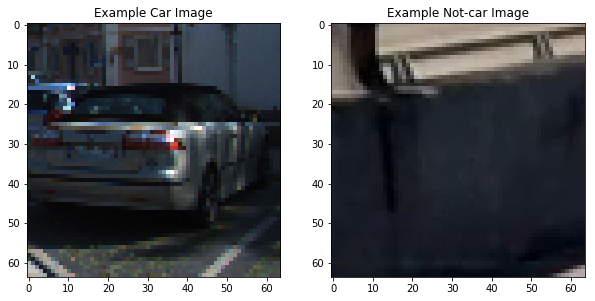

In [3]:
#Read in images
# images are divided up into vehicles and non-vehicles
cwd = os.getcwd()
print(cwd)
images = glob.glob('**/*.png',recursive = True)
cars = []
notcars = []

print(images[0])
print(len(images))
for image in images:
    if 'non-vehicles' in image:
        notcars.append(image)
    elif 'vehicles' in image:
        cars.append(image)
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    test = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = test.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = test.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
plt.show()


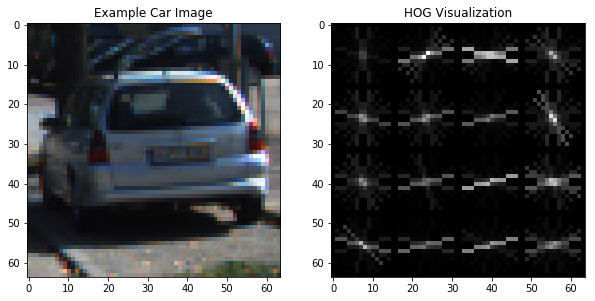

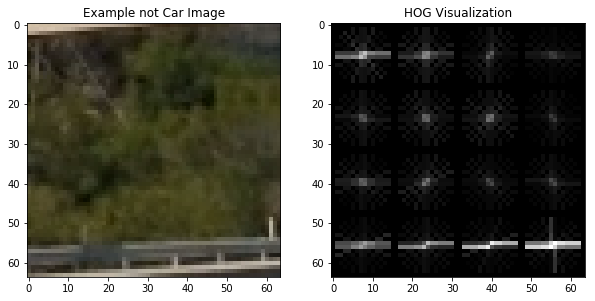

In [286]:
# Generate a random index to look at a car image
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
# Read in the image
car_image = mpimg.imread(cars[car_ind])
ColorTransCar = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)

notcar_image = mpimg.imread(notcars[notcar_ind])
ColorTransNotCar = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2YCrCb)

# Call our function with vis=True to see an image output
features, car_hog_image = get_hog_features(ColorTransCar, orient= 10, 
                        pix_per_cell= 16, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, notcar_hog_image = get_hog_features(ColorTransNotCar, orient= 12, 
                        pix_per_cell= 16, cell_per_block= 2, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(car_hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()

fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(notcar_image)
plt.title('Example not Car Image')
plt.subplot(122)
plt.imshow(notcar_hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()

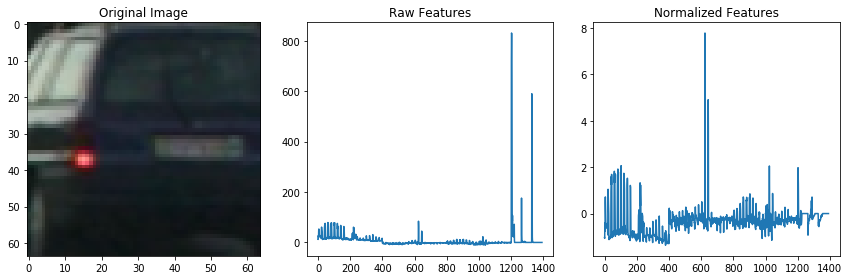

In [284]:
car_ind = np.random.randint(0, len(cars))

car_features = extract_features(cars, color_space=('LUV','LUV'), spatial_size=(20, 20),
                        hist_bins=64, spatial_feat = True, hist_feat=True, hog_feat=False)
notcar_features = extract_features(notcars, color_space=('LUV','LUV'), spatial_size=(20, 20),
                        hist_bins=64, spatial_feat = True, hist_feat=True, hog_feat=False)

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [75]:
# TODO play with these values to see how your classifier
# performs under different binning scenarios
spatial = 12 #8
histbin = 32 #72
colorspace = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

spatials = [8, 12, 16, 20, 24]
histbins = [32, 48, 64, 72]
colorspaces = ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']

print('{0:^s} {1:^s} {2:^s} {3:^s} {4:^s} {5:^s} {6:^5s} {7:^5s} |'.
      format("| Color",  "| Spatial", "| hist bin", "| feat size", "| train t", "| Test Acc", "| FP", "| FN "))

print('{0:7s} {0:9s} {0:10s} {0:11s} {0:9s} {0:10s} {0:5s} {0:5s} |'.
        format("| ---"))

for colorspace in colorspaces:
    for spatial in spatials:
        for histbin in histbins:           
            car_features = extract_features(cars, color_space=(colorspace,colorspace), spatial_size=(spatial, spatial),
                                    hist_bins=histbin, spatial_feat = True, hist_feat=True, hog_feat=False)
            notcar_features = extract_features(notcars, color_space=(colorspace,colorspace), spatial_size=(spatial, spatial),
                                    hist_bins=histbin, spatial_feat = True, hist_feat=True, hog_feat=False)

            # Create an array stack of feature vectors
            X = np.vstack((car_features, notcar_features)).astype(np.float64)

            # Define the labels vector
            y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

            # Split up data into randomized training and test sets
            rand_state = np.random.randint(0, 100)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=rand_state)

            # Fit a per-column scaler only on the training data
            X_scaler = StandardScaler().fit(X_train)
            # Apply the scaler to X_train and X_test
            X_train = X_scaler.transform(X_train)
            X_test = X_scaler.transform(X_test)

            featureSize = len(X_train[0])
            # Use a linear SVC 
            svc = LinearSVC()
            # Check the training time for the SVC
            t=time.time()
            svc.fit(X_train, y_train)
            t2 = time.time()
            TrainTime = round(t2-t, 2)
            # Check the score of the SVC
            y_pred = svc.predict(X_test)
            TestAccuracy = round(svc.score(X_test, y_test), 4)
            
            cm = confusion_matrix(y_test, y_pred)
            TP = cm[0][0]
            FP = cm[0][1]
            FN = cm[1][0]
            TN = cm[1][1]            

            print('| {0:^5s} | {1:^8d}| {2:^9d}| {3:^10d}| {4:^8.2f}| {5:^9.4f}| {6:^3.2f}| {7:^3.2f}|'.
                format(colorspace, spatial, histbin, featureSize, TrainTime, TestAccuracy,
                       round(FP/len(y_test)*100,2), round(FN/len(y_test)*100,2)))



| Color | Spatial | hist bin | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---     | ---      | ---       | ---     | ---      | --- | --- |
|  RGB  |    8    |    32    |    288    |   6.89  |  0.9065  | 3.12| 6.22|
|  RGB  |    8    |    48    |    336    |   7.00  |  0.9037  | 3.58| 6.05|
|  RGB  |    8    |    64    |    384    |   6.65  |  0.9015  | 3.66| 6.19|
|  RGB  |    8    |    72    |    408    |   6.97  |  0.9060  | 3.12| 6.28|
|  RGB  |    12   |    32    |    528    |  10.87  |  0.9096  | 4.00| 5.04|
|  RGB  |    12   |    48    |    576    |  10.98  |  0.9068  | 2.90| 6.42|
|  RGB  |    12   |    64    |    624    |  11.01  |  0.9147  | 3.46| 5.07|
|  RGB  |    12   |    72    |    648    |  10.77  |  0.9223  | 2.76| 5.01|
|  RGB  |    16   |    32    |    864    |  16.80  |  0.9257  | 2.65| 4.79|
|  RGB  |    16   |    48    |    912    |  16.08  |  0.9226  | 3.04| 4.70|
|  RGB  |    16   |    64    |    960    |  16.52  |  0.9254  | 2.39| 5.07|
|  RGB  |   

| YCrCb |    12   |    64    |    624    |  10.64  |  0.9276  | 2.42| 4.81|
| YCrCb |    12   |    72    |    648    |  11.01  |  0.9195  | 2.84| 5.21|
| YCrCb |    16   |    32    |    864    |  15.37  |  0.9265  | 2.65| 4.70|
| YCrCb |    16   |    48    |    912    |  15.48  |  0.9195  | 2.56| 5.49|
| YCrCb |    16   |    64    |    960    |  15.83  |  0.9203  | 2.79| 5.18|
| YCrCb |    16   |    72    |    984    |  15.92  |  0.9288  | 2.59| 4.53|
| YCrCb |    20   |    32    |    1296   |  18.72  |  0.9113  | 3.63| 5.24|
| YCrCb |    20   |    48    |    1344   |  19.31  |  0.9206  | 2.67| 5.26|
| YCrCb |    20   |    64    |    1392   |  18.70  |  0.9096  | 3.52| 5.52|
| YCrCb |    20   |    72    |    1416   |  18.66  |  0.9161  | 3.18| 5.21|
| YCrCb |    24   |    32    |    1824   |  19.32  |  0.8986  | 3.18| 6.95|
| YCrCb |    24   |    48    |    1872   |  20.40  |  0.9065  | 3.29| 6.05|
| YCrCb |    24   |    64    |    1920   |  19.93  |  0.9029  | 3.07| 6.64|
| YCrCb |   

| Color | Spatial | hist bin | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---     | ---      | ---       | ---     | ---      | --- | --- |
|  RGB  |    8    |    32    |    288    |   6.89  |  0.9065  | 3.12| 6.22|
|  RGB  |    8    |    48    |    336    |   7.00  |  0.9037  | 3.58| 6.05|
|  RGB  |    8    |    64    |    384    |   6.65  |  0.9015  | 3.66| 6.19|
|  RGB  |    8    |    72    |    408    |   6.97  |  0.9060  | 3.12| 6.28|
|  RGB  |    12   |    32    |    528    |  10.87  |  0.9096  | 4.00| 5.04|
|  RGB  |    12   |    48    |    576    |  10.98  |  0.9068  | 2.90| 6.42|
|  RGB  |    12   |    64    |    624    |  11.01  |  0.9147  | 3.46| 5.07|
|  RGB  |    12   |    72    |    648    |  10.77  |  0.9223  | 2.76| 5.01|
|  RGB  |    16   |    32    |    864    |  16.80  |  0.9257  | 2.65| 4.79|
|  RGB  |    16   |    48    |    912    |  16.08  |  0.9226  | 3.04| 4.70|
|  RGB  |    16   |    64    |    960    |  16.52  |  0.9254  | 2.39| 5.07|
|  RGB  |    16   |    72    |    984    |  16.35  |  0.9215  | 2.67| 5.18|
|  RGB  |    20   |    32    |    1296   |  21.53  |  0.9248  | 2.34| 5.18|
|  RGB  |    20   |    48    |    1344   |  21.68  |  0.9198  | 2.67| 5.35|
|  RGB  |    20   |    64    |    1392   |  21.41  |  0.9020  | 3.66| 6.14|
|  RGB  |    20   |    72    |    1416   |  21.46  |  0.9155  | 2.56| 5.88|
|  RGB  |    24   |    32    |    1824   |  27.25  |  0.9167  | 2.93| 5.41|
|  RGB  |    24   |    48    |    1872   |  27.77  |  0.9181  | 2.96| 5.24|
|  RGB  |    24   |    64    |    1920   |  26.87  |  0.9223  | 2.67| 5.10|
|  RGB  |    24   |    72    |    1944   |  27.12  |  0.9091  | 2.93| 6.17|
|  HSV  |    8    |    32    |    288    |   6.89  |  0.9054  | 5.35| 4.11|
|  HSV  |    8    |    48    |    336    |   6.11  |  0.9307  | 3.63| 3.29|
|  HSV  |    8    |    64    |    384    |   3.13  |  0.9544  | 2.87| 1.69|
|  HSV  |    8    |    72    |    408    |   3.58  |  0.9626  | 1.80| 1.94|
|  HSV  |    12   |    32    |    528    |  10.66  |  0.9226  | 4.17| 3.58|
|  HSV  |    12   |    48    |    576    |   9.15  |  0.9389  | 3.66| 2.45|
|  HSV  |    12   |    64    |    624    |   5.16  |  0.9609  | 1.75| 2.17|
|  HSV  |    12   |    72    |    648    |   4.82  |  0.9552  | 2.08| 2.39|
|  HSV  |    16   |    32    |    864    |  14.22  |  0.9271  | 3.86| 3.43|
|  HSV  |    16   |    48    |    912    |  11.18  |  0.9276  | 3.72| 3.52|
|  HSV  |    16   |    64    |    960    |   5.28  |  0.9451  | 2.90| 2.59|
|  HSV  |    16   |    72    |    984    |   5.37  |  0.9555  | 2.14| 2.31|
|  HSV  |    20   |    32    |    1296   |  16.33  |  0.9147  | 3.94| 4.59|
|  HSV  |    20   |    48    |    1344   |  11.68  |  0.9161  | 3.41| 4.98|
|  HSV  |    20   |    64    |    1392   |   6.58  |  0.9400  | 2.59| 3.41|
|  HSV  |    20   |    72    |    1416   |   6.43  |  0.9341  | 2.73| 3.86|
|  HSV  |    24   |    32    |    1824   |  15.28  |  0.8998  | 4.25| 5.77|
|  HSV  |    24   |    48    |    1872   |  12.16  |  0.9110  | 3.35| 5.55|
|  HSV  |    24   |    64    |    1920   |   8.82  |  0.9341  | 2.25| 4.34|
|  HSV  |    24   |    72    |    1944   |   8.87  |  0.9296  | 2.67| 4.36|
|  LUV  |    8    |    32    |    288    |   4.51  |  0.9547  | 2.14| 2.39|
|  LUV  |    8    |    48    |    336    |   4.61  |  0.9552  | 2.00| 2.48|
|  LUV  |    8    |    64    |    384    |   4.71  |  0.9642  | 1.41| 2.17|
|  LUV  |    8    |    72    |    408    |   4.70  |  0.9583  | 1.97| 2.20|
|  LUV  |    12   |    32    |    528    |   6.95  |  0.9645  | 1.24| 2.31|
|  LUV  |    12   |    48    |    576    |   6.64  |  0.9623  | 1.58| 2.20|
|  LUV  |    12   |    64    |    624    |   6.35  |  0.9566  | 1.60| 2.73|
|  LUV  |    12   |    72    |    648    |   6.50  |  0.9600  | 1.32| 2.67|
|  LUV  |    16   |    32    |    864    |   8.20  |  0.9462  | 2.08| 3.29|
|  LUV  |    16   |    48    |    912    |   7.93  |  0.9521  | 1.91| 2.87|
|  LUV  |    16   |    64    |    960    |   7.59  |  0.9569  | 1.66| 2.65|
|  LUV  |    16   |    72    |    984    |   6.90  |  0.9628  | 1.21| 2.51|
|  LUV  |    20   |    32    |    1296   |   8.31  |  0.9403  | 2.45| 3.52|
|  LUV  |    20   |    48    |    1344   |   8.21  |  0.9400  | 1.91| 4.08|
|  LUV  |    20   |    64    |    1392   |   7.38  |  0.9437  | 1.83| 3.80|
|  LUV  |    20   |    72    |    1416   |   7.16  |  0.9420  | 1.77| 4.03|
|  LUV  |    24   |    32    |    1824   |  11.33  |  0.9358  | 1.58| 4.84|
|  LUV  |    24   |    48    |    1872   |  10.43  |  0.9451  | 1.69| 3.80|
|  LUV  |    24   |    64    |    1920   |  10.05  |  0.9375  | 1.63| 4.62|
|  LUV  |    24   |    72    |    1944   |   9.64  |  0.9451  | 1.44| 4.05|
|  HLS  |    8    |    32    |    288    |   6.82  |  0.9133  | 4.53| 4.14|
|  HLS  |    8    |    48    |    336    |   6.07  |  0.9305  | 4.14| 2.82|
|  HLS  |    8    |    64    |    384    |   4.94  |  0.9524  | 2.62| 2.14|
|  HLS  |    8    |    72    |    408    |   3.82  |  0.9586  | 2.08| 2.06|
|  HLS  |    12   |    32    |    528    |  10.90  |  0.9184  | 3.94| 4.22|
|  HLS  |    12   |    48    |    576    |   9.15  |  0.9383  | 3.10| 3.07|
|  HLS  |    12   |    64    |    624    |   6.83  |  0.9507  | 2.39| 2.53|
|  HLS  |    12   |    72    |    648    |   5.44  |  0.9555  | 2.14| 2.31|
|  HLS  |    16   |    32    |    864    |  14.52  |  0.9169  | 3.63| 4.67|
|  HLS  |    16   |    48    |    912    |  11.35  |  0.9305  | 3.10| 3.86|
|  HLS  |    16   |    64    |    960    |   8.85  |  0.9544  | 1.97| 2.59|
|  HLS  |    16   |    72    |    984    |   5.93  |  0.9476  | 2.79| 2.45|
|  HLS  |    20   |    32    |    1296   |  15.82  |  0.9144  | 3.86| 4.70|
|  HLS  |    20   |    48    |    1344   |  12.69  |  0.9234  | 3.24| 4.42|
|  HLS  |    20   |    64    |    1392   |   7.65  |  0.9265  | 3.12| 4.22|
|  HLS  |    20   |    72    |    1416   |   6.62  |  0.9355  | 2.87| 3.58|
|  HLS  |    24   |    32    |    1824   |  14.89  |  0.9034  | 3.52| 6.14|
|  HLS  |    24   |    48    |    1872   |  12.47  |  0.9077  | 3.83| 5.41|
|  HLS  |    24   |    64    |    1920   |  10.23  |  0.9330  | 2.84| 3.86|
|  HLS  |    24   |    72    |    1944   |   8.96  |  0.9324  | 2.79| 3.97|
|  YUV  |    8    |    32    |    288    |   6.51  |  0.8944  | 4.08| 6.48|
|  YUV  |    8    |    48    |    336    |   6.86  |  0.8944  | 3.83| 6.73|
|  YUV  |    8    |    64    |    384    |   7.01  |  0.8936  | 4.34| 6.31|
|  YUV  |    8    |    72    |    408    |   6.93  |  0.8944  | 4.65| 5.91|
|  YUV  |    12   |    32    |    528    |  10.70  |  0.9223  | 2.51| 5.26|
|  YUV  |    12   |    48    |    576    |  10.69  |  0.9150  | 2.53| 5.97|
|  YUV  |    12   |    64    |    624    |  10.59  |  0.9240  | 2.98| 4.62|
|  YUV  |    12   |    72    |    648    |  10.68  |  0.9153  | 2.87| 5.60|
|  YUV  |    16   |    32    |    864    |  15.28  |  0.9282  | 2.79| 4.39|
|  YUV  |    16   |    48    |    912    |  15.89  |  0.9240  | 3.27| 4.34|
|  YUV  |    16   |    64    |    960    |  15.30  |  0.9234  | 3.18| 4.48|
|  YUV  |    16   |    72    |    984    |  15.32  |  0.9248  | 2.93| 4.59|
|  YUV  |    20   |    32    |    1296   |  19.10  |  0.9240  | 2.73| 4.87|
|  YUV  |    20   |    48    |    1344   |  19.55  |  0.9124  | 2.76| 6.00|
|  YUV  |    20   |    64    |    1392   |  18.27  |  0.9203  | 2.00| 5.97|
|  YUV  |    20   |    72    |    1416   |  19.17  |  0.9186  | 3.10| 5.04|
|  YUV  |    24   |    32    |    1824   |  19.32  |  0.9043  | 3.07| 6.50|
|  YUV  |    24   |    48    |    1872   |  19.78  |  0.9093  | 2.45| 6.62|
|  YUV  |    24   |    64    |    1920   |  19.72  |  0.8958  | 3.55| 6.87|
|  YUV  |    24   |    72    |    1944   |  20.36  |  0.9017  | 3.43| 6.39|
| YCrCb |    8    |    32    |    288    |   6.78  |  0.8989  | 3.72| 6.39|
| YCrCb |    8    |    48    |    336    |   6.67  |  0.8986  | 3.97| 6.17|
| YCrCb |    8    |    64    |    384    |   6.77  |  0.8978  | 3.74| 6.48|
| YCrCb |    8    |    72    |    408    |   6.96  |  0.8970  | 3.91| 6.39|
| YCrCb |    12   |    32    |    528    |  10.68  |  0.9189  | 2.56| 5.55|
| YCrCb |    12   |    48    |    576    |  10.87  |  0.9178  | 2.90| 5.32|
| YCrCb |    12   |    64    |    624    |  10.64  |  0.9276  | 2.42| 4.81|
| YCrCb |    12   |    72    |    648    |  11.01  |  0.9195  | 2.84| 5.21|
| YCrCb |    16   |    32    |    864    |  15.37  |  0.9265  | 2.65| 4.70|
| YCrCb |    16   |    48    |    912    |  15.48  |  0.9195  | 2.56| 5.49|
| YCrCb |    16   |    64    |    960    |  15.83  |  0.9203  | 2.79| 5.18|
| YCrCb |    16   |    72    |    984    |  15.92  |  0.9288  | 2.59| 4.53|
| YCrCb |    20   |    32    |    1296   |  18.72  |  0.9113  | 3.63| 5.24|
| YCrCb |    20   |    48    |    1344   |  19.31  |  0.9206  | 2.67| 5.26|
| YCrCb |    20   |    64    |    1392   |  18.70  |  0.9096  | 3.52| 5.52|
| YCrCb |    20   |    72    |    1416   |  18.66  |  0.9161  | 3.18| 5.21|
| YCrCb |    24   |    32    |    1824   |  19.32  |  0.8986  | 3.18| 6.95|
| YCrCb |    24   |    48    |    1872   |  20.40  |  0.9065  | 3.29| 6.05|
| YCrCb |    24   |    64    |    1920   |  19.93  |  0.9029  | 3.07| 6.64|
| YCrCb |    24   |    72    |    1944   |  20.13  |  0.9009  | 2.79| 7.12|


In [76]:
# TODO play with these values to see how your classifier
# performs under different HOG settings
color_space = ('LUV','YUV') # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 10  # HOG orientations
pix_per_cell = 11 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

print('{0:^s} {1:^s} {2:^s} {3:^s} {4:^s} {5:^s} {6:^5s} {7:^5s} |'.
      format("| CHog ", "| orients", "| pix cell", "| feat size", "| train t",
             "| Test Acc", "| FP", "| FN "))

print('{0:7s} {0:9s} {0:10s} {0:11s} {0:9s} {0:10s} {0:5s} {0:5s} |'.
        format("| ---"))

for color in colorspaces:
    for orient in range(8,15):
        for pix_per_cell in range(8,17):
            color_space = (color,color)
            car_features = extract_features(cars, color_space=(colorspace,colorspace), spatial_size=(spatial, spatial),
                                    hist_bins=histbin, spatial_feat = False, hist_feat=False, hog_feat=True)
            notcar_features = extract_features(notcars, color_space=(colorspace,colorspace), spatial_size=(spatial, spatial),
                                    hist_bins=histbin, spatial_feat = False, hist_feat=False, hog_feat=True)

            # Create an array stack of feature vectors
            X = np.vstack((car_features, notcar_features)).astype(np.float64)

            # Define the labels vector
            y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

            # Split up data into randomized training and test sets
            rand_state = np.random.randint(0, 100)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=rand_state)

            # Fit a per-column scaler only on the training data
            X_scaler = StandardScaler().fit(X_train)
            # Apply the scaler to X_train and X_test
            X_train = X_scaler.transform(X_train)
            X_test = X_scaler.transform(X_test)

            featureSize = len(X_train[0])
            # Use a linear SVC 
            svc = LinearSVC()
            # Check the training time for the SVC
            t=time.time()
            svc.fit(X_train, y_train)
            t2 = time.time()
            TrainTime = round(t2-t, 2)
            # Check the score of the SVC
            y_pred = svc.predict(X_test)
            TestAccuracy = round(svc.score(X_test, y_test), 4)
            
            cm = confusion_matrix(y_test, y_pred)
            TP = cm[0][0]
            FP = cm[0][1]
            FN = cm[1][0]
            TN = cm[1][1]       
            
            print('| {0:^6s}| {1:^8d}| {2:^9d}| {3:^10d}| {4:^8.2f}| {5:^9.4f}| {6:^3.2f}| {7:^3.2f}|'.
                format(color, orient, pix_per_cell, featureSize, TrainTime, TestAccuracy,
                       round(FP/len(y_test)*100,2), round(FN/len(y_test)*100,2)))


| CHog  | orients | pix cell | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---     | ---      | ---       | ---     | ---      | --- | --- |
|  RGB  |    8    |     8    |    1764   |   6.87  |  0.9505  | 2.11| 2.84|
|  RGB  |    8    |     9    |    1764   |   7.34  |  0.9465  | 2.79| 2.56|
|  RGB  |    8    |    10    |    1764   |   7.43  |  0.9471  | 3.04| 2.25|
|  RGB  |    8    |    11    |    1764   |   7.05  |  0.9437  | 3.12| 2.51|
|  RGB  |    8    |    12    |    1764   |   6.89  |  0.9502  | 2.51| 2.48|
|  RGB  |    8    |    13    |    1764   |   7.14  |  0.9474  | 2.17| 3.10|
|  RGB  |    8    |    14    |    1764   |   7.05  |  0.9431  | 2.70| 2.98|
|  RGB  |    8    |    15    |    1764   |   7.17  |  0.9448  | 3.21| 2.31|
|  RGB  |    8    |    16    |    1764   |   7.11  |  0.9507  | 2.48| 2.45|
|  RGB  |    9    |     8    |    1764   |   7.43  |  0.9451  | 2.73| 2.76|
|  RGB  |    9    |     9    |    1764   |   7.33  |  0.9499  | 2.11| 2.90|
|  RGB  |   

|  HSV  |    12   |    15    |    1764   |   7.37  |  0.9457  | 2.48| 2.96|
|  HSV  |    12   |    16    |    1764   |   7.14  |  0.9462  | 2.51| 2.87|
|  HSV  |    13   |     8    |    1764   |   7.10  |  0.9426  | 3.24| 2.51|
|  HSV  |    13   |     9    |    1764   |   7.00  |  0.9485  | 2.39| 2.76|
|  HSV  |    13   |    10    |    1764   |   7.03  |  0.9426  | 2.76| 2.98|
|  HSV  |    13   |    11    |    1764   |   7.18  |  0.9445  | 2.84| 2.70|
|  HSV  |    13   |    12    |    1764   |   7.41  |  0.9476  | 2.93| 2.31|
|  HSV  |    13   |    13    |    1764   |   7.64  |  0.9468  | 2.59| 2.73|
|  HSV  |    13   |    14    |    1764   |   7.38  |  0.9459  | 2.73| 2.67|
|  HSV  |    13   |    15    |    1764   |   7.03  |  0.9426  | 2.76| 2.98|
|  HSV  |    13   |    16    |    1764   |   7.38  |  0.9474  | 2.45| 2.82|
|  HSV  |    14   |     8    |    1764   |   7.26  |  0.9505  | 2.51| 2.45|
|  HSV  |    14   |     9    |    1764   |   7.18  |  0.9471  | 2.62| 2.67|
|  HSV  |   

|  HLS  |    10   |    15    |    1764   |   7.20  |  0.9457  | 2.28| 3.15|
|  HLS  |    10   |    16    |    1764   |   7.31  |  0.9462  | 2.73| 2.65|
|  HLS  |    11   |     8    |    1764   |   7.50  |  0.9490  | 2.59| 2.51|
|  HLS  |    11   |     9    |    1764   |   7.26  |  0.9431  | 2.73| 2.96|
|  HLS  |    11   |    10    |    1764   |   7.11  |  0.9474  | 2.22| 3.04|
|  HLS  |    11   |    11    |    1764   |   7.52  |  0.9496  | 2.36| 2.67|
|  HLS  |    11   |    12    |    1764   |   7.13  |  0.9474  | 2.22| 3.04|
|  HLS  |    11   |    13    |    1764   |   7.05  |  0.9482  | 2.62| 2.56|
|  HLS  |    11   |    14    |    1764   |   7.29  |  0.9459  | 2.45| 2.96|
|  HLS  |    11   |    15    |    1764   |   7.27  |  0.9454  | 2.51| 2.96|
|  HLS  |    11   |    16    |    1764   |   6.88  |  0.9471  | 1.97| 3.32|
|  HLS  |    12   |     8    |    1764   |   7.42  |  0.9448  | 2.67| 2.84|
|  HLS  |    12   |     9    |    1764   |   7.07  |  0.9474  | 2.65| 2.62|
|  HLS  |   

| YCrCb |    8    |    15    |    1764   |   7.34  |  0.9496  | 2.79| 2.25|
| YCrCb |    8    |    16    |    1764   |   7.09  |  0.9462  | 2.42| 2.96|
| YCrCb |    9    |     8    |    1764   |   6.85  |  0.9437  | 2.59| 3.04|
| YCrCb |    9    |     9    |    1764   |   7.60  |  0.9496  | 2.34| 2.70|
| YCrCb |    9    |    10    |    1764   |   7.11  |  0.9459  | 2.62| 2.79|
| YCrCb |    9    |    11    |    1764   |   7.34  |  0.9505  | 2.14| 2.82|
| YCrCb |    9    |    12    |    1764   |   7.48  |  0.9445  | 2.82| 2.73|
| YCrCb |    9    |    13    |    1764   |   7.36  |  0.9471  | 2.36| 2.93|
| YCrCb |    9    |    14    |    1764   |   7.22  |  0.9471  | 2.67| 2.62|
| YCrCb |    9    |    15    |    1764   |   7.48  |  0.9535  | 2.00| 2.65|
| YCrCb |    9    |    16    |    1764   |   7.28  |  0.9488  | 2.31| 2.82|
| YCrCb |    10   |     8    |    1764   |   7.57  |  0.9479  | 2.76| 2.45|
| YCrCb |    10   |     9    |    1764   |   6.98  |  0.9437  | 2.65| 2.98|
| YCrCb |   

| CHog  | orients | pix cell | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---     | ---      | ---       | ---     | ---      | --- | --- |
|  RGB  |    8    |     8    |    1764   |   6.87  |  0.9505  | 2.11| 2.84|
|  RGB  |    8    |     9    |    1764   |   7.34  |  0.9465  | 2.79| 2.56|
|  RGB  |    8    |    10    |    1764   |   7.43  |  0.9471  | 3.04| 2.25|
|  RGB  |    8    |    11    |    1764   |   7.05  |  0.9437  | 3.12| 2.51|
|  RGB  |    8    |    12    |    1764   |   6.89  |  0.9502  | 2.51| 2.48|
|  RGB  |    8    |    13    |    1764   |   7.14  |  0.9474  | 2.17| 3.10|
|  RGB  |    8    |    14    |    1764   |   7.05  |  0.9431  | 2.70| 2.98|
|  RGB  |    8    |    15    |    1764   |   7.17  |  0.9448  | 3.21| 2.31|
|  RGB  |    8    |    16    |    1764   |   7.11  |  0.9507  | 2.48| 2.45|
|  RGB  |    9    |     8    |    1764   |   7.43  |  0.9451  | 2.73| 2.76|
|  RGB  |    9    |     9    |    1764   |   7.33  |  0.9499  | 2.11| 2.90|
|  RGB  |    9    |    10    |    1764   |   7.35  |  0.9465  | 2.96| 2.39|
|  RGB  |    9    |    11    |    1764   |   7.49  |  0.9451  | 2.79| 2.70|
|  RGB  |    9    |    12    |    1764   |   7.05  |  0.9431  | 2.70| 2.98|
|  RGB  |    9    |    13    |    1764   |   7.03  |  0.9479  | 2.51| 2.70|
|  RGB  |    9    |    14    |    1764   |   7.38  |  0.9471  | 2.82| 2.48|
|  RGB  |    9    |    15    |    1764   |   7.53  |  0.9485  | 2.84| 2.31|
|  RGB  |    9    |    16    |    1764   |   7.14  |  0.9423  | 2.67| 3.10|
|  RGB  |    10   |     8    |    1764   |   7.54  |  0.9485  | 2.70| 2.45|
|  RGB  |    10   |     9    |    1764   |   7.29  |  0.9493  | 2.31| 2.76|
|  RGB  |    10   |    10    |    1764   |   7.48  |  0.9516  | 2.53| 2.31|
|  RGB  |    10   |    11    |    1764   |   7.25  |  0.9510  | 2.36| 2.53|
|  RGB  |    10   |    12    |    1764   |   7.54  |  0.9535  | 2.39| 2.25|
|  RGB  |    10   |    13    |    1764   |   7.15  |  0.9516  | 2.48| 2.36|
|  RGB  |    10   |    14    |    1764   |   7.11  |  0.9513  | 2.73| 2.14|
|  RGB  |    10   |    15    |    1764   |   7.24  |  0.9471  | 2.67| 2.62|
|  RGB  |    10   |    16    |    1764   |   7.44  |  0.9505  | 2.79| 2.17|
|  RGB  |    11   |     8    |    1764   |   7.42  |  0.9476  | 2.34| 2.90|
|  RGB  |    11   |     9    |    1764   |   7.22  |  0.9493  | 2.28| 2.79|
|  RGB  |    11   |    10    |    1764   |   7.21  |  0.9490  | 2.59| 2.51|
|  RGB  |    11   |    11    |    1764   |   7.39  |  0.9488  | 2.34| 2.79|
|  RGB  |    11   |    12    |    1764   |   7.61  |  0.9465  | 2.65| 2.70|
|  RGB  |    11   |    13    |    1764   |   7.23  |  0.9474  | 2.73| 2.53|
|  RGB  |    11   |    14    |    1764   |   7.52  |  0.9502  | 2.59| 2.39|
|  RGB  |    11   |    15    |    1764   |   7.31  |  0.9544  | 2.39| 2.17|
|  RGB  |    11   |    16    |    1764   |   7.02  |  0.9482  | 2.51| 2.67|
|  RGB  |    12   |     8    |    1764   |   7.02  |  0.9454  | 2.87| 2.59|
|  RGB  |    12   |     9    |    1764   |   7.05  |  0.9443  | 2.96| 2.62|
|  RGB  |    12   |    10    |    1764   |   7.40  |  0.9440  | 2.79| 2.82|
|  RGB  |    12   |    11    |    1764   |   7.59  |  0.9502  | 2.22| 2.76|
|  RGB  |    12   |    12    |    1764   |   7.29  |  0.9459  | 2.36| 3.04|
|  RGB  |    12   |    13    |    1764   |   7.45  |  0.9521  | 2.11| 2.67|
|  RGB  |    12   |    14    |    1764   |   7.33  |  0.9474  | 2.48| 2.79|
|  RGB  |    12   |    15    |    1764   |   7.40  |  0.9510  | 2.73| 2.17|
|  RGB  |    12   |    16    |    1764   |   7.37  |  0.9448  | 2.73| 2.79|
|  RGB  |    13   |     8    |    1764   |   6.88  |  0.9502  | 2.53| 2.45|
|  RGB  |    13   |     9    |    1764   |   7.24  |  0.9462  | 2.62| 2.76|
|  RGB  |    13   |    10    |    1764   |   6.96  |  0.9505  | 2.51| 2.45|
|  RGB  |    13   |    11    |    1764   |   6.82  |  0.9502  | 2.11| 2.87|
|  RGB  |    13   |    12    |    1764   |   7.47  |  0.9443  | 3.07| 2.51|
|  RGB  |    13   |    13    |    1764   |   7.53  |  0.9505  | 2.59| 2.36|
|  RGB  |    13   |    14    |    1764   |   7.16  |  0.9474  | 2.62| 2.65|
|  RGB  |    13   |    15    |    1764   |   7.26  |  0.9490  | 2.22| 2.87|
|  RGB  |    13   |    16    |    1764   |   7.46  |  0.9496  | 2.42| 2.62|
|  RGB  |    14   |     8    |    1764   |   7.28  |  0.9479  | 2.56| 2.65|
|  RGB  |    14   |     9    |    1764   |   7.45  |  0.9451  | 2.76| 2.73|
|  RGB  |    14   |    10    |    1764   |   7.38  |  0.9493  | 2.31| 2.76|
|  RGB  |    14   |    11    |    1764   |   7.11  |  0.9454  | 2.79| 2.67|
|  RGB  |    14   |    12    |    1764   |   7.11  |  0.9513  | 2.73| 2.14|
|  RGB  |    14   |    13    |    1764   |   7.31  |  0.9502  | 2.14| 2.84|
|  RGB  |    14   |    14    |    1764   |   7.11  |  0.9445  | 2.73| 2.82|
|  RGB  |    14   |    15    |    1764   |   7.05  |  0.9476  | 2.73| 2.51|
|  RGB  |    14   |    16    |    1764   |   7.36  |  0.9451  | 2.76| 2.73|
|  HSV  |    8    |     8    |    1764   |   7.41  |  0.9454  | 2.79| 2.67|
|  HSV  |    8    |     9    |    1764   |   7.35  |  0.9544  | 2.36| 2.20|
|  HSV  |    8    |    10    |    1764   |   7.23  |  0.9482  | 2.28| 2.90|
|  HSV  |    8    |    11    |    1764   |   6.93  |  0.9482  | 2.28| 2.90|
|  HSV  |    8    |    12    |    1764   |   7.53  |  0.9541  | 1.91| 2.67|
|  HSV  |    8    |    13    |    1764   |   6.96  |  0.9471  | 2.42| 2.87|
|  HSV  |    8    |    14    |    1764   |   7.20  |  0.9468  | 2.17| 3.15|
|  HSV  |    8    |    15    |    1764   |   6.91  |  0.9505  | 2.11| 2.84|
|  HSV  |    8    |    16    |    1764   |   7.39  |  0.9564  | 2.17| 2.20|
|  HSV  |    9    |     8    |    1764   |   7.38  |  0.9493  | 2.28| 2.79|
|  HSV  |    9    |     9    |    1764   |   7.33  |  0.9538  | 2.11| 2.51|
|  HSV  |    9    |    10    |    1764   |   7.13  |  0.9462  | 2.51| 2.87|
|  HSV  |    9    |    11    |    1764   |   7.02  |  0.9451  | 2.87| 2.62|
|  HSV  |    9    |    12    |    1764   |   7.44  |  0.9558  | 2.51| 1.91|
|  HSV  |    9    |    13    |    1764   |   7.25  |  0.9519  | 2.45| 2.36|
|  HSV  |    9    |    14    |    1764   |   7.04  |  0.9445  | 2.34| 3.21|
|  HSV  |    9    |    15    |    1764   |   7.07  |  0.9479  | 2.62| 2.59|
|  HSV  |    9    |    16    |    1764   |   7.20  |  0.9474  | 2.65| 2.62|
|  HSV  |    10   |     8    |    1764   |   7.28  |  0.9496  | 2.14| 2.90|
|  HSV  |    10   |     9    |    1764   |   7.09  |  0.9465  | 2.70| 2.65|
|  HSV  |    10   |    10    |    1764   |   7.08  |  0.9454  | 2.87| 2.59|
|  HSV  |    10   |    11    |    1764   |   7.17  |  0.9459  | 2.45| 2.96|
|  HSV  |    10   |    12    |    1764   |   7.31  |  0.9513  | 2.51| 2.36|
|  HSV  |    10   |    13    |    1764   |   7.19  |  0.9482  | 2.82| 2.36|
|  HSV  |    10   |    14    |    1764   |   7.24  |  0.9459  | 2.39| 3.01|
|  HSV  |    10   |    15    |    1764   |   7.31  |  0.9490  | 2.65| 2.45|
|  HSV  |    10   |    16    |    1764   |   7.24  |  0.9454  | 2.34| 3.12|
|  HSV  |    11   |     8    |    1764   |   7.48  |  0.9474  | 2.45| 2.82|
|  HSV  |    11   |     9    |    1764   |   7.62  |  0.9485  | 2.39| 2.76|
|  HSV  |    11   |    10    |    1764   |   7.09  |  0.9409  | 2.84| 3.07|
|  HSV  |    11   |    11    |    1764   |   6.87  |  0.9471  | 2.28| 3.01|
|  HSV  |    11   |    12    |    1764   |   7.46  |  0.9505  | 2.28| 2.67|
|  HSV  |    11   |    13    |    1764   |   7.43  |  0.9457  | 2.45| 2.98|
|  HSV  |    11   |    14    |    1764   |   7.22  |  0.9507  | 2.39| 2.53|
|  HSV  |    11   |    15    |    1764   |   7.28  |  0.9510  | 2.42| 2.48|
|  HSV  |    11   |    16    |    1764   |   6.96  |  0.9474  | 2.28| 2.98|
|  HSV  |    12   |     8    |    1764   |   7.48  |  0.9505  | 2.79| 2.17|
|  HSV  |    12   |     9    |    1764   |   7.17  |  0.9519  | 2.14| 2.67|
|  HSV  |    12   |    10    |    1764   |   7.25  |  0.9521  | 2.42| 2.36|
|  HSV  |    12   |    11    |    1764   |   6.91  |  0.9451  | 2.51| 2.98|
|  HSV  |    12   |    12    |    1764   |   7.36  |  0.9544  | 2.51| 2.06|
|  HSV  |    12   |    13    |    1764   |   7.38  |  0.9443  | 2.76| 2.82|
|  HSV  |    12   |    14    |    1764   |   7.42  |  0.9479  | 2.76| 2.45|
|  HSV  |    12   |    15    |    1764   |   7.37  |  0.9457  | 2.48| 2.96|
|  HSV  |    12   |    16    |    1764   |   7.14  |  0.9462  | 2.51| 2.87|
|  HSV  |    13   |     8    |    1764   |   7.10  |  0.9426  | 3.24| 2.51|
|  HSV  |    13   |     9    |    1764   |   7.00  |  0.9485  | 2.39| 2.76|
|  HSV  |    13   |    10    |    1764   |   7.03  |  0.9426  | 2.76| 2.98|
|  HSV  |    13   |    11    |    1764   |   7.18  |  0.9445  | 2.84| 2.70|
|  HSV  |    13   |    12    |    1764   |   7.41  |  0.9476  | 2.93| 2.31|
|  HSV  |    13   |    13    |    1764   |   7.64  |  0.9468  | 2.59| 2.73|
|  HSV  |    13   |    14    |    1764   |   7.38  |  0.9459  | 2.73| 2.67|
|  HSV  |    13   |    15    |    1764   |   7.03  |  0.9426  | 2.76| 2.98|
|  HSV  |    13   |    16    |    1764   |   7.38  |  0.9474  | 2.45| 2.82|
|  HSV  |    14   |     8    |    1764   |   7.26  |  0.9505  | 2.51| 2.45|
|  HSV  |    14   |     9    |    1764   |   7.18  |  0.9471  | 2.62| 2.67|
|  HSV  |    14   |    10    |    1764   |   7.38  |  0.9544  | 2.42| 2.14|
|  HSV  |    14   |    11    |    1764   |   7.09  |  0.9488  | 2.45| 2.67|
|  HSV  |    14   |    12    |    1764   |   7.40  |  0.9541  | 2.39| 2.20|
|  HSV  |    14   |    13    |    1764   |   7.09  |  0.9488  | 2.59| 2.53|
|  HSV  |    14   |    14    |    1764   |   7.19  |  0.9493  | 2.62| 2.45|
|  HSV  |    14   |    15    |    1764   |   7.54  |  0.9524  | 2.48| 2.28|
|  HSV  |    14   |    16    |    1764   |   7.20  |  0.9516  | 2.70| 2.14|
|  LUV  |    8    |     8    |    1764   |   7.44  |  0.9454  | 2.79| 2.67|
|  LUV  |    8    |     9    |    1764   |   6.85  |  0.9471  | 2.00| 3.29|
|  LUV  |    8    |    10    |    1764   |   7.16  |  0.9476  | 2.65| 2.59|
|  LUV  |    8    |    11    |    1764   |   7.42  |  0.9485  | 2.36| 2.79|
|  LUV  |    8    |    12    |    1764   |   7.35  |  0.9457  | 2.48| 2.96|
|  LUV  |    8    |    13    |    1764   |   7.29  |  0.9510  | 2.56| 2.34|
|  LUV  |    8    |    14    |    1764   |   7.18  |  0.9465  | 2.65| 2.70|
|  LUV  |    8    |    15    |    1764   |   7.59  |  0.9496  | 2.67| 2.36|
|  LUV  |    8    |    16    |    1764   |   7.60  |  0.9471  | 2.59| 2.70|
|  LUV  |    9    |     8    |    1764   |   7.16  |  0.9440  | 2.82| 2.79|
|  LUV  |    9    |     9    |    1764   |   7.26  |  0.9476  | 2.67| 2.56|
|  LUV  |    9    |    10    |    1764   |   7.20  |  0.9465  | 2.73| 2.62|
|  LUV  |    9    |    11    |    1764   |   7.12  |  0.9459  | 2.65| 2.76|
|  LUV  |    9    |    12    |    1764   |   7.25  |  0.9476  | 2.45| 2.79|
|  LUV  |    9    |    13    |    1764   |   7.20  |  0.9448  | 2.51| 3.01|
|  LUV  |    9    |    14    |    1764   |   7.20  |  0.9490  | 2.48| 2.62|
|  LUV  |    9    |    15    |    1764   |   7.52  |  0.9490  | 2.28| 2.82|
|  LUV  |    9    |    16    |    1764   |   7.17  |  0.9493  | 2.76| 2.31|
|  LUV  |    10   |     8    |    1764   |   7.19  |  0.9468  | 2.73| 2.59|
|  LUV  |    10   |     9    |    1764   |   7.45  |  0.9488  | 2.62| 2.51|
|  LUV  |    10   |    10    |    1764   |   7.09  |  0.9505  | 2.76| 2.20|
|  LUV  |    10   |    11    |    1764   |   7.62  |  0.9516  | 2.53| 2.31|
|  LUV  |    10   |    12    |    1764   |   7.10  |  0.9454  | 2.70| 2.76|
|  LUV  |    10   |    13    |    1764   |   7.51  |  0.9462  | 2.70| 2.67|
|  LUV  |    10   |    14    |    1764   |   7.20  |  0.9451  | 2.79| 2.70|
|  LUV  |    10   |    15    |    1764   |   7.03  |  0.9440  | 3.07| 2.53|
|  LUV  |    10   |    16    |    1764   |   7.05  |  0.9493  | 2.56| 2.51|
|  LUV  |    11   |     8    |    1764   |   6.91  |  0.9474  | 2.48| 2.79|
|  LUV  |    11   |     9    |    1764   |   7.39  |  0.9448  | 2.82| 2.70|
|  LUV  |    11   |    10    |    1764   |   7.34  |  0.9471  | 2.82| 2.48|
|  LUV  |    11   |    11    |    1764   |   7.42  |  0.9482  | 2.36| 2.82|
|  LUV  |    11   |    12    |    1764   |   7.26  |  0.9479  | 2.45| 2.76|
|  LUV  |    11   |    13    |    1764   |   7.13  |  0.9434  | 2.31| 3.35|
|  LUV  |    11   |    14    |    1764   |   7.07  |  0.9428  | 3.12| 2.59|
|  LUV  |    11   |    15    |    1764   |   7.37  |  0.9507  | 2.53| 2.39|
|  LUV  |    11   |    16    |    1764   |   7.48  |  0.9507  | 2.53| 2.39|
|  LUV  |    12   |     8    |    1764   |   7.47  |  0.9507  | 2.62| 2.31|
|  LUV  |    12   |     9    |    1764   |   7.38  |  0.9507  | 2.28| 2.65|
|  LUV  |    12   |    10    |    1764   |   7.33  |  0.9443  | 2.84| 2.73|
|  LUV  |    12   |    11    |    1764   |   7.34  |  0.9448  | 2.67| 2.84|
|  LUV  |    12   |    12    |    1764   |   7.39  |  0.9440  | 3.07| 2.53|
|  LUV  |    12   |    13    |    1764   |   7.60  |  0.9485  | 2.48| 2.67|
|  LUV  |    12   |    14    |    1764   |   7.56  |  0.9493  | 2.28| 2.79|
|  LUV  |    12   |    15    |    1764   |   7.30  |  0.9448  | 2.79| 2.73|
|  LUV  |    12   |    16    |    1764   |   7.54  |  0.9502  | 2.65| 2.34|
|  LUV  |    13   |     8    |    1764   |   7.34  |  0.9541  | 2.51| 2.08|
|  LUV  |    13   |     9    |    1764   |   6.92  |  0.9482  | 2.48| 2.70|
|  LUV  |    13   |    10    |    1764   |   7.12  |  0.9476  | 2.17| 3.07|
|  LUV  |    13   |    11    |    1764   |   7.21  |  0.9516  | 2.36| 2.48|
|  LUV  |    13   |    12    |    1764   |   7.00  |  0.9468  | 2.67| 2.65|
|  LUV  |    13   |    13    |    1764   |   7.11  |  0.9468  | 2.34| 2.98|
|  LUV  |    13   |    14    |    1764   |   7.05  |  0.9428  | 2.70| 3.01|
|  LUV  |    13   |    15    |    1764   |   7.16  |  0.9448  | 2.48| 3.04|
|  LUV  |    13   |    16    |    1764   |   7.03  |  0.9482  | 2.65| 2.53|
|  LUV  |    14   |     8    |    1764   |   7.39  |  0.9535  | 2.06| 2.59|
|  LUV  |    14   |     9    |    1764   |   7.13  |  0.9474  | 2.14| 3.12|
|  LUV  |    14   |    10    |    1764   |   7.40  |  0.9502  | 2.79| 2.20|
|  LUV  |    14   |    11    |    1764   |   7.14  |  0.9496  | 2.53| 2.51|
|  LUV  |    14   |    12    |    1764   |   7.51  |  0.9448  | 2.79| 2.73|
|  LUV  |    14   |    13    |    1764   |   6.93  |  0.9443  | 2.34| 3.24|
|  LUV  |    14   |    14    |    1764   |   6.80  |  0.9476  | 2.25| 2.98|
|  LUV  |    14   |    15    |    1764   |   7.23  |  0.9516  | 2.48| 2.36|
|  LUV  |    14   |    16    |    1764   |   7.37  |  0.9468  | 2.79| 2.53|
|  HLS  |    8    |     8    |    1764   |   7.38  |  0.9502  | 2.79| 2.20|
|  HLS  |    8    |     9    |    1764   |   7.33  |  0.9451  | 2.31| 3.18|
|  HLS  |    8    |    10    |    1764   |   7.08  |  0.9507  | 2.20| 2.73|
|  HLS  |    8    |    11    |    1764   |   7.58  |  0.9493  | 2.42| 2.65|
|  HLS  |    8    |    12    |    1764   |   7.47  |  0.9448  | 2.98| 2.53|
|  HLS  |    8    |    13    |    1764   |   7.35  |  0.9479  | 2.76| 2.45|
|  HLS  |    8    |    14    |    1764   |   7.33  |  0.9451  | 2.34| 3.15|
|  HLS  |    8    |    15    |    1764   |   7.03  |  0.9499  | 2.34| 2.67|
|  HLS  |    8    |    16    |    1764   |   7.62  |  0.9524  | 2.53| 2.22|
|  HLS  |    9    |     8    |    1764   |   7.23  |  0.9454  | 2.48| 2.98|
|  HLS  |    9    |     9    |    1764   |   7.39  |  0.9516  | 2.17| 2.67|
|  HLS  |    9    |    10    |    1764   |   7.08  |  0.9451  | 2.28| 3.21|
|  HLS  |    9    |    11    |    1764   |   7.26  |  0.9496  | 2.59| 2.45|
|  HLS  |    9    |    12    |    1764   |   6.86  |  0.9471  | 2.25| 3.04|
|  HLS  |    9    |    13    |    1764   |   7.29  |  0.9550  | 2.11| 2.39|
|  HLS  |    9    |    14    |    1764   |   7.27  |  0.9451  | 2.84| 2.65|
|  HLS  |    9    |    15    |    1764   |   7.06  |  0.9426  | 2.76| 2.98|
|  HLS  |    9    |    16    |    1764   |   7.15  |  0.9488  | 2.90| 2.22|
|  HLS  |    10   |     8    |    1764   |   7.61  |  0.9493  | 2.31| 2.76|
|  HLS  |    10   |     9    |    1764   |   7.44  |  0.9457  | 2.36| 3.07|
|  HLS  |    10   |    10    |    1764   |   7.22  |  0.9459  | 2.42| 2.98|
|  HLS  |    10   |    11    |    1764   |   7.54  |  0.9507  | 2.62| 2.31|
|  HLS  |    10   |    12    |    1764   |   7.23  |  0.9496  | 2.17| 2.87|
|  HLS  |    10   |    13    |    1764   |   7.49  |  0.9541  | 1.97| 2.62|
|  HLS  |    10   |    14    |    1764   |   7.59  |  0.9499  | 2.65| 2.36|
|  HLS  |    10   |    15    |    1764   |   7.20  |  0.9457  | 2.28| 3.15|
|  HLS  |    10   |    16    |    1764   |   7.31  |  0.9462  | 2.73| 2.65|
|  HLS  |    11   |     8    |    1764   |   7.50  |  0.9490  | 2.59| 2.51|
|  HLS  |    11   |     9    |    1764   |   7.26  |  0.9431  | 2.73| 2.96|
|  HLS  |    11   |    10    |    1764   |   7.11  |  0.9474  | 2.22| 3.04|
|  HLS  |    11   |    11    |    1764   |   7.52  |  0.9496  | 2.36| 2.67|
|  HLS  |    11   |    12    |    1764   |   7.13  |  0.9474  | 2.22| 3.04|
|  HLS  |    11   |    13    |    1764   |   7.05  |  0.9482  | 2.62| 2.56|
|  HLS  |    11   |    14    |    1764   |   7.29  |  0.9459  | 2.45| 2.96|
|  HLS  |    11   |    15    |    1764   |   7.27  |  0.9454  | 2.51| 2.96|
|  HLS  |    11   |    16    |    1764   |   6.88  |  0.9471  | 1.97| 3.32|
|  HLS  |    12   |     8    |    1764   |   7.42  |  0.9448  | 2.67| 2.84|
|  HLS  |    12   |     9    |    1764   |   7.07  |  0.9474  | 2.65| 2.62|
|  HLS  |    12   |    10    |    1764   |   7.49  |  0.9521  | 2.53| 2.25|
|  HLS  |    12   |    11    |    1764   |   7.37  |  0.9566  | 2.14| 2.20|
|  HLS  |    12   |    12    |    1764   |   7.38  |  0.9476  | 2.96| 2.28|
|  HLS  |    12   |    13    |    1764   |   7.14  |  0.9485  | 2.59| 2.56|
|  HLS  |    12   |    14    |    1764   |   7.47  |  0.9476  | 2.96| 2.28|
|  HLS  |    12   |    15    |    1764   |   6.81  |  0.9465  | 2.31| 3.04|
|  HLS  |    12   |    16    |    1764   |   6.83  |  0.9499  | 2.08| 2.93|
|  HLS  |    13   |     8    |    1764   |   7.21  |  0.9516  | 2.51| 2.34|
|  HLS  |    13   |     9    |    1764   |   7.28  |  0.9538  | 2.17| 2.45|
|  HLS  |    13   |    10    |    1764   |   7.21  |  0.9459  | 2.31| 3.10|
|  HLS  |    13   |    11    |    1764   |   6.79  |  0.9505  | 2.08| 2.87|
|  HLS  |    13   |    12    |    1764   |   7.52  |  0.9530  | 2.45| 2.25|
|  HLS  |    13   |    13    |    1764   |   7.13  |  0.9505  | 2.79| 2.17|
|  HLS  |    13   |    14    |    1764   |   7.09  |  0.9428  | 2.73| 2.98|
|  HLS  |    13   |    15    |    1764   |   7.32  |  0.9445  | 2.82| 2.73|
|  HLS  |    13   |    16    |    1764   |   7.36  |  0.9468  | 2.20| 3.12|
|  HLS  |    14   |     8    |    1764   |   7.56  |  0.9499  | 2.25| 2.76|
|  HLS  |    14   |     9    |    1764   |   7.18  |  0.9479  | 2.39| 2.82|
|  HLS  |    14   |    10    |    1764   |   7.40  |  0.9507  | 2.28| 2.65|
|  HLS  |    14   |    11    |    1764   |   7.39  |  0.9471  | 2.53| 2.76|
|  HLS  |    14   |    12    |    1764   |   7.15  |  0.9468  | 2.36| 2.96|
|  HLS  |    14   |    13    |    1764   |   7.02  |  0.9451  | 2.87| 2.62|
|  HLS  |    14   |    14    |    1764   |   6.82  |  0.9468  | 2.28| 3.04|
|  HLS  |    14   |    15    |    1764   |   7.44  |  0.9437  | 3.01| 2.62|
|  HLS  |    14   |    16    |    1764   |   7.03  |  0.9448  | 2.84| 2.67|
|  YUV  |    8    |     8    |    1764   |   7.40  |  0.9555  | 2.53| 1.91|
|  YUV  |    8    |     9    |    1764   |   7.15  |  0.9502  | 2.53| 2.45|
|  YUV  |    8    |    10    |    1764   |   7.39  |  0.9488  | 2.67| 2.45|
|  YUV  |    8    |    11    |    1764   |   7.17  |  0.9510  | 2.39| 2.51|
|  YUV  |    8    |    12    |    1764   |   7.41  |  0.9485  | 2.39| 2.76|
|  YUV  |    8    |    13    |    1764   |   7.20  |  0.9454  | 2.82| 2.65|
|  YUV  |    8    |    14    |    1764   |   6.98  |  0.9445  | 2.36| 3.18|
|  YUV  |    8    |    15    |    1764   |   7.39  |  0.9513  | 2.73| 2.14|
|  YUV  |    8    |    16    |    1764   |   7.25  |  0.9457  | 2.51| 2.93|
|  YUV  |    9    |     8    |    1764   |   7.55  |  0.9535  | 2.42| 2.22|
|  YUV  |    9    |     9    |    1764   |   7.27  |  0.9426  | 3.18| 2.56|
|  YUV  |    9    |    10    |    1764   |   7.24  |  0.9513  | 2.28| 2.59|
|  YUV  |    9    |    11    |    1764   |   7.15  |  0.9445  | 2.73| 2.82|
|  YUV  |    9    |    12    |    1764   |   7.23  |  0.9426  | 2.73| 3.01|
|  YUV  |    9    |    13    |    1764   |   7.41  |  0.9507  | 2.28| 2.65|
|  YUV  |    9    |    14    |    1764   |   7.31  |  0.9510  | 2.45| 2.45|
|  YUV  |    9    |    15    |    1764   |   7.02  |  0.9437  | 3.10| 2.53|
|  YUV  |    9    |    16    |    1764   |   7.27  |  0.9457  | 2.79| 2.65|
|  YUV  |    10   |     8    |    1764   |   7.32  |  0.9538  | 2.48| 2.14|
|  YUV  |    10   |     9    |    1764   |   7.25  |  0.9482  | 2.39| 2.79|
|  YUV  |    10   |    10    |    1764   |   7.33  |  0.9485  | 2.22| 2.93|
|  YUV  |    10   |    11    |    1764   |   7.49  |  0.9496  | 2.45| 2.59|
|  YUV  |    10   |    12    |    1764   |   7.15  |  0.9499  | 2.20| 2.82|
|  YUV  |    10   |    13    |    1764   |   7.15  |  0.9462  | 2.73| 2.65|
|  YUV  |    10   |    14    |    1764   |   7.26  |  0.9516  | 2.31| 2.53|
|  YUV  |    10   |    15    |    1764   |   7.52  |  0.9476  | 2.56| 2.67|
|  YUV  |    10   |    16    |    1764   |   7.62  |  0.9462  | 2.34| 3.04|
|  YUV  |    11   |     8    |    1764   |   7.59  |  0.9502  | 2.67| 2.31|
|  YUV  |    11   |     9    |    1764   |   7.10  |  0.9426  | 2.73| 3.01|
|  YUV  |    11   |    10    |    1764   |   7.38  |  0.9457  | 2.42| 3.01|
|  YUV  |    11   |    11    |    1764   |   7.38  |  0.9535  | 2.03| 2.62|
|  YUV  |    11   |    12    |    1764   |   6.90  |  0.9459  | 2.36| 3.04|
|  YUV  |    11   |    13    |    1764   |   7.48  |  0.9451  | 2.48| 3.01|
|  YUV  |    11   |    14    |    1764   |   7.17  |  0.9428  | 2.76| 2.96|
|  YUV  |    11   |    15    |    1764   |   7.24  |  0.9434  | 3.18| 2.48|
|  YUV  |    11   |    16    |    1764   |   7.44  |  0.9471  | 2.70| 2.59|
|  YUV  |    12   |     8    |    1764   |   7.54  |  0.9474  | 2.96| 2.31|
|  YUV  |    12   |     9    |    1764   |   7.32  |  0.9516  | 2.22| 2.62|
|  YUV  |    12   |    10    |    1764   |   7.53  |  0.9471  | 2.36| 2.93|
|  YUV  |    12   |    11    |    1764   |   6.99  |  0.9505  | 2.48| 2.48|
|  YUV  |    12   |    12    |    1764   |   7.10  |  0.9471  | 2.31| 2.98|
|  YUV  |    12   |    13    |    1764   |   7.62  |  0.9502  | 2.65| 2.34|
|  YUV  |    12   |    14    |    1764   |   7.30  |  0.9479  | 2.45| 2.76|
|  YUV  |    12   |    15    |    1764   |   7.21  |  0.9462  | 2.62| 2.76|
|  YUV  |    12   |    16    |    1764   |   7.54  |  0.9493  | 2.56| 2.51|
|  YUV  |    13   |     8    |    1764   |   7.29  |  0.9420  | 3.24| 2.56|
|  YUV  |    13   |     9    |    1764   |   7.19  |  0.9459  | 2.20| 3.21|
|  YUV  |    13   |    10    |    1764   |   7.58  |  0.9524  | 2.48| 2.28|
|  YUV  |    13   |    11    |    1764   |   7.39  |  0.9544  | 2.62| 1.94|
|  YUV  |    13   |    12    |    1764   |   7.35  |  0.9502  | 2.59| 2.39|
|  YUV  |    13   |    13    |    1764   |   6.83  |  0.9471  | 1.97| 3.32|
|  YUV  |    13   |    14    |    1764   |   7.53  |  0.9510  | 2.59| 2.31|
|  YUV  |    13   |    15    |    1764   |   7.24  |  0.9513  | 2.39| 2.48|
|  YUV  |    13   |    16    |    1764   |   7.14  |  0.9479  | 2.14| 3.07|
|  YUV  |    14   |     8    |    1764   |   7.22  |  0.9485  | 2.42| 2.73|
|  YUV  |    14   |     9    |    1764   |   7.29  |  0.9485  | 2.51| 2.65|
|  YUV  |    14   |    10    |    1764   |   7.20  |  0.9535  | 2.20| 2.45|
|  YUV  |    14   |    11    |    1764   |   7.04  |  0.9462  | 2.62| 2.76|
|  YUV  |    14   |    12    |    1764   |   7.41  |  0.9457  | 2.31| 3.12|
|  YUV  |    14   |    13    |    1764   |   7.33  |  0.9465  | 2.59| 2.76|
|  YUV  |    14   |    14    |    1764   |   7.50  |  0.9535  | 1.91| 2.73|
|  YUV  |    14   |    15    |    1764   |   7.47  |  0.9519  | 2.51| 2.31|
|  YUV  |    14   |    16    |    1764   |   7.25  |  0.9507  | 2.31| 2.62|
| YCrCb |    8    |     8    |    1764   |   7.19  |  0.9448  | 3.18| 2.34|
| YCrCb |    8    |     9    |    1764   |   7.40  |  0.9457  | 2.65| 2.79|
| YCrCb |    8    |    10    |    1764   |   7.36  |  0.9499  | 2.51| 2.51|
| YCrCb |    8    |    11    |    1764   |   7.43  |  0.9471  | 3.04| 2.25|
| YCrCb |    8    |    12    |    1764   |   6.89  |  0.9468  | 2.36| 2.96|
| YCrCb |    8    |    13    |    1764   |   7.38  |  0.9479  | 2.76| 2.45|
| YCrCb |    8    |    14    |    1764   |   7.24  |  0.9440  | 3.12| 2.48|
| YCrCb |    8    |    15    |    1764   |   7.34  |  0.9496  | 2.79| 2.25|
| YCrCb |    8    |    16    |    1764   |   7.09  |  0.9462  | 2.42| 2.96|
| YCrCb |    9    |     8    |    1764   |   6.85  |  0.9437  | 2.59| 3.04|
| YCrCb |    9    |     9    |    1764   |   7.60  |  0.9496  | 2.34| 2.70|
| YCrCb |    9    |    10    |    1764   |   7.11  |  0.9459  | 2.62| 2.79|
| YCrCb |    9    |    11    |    1764   |   7.34  |  0.9505  | 2.14| 2.82|
| YCrCb |    9    |    12    |    1764   |   7.48  |  0.9445  | 2.82| 2.73|
| YCrCb |    9    |    13    |    1764   |   7.36  |  0.9471  | 2.36| 2.93|
| YCrCb |    9    |    14    |    1764   |   7.22  |  0.9471  | 2.67| 2.62|
| YCrCb |    9    |    15    |    1764   |   7.48  |  0.9535  | 2.00| 2.65|
| YCrCb |    9    |    16    |    1764   |   7.28  |  0.9488  | 2.31| 2.82|
| YCrCb |    10   |     8    |    1764   |   7.57  |  0.9479  | 2.76| 2.45|
| YCrCb |    10   |     9    |    1764   |   6.98  |  0.9437  | 2.65| 2.98|
| YCrCb |    10   |    10    |    1764   |   7.10  |  0.9479  | 2.96| 2.25|
| YCrCb |    10   |    11    |    1764   |   7.19  |  0.9476  | 2.70| 2.53|
| YCrCb |    10   |    12    |    1764   |   7.33  |  0.9485  | 2.42| 2.73|
| YCrCb |    10   |    13    |    1764   |   7.25  |  0.9471  | 2.34| 2.96|
| YCrCb |    10   |    14    |    1764   |   7.36  |  0.9505  | 2.36| 2.59|
| YCrCb |    10   |    15    |    1764   |   7.04  |  0.9474  | 2.67| 2.59|
| YCrCb |    10   |    16    |    1764   |   7.64  |  0.9552  | 2.56| 1.91|
| YCrCb |    11   |     8    |    1764   |   6.83  |  0.9457  | 2.48| 2.96|
| YCrCb |    11   |     9    |    1764   |   7.32  |  0.9547  | 2.39| 2.14|
| YCrCb |    11   |    10    |    1764   |   6.89  |  0.9443  | 2.59| 2.98|
| YCrCb |    11   |    11    |    1764   |   7.47  |  0.9533  | 1.91| 2.76|
| YCrCb |    11   |    12    |    1764   |   6.88  |  0.9468  | 2.06| 3.27|
| YCrCb |    11   |    13    |    1764   |   7.57  |  0.9502  | 2.67| 2.31|
| YCrCb |    11   |    14    |    1764   |   6.91  |  0.9507  | 2.51| 2.42|
| YCrCb |    11   |    15    |    1764   |   7.43  |  0.9443  | 2.65| 2.93|
| YCrCb |    11   |    16    |    1764   |   7.26  |  0.9490  | 2.34| 2.76|
| YCrCb |    12   |     8    |    1764   |   7.08  |  0.9409  | 2.79| 3.12|
| YCrCb |    12   |     9    |    1764   |   7.11  |  0.9471  | 2.20| 3.10|
| YCrCb |    12   |    10    |    1764   |   6.86  |  0.9471  | 2.00| 3.29|
| YCrCb |    12   |    11    |    1764   |   7.30  |  0.9474  | 2.56| 2.70|
| YCrCb |    12   |    12    |    1764   |   7.18  |  0.9527  | 2.25| 2.48|
| YCrCb |    12   |    13    |    1764   |   7.48  |  0.9485  | 2.59| 2.56|
| YCrCb |    12   |    14    |    1764   |   7.21  |  0.9530  | 2.22| 2.48|
| YCrCb |    12   |    15    |    1764   |   7.27  |  0.9485  | 2.51| 2.65|
| YCrCb |    12   |    16    |    1764   |   7.27  |  0.9426  | 3.18| 2.56|
| YCrCb |    13   |     8    |    1764   |   7.29  |  0.9431  | 2.62| 3.07|
| YCrCb |    13   |     9    |    1764   |   7.24  |  0.9474  | 2.51| 2.76|
| YCrCb |    13   |    10    |    1764   |   7.37  |  0.9476  | 2.42| 2.82|
| YCrCb |    13   |    11    |    1764   |   7.67  |  0.9490  | 2.31| 2.79|
| YCrCb |    13   |    12    |    1764   |   7.21  |  0.9462  | 2.59| 2.79|
| YCrCb |    13   |    13    |    1764   |   7.34  |  0.9513  | 2.17| 2.70|
| YCrCb |    13   |    14    |    1764   |   7.22  |  0.9482  | 2.51| 2.67|
| YCrCb |    13   |    15    |    1764   |   7.48  |  0.9510  | 2.59| 2.31|
| YCrCb |    13   |    16    |    1764   |   6.90  |  0.9465  | 2.36| 2.98|
| YCrCb |    14   |     8    |    1764   |   7.42  |  0.9533  | 2.51| 2.17|
| YCrCb |    14   |     9    |    1764   |   7.40  |  0.9496  | 2.31| 2.73|
| YCrCb |    14   |    10    |    1764   |   7.26  |  0.9476  | 2.25| 2.98|
| YCrCb |    14   |    11    |    1764   |   7.24  |  0.9437  | 3.24| 2.39|
| YCrCb |    14   |    12    |    1764   |   7.41  |  0.9485  | 2.34| 2.82|
| YCrCb |    14   |    13    |    1764   |   7.35  |  0.9448  | 2.65| 2.87|
| YCrCb |    14   |    14    |    1764   |   7.32  |  0.9443  | 2.82| 2.76|
| YCrCb |    14   |    15    |    1764   |   7.50  |  0.9502  | 2.62| 2.36|
| YCrCb |    14   |    16    |    1764   |   7.36  |  0.9468  | 2.51| 2.82|


In [35]:
from sklearn.metrics import confusion_matrix

### TODO: Tweak these parameters and see how the results change.
color_space = ('LUV','YUV') # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 64    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

### TODO: Tweak these parameters and see how the results change.
color_space = ('LUV','YUV') # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 10  # HOG orientations
pix_per_cell = 11 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (12, 12) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

spatials = [8, 12, 16, 20, 24]
histbins = [32, 48, 64, 72]
colorspaces = ['RGB', 'HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']

print('{0:^s} {1:^s} {2:^s} {3:^s} {4:^s} {5:^s} {6:^s} {7:^s} {8:^s} {9:^s} {10:^5s} {11:^5s} |'.
      format("| Color", "| CHog ",  "| Spatial", "| hist bin", "| orients",
             "| pix cell", "| HOG time", "| feat size", "| train t", "| Test Acc", "| FP", "| FN "))

print('{0:7s} {0:7s} {0:9s} {0:10s} {0:9s} {0:10s} {0:10s} {0:11s} {0:9s} {0:10s} {0:5s} {0:5s} |'.
        format("| ---"))

for orient in range(8,15):
    for pix_per_cell in range(8,17):
        for spatial in spatials:
            spatial_size=(spatial,spatial)
            for hist_bins in histbins:
                t=time.time()
                car_features = extract_features(cars, color_space=color_space, 
                                        spatial_size=spatial_size, hist_bins=hist_bins, 
                                        orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, 
                                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                        hist_feat=hist_feat, hog_feat=hog_feat)
                notcar_features = extract_features(notcars, color_space=color_space, 
                                        spatial_size=spatial_size, hist_bins=hist_bins, 
                                        orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, 
                                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                        hist_feat=hist_feat, hog_feat=hog_feat)

                t2 = time.time()
                ExtractTime = round(t2-t, 2)
                featureSize = car_features[0].size

                # Create an array stack of feature vectors
                X = np.vstack((car_features, notcar_features)).astype(np.float64)

                # Define the labels vector
                y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

                # Split up data into randomized training and test sets
                rand_state = np.random.randint(0, 100)
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=rand_state)

                # Fit a per-column scaler
                X_scaler = StandardScaler().fit(X_train)
                # Apply the scaler to X
                X_train = X_scaler.transform(X_train)
                X_test = X_scaler.transform(X_test)

                # Use a linear SVC 
                svc = LinearSVC()
                # Check the training time for the SVC
                t=time.time()
                svc.fit(X_train, y_train)
                t2 = time.time()

                TrainTime = round(t2-t, 2)
                # Check the score of the SVC
                y_pred = svc.predict(X_test)
                TestAccuracy = round(svc.score(X_test, y_test), 4)

                cm = confusion_matrix(y_test, y_pred)
                TP = cm[0][0]
                FP = cm[0][1]
                FN = cm[1][0]
                TN = cm[1][1]

                print('| {0:^5s} | {1:^6s}| {2:^8d}| {3:^9d}| {4:^8d}| {5:^9d}| {6:^9.2f}| {7:^10d}| {8:^8.2f}| {9:^9.4f}| {10:^3.2f}| {11:^3.2f}|'.
                      format(color_space[0], color_space[1], spatial_size[0], hist_bins, orient, pix_per_cell, ExtractTime,
                             featureSize, TrainTime, TestAccuracy, round(FP/len(y_test)*100,2), round(FN/len(y_test)*100,2)))



| Color | CHog  | Spatial | hist bin | orients | pix cell | HOG time | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---   | ---     | ---      | ---     | ---      | ---      | ---       | ---     | ---      | --- | --- |
|  LUV  |  YUV  |    8    |    32    |    8    |     8    |   77.06  |    4992   |  11.54  |  0.9904  | 0.23| 0.73|
|  LUV  |  YUV  |    8    |    48    |    8    |     8    |   76.92  |    5040   |   2.84  |  0.9899  | 0.31| 0.70|
|  LUV  |  YUV  |    8    |    64    |    8    |     8    |   76.86  |    5088   |   2.52  |  0.9916  | 0.45| 0.39|
|  LUV  |  YUV  |    8    |    72    |    8    |     8    |   76.98  |    5112   |   2.25  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    12   |    32    |    8    |     8    |   77.38  |    5232   |  12.63  |  0.9916  | 0.42| 0.42|
|  LUV  |  YUV  |    12   |    48    |    8    |     8    |   77.18  |    5280   |  14.98  |  0.9879  | 0.34| 0.87|
|  LUV  |  YUV  |    12   |    64    |    8    |     8    |   77.27  |  

|  LUV  |  YUV  |    16   |    48    |    8    |    11    |   49.51  |    2448   |   4.72  |  0.9842  | 0.79| 0.79|
|  LUV  |  YUV  |    16   |    64    |    8    |    11    |   47.19  |    2496   |   4.62  |  0.9825  | 0.76| 0.99|
|  LUV  |  YUV  |    16   |    72    |    8    |    11    |   48.66  |    2520   |   4.77  |  0.9848  | 0.56| 0.96|
|  LUV  |  YUV  |    20   |    32    |    8    |    11    |   47.51  |    2832   |   5.59  |  0.9856  | 0.53| 0.90|
|  LUV  |  YUV  |    20   |    48    |    8    |    11    |   46.65  |    2880   |   5.94  |  0.9856  | 0.51| 0.93|
|  LUV  |  YUV  |    20   |    64    |    8    |    11    |   47.15  |    2928   |   5.62  |  0.9848  | 0.59| 0.93|
|  LUV  |  YUV  |    20   |    72    |    8    |    11    |   46.68  |    2952   |   5.67  |  0.9842  | 0.70| 0.87|
|  LUV  |  YUV  |    24   |    32    |    8    |    11    |   47.47  |    3360   |   7.25  |  0.9840  | 0.39| 1.21|
|  LUV  |  YUV  |    24   |    48    |    8    |    11    |   47.90  |  

|  LUV  |  YUV  |    8    |    32    |    8    |    15    |   40.85  |    1152   |   1.38  |  0.9848  | 0.76| 0.76|
|  LUV  |  YUV  |    8    |    48    |    8    |    15    |   42.09  |    1200   |   1.45  |  0.9879  | 0.76| 0.45|
|  LUV  |  YUV  |    8    |    64    |    8    |    15    |   42.17  |    1248   |   1.45  |  0.9876  | 0.65| 0.59|
|  LUV  |  YUV  |    8    |    72    |    8    |    15    |   42.22  |    1272   |   1.40  |  0.9851  | 0.79| 0.70|
|  LUV  |  YUV  |    12   |    32    |    8    |    15    |   42.24  |    1392   |   1.93  |  0.9851  | 0.90| 0.59|
|  LUV  |  YUV  |    12   |    48    |    8    |    15    |   42.29  |    1440   |   2.02  |  0.9876  | 0.65| 0.59|
|  LUV  |  YUV  |    12   |    64    |    8    |    15    |   42.45  |    1488   |   2.06  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    12   |    72    |    8    |    15    |   42.34  |    1512   |   2.16  |  0.9899  | 0.37| 0.65|
|  LUV  |  YUV  |    16   |    32    |    8    |    15    |   41.45  |  

|  LUV  |  YUV  |    16   |    72    |    9    |     9    |   65.21  |    4872   |   2.53  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    20   |    32    |    9    |     9    |   65.36  |    5184   |  11.75  |  0.9865  | 0.62| 0.73|
|  LUV  |  YUV  |    20   |    48    |    9    |     9    |   65.32  |    5232   |  11.69  |  0.9873  | 0.70| 0.56|
|  LUV  |  YUV  |    20   |    64    |    9    |     9    |   65.23  |    5280   |  12.48  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    20   |    72    |    9    |     9    |   65.32  |    5304   |  12.10  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    24   |    32    |    9    |     9    |   66.35  |    5712   |  14.23  |  0.9887  | 0.48| 0.65|
|  LUV  |  YUV  |    24   |    48    |    9    |     9    |   66.41  |    5760   |  13.49  |  0.9890  | 0.28| 0.82|
|  LUV  |  YUV  |    24   |    64    |    9    |     9    |   66.11  |    5808   |  13.37  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    24   |    72    |    9    |     9    |   65.56  |  

|  LUV  |  YUV  |    8    |    64    |    9    |    13    |   40.83  |    1356   |   2.31  |  0.9837  | 0.87| 0.76|
|  LUV  |  YUV  |    8    |    72    |    9    |    13    |   40.98  |    1380   |   2.36  |  0.9803  | 0.84| 1.13|
|  LUV  |  YUV  |    12   |    32    |    9    |    13    |   41.65  |    1500   |   2.84  |  0.9769  | 0.87| 1.44|
|  LUV  |  YUV  |    12   |    48    |    9    |    13    |   41.87  |    1548   |   2.81  |  0.9825  | 0.68| 1.07|
|  LUV  |  YUV  |    12   |    64    |    9    |    13    |   41.75  |    1596   |   2.86  |  0.9823  | 0.84| 0.93|
|  LUV  |  YUV  |    12   |    72    |    9    |    13    |   41.75  |    1620   |   2.83  |  0.9820  | 0.82| 0.99|
|  LUV  |  YUV  |    16   |    32    |    9    |    13    |   41.08  |    1836   |   3.66  |  0.9780  | 0.68| 1.52|
|  LUV  |  YUV  |    16   |    48    |    9    |    13    |   41.06  |    1884   |   3.80  |  0.9783  | 0.87| 1.30|
|  LUV  |  YUV  |    16   |    64    |    9    |    13    |   41.41  |  

|  LUV  |  YUV  |    20   |    48    |    9    |    16    |   44.07  |    2316   |   3.97  |  0.9873  | 0.48| 0.79|
|  LUV  |  YUV  |    20   |    64    |    9    |    16    |   43.87  |    2364   |   3.90  |  0.9899  | 0.25| 0.76|
|  LUV  |  YUV  |    20   |    72    |    9    |    16    |   43.88  |    2388   |   3.97  |  0.9904  | 0.20| 0.76|
|  LUV  |  YUV  |    24   |    32    |    9    |    16    |   44.11  |    2796   |   5.11  |  0.9882  | 0.17| 1.01|
|  LUV  |  YUV  |    24   |    48    |    9    |    16    |   43.81  |    2844   |   4.96  |  0.9882  | 0.34| 0.84|
|  LUV  |  YUV  |    24   |    64    |    9    |    16    |   43.93  |    2892   |   4.93  |  0.9882  | 0.34| 0.84|
|  LUV  |  YUV  |    24   |    72    |    9    |    16    |   44.00  |    2916   |   5.06  |  0.9887  | 0.42| 0.70|
|  LUV  |  YUV  |    8    |    32    |    10   |     8    |   78.91  |    6168   |   2.62  |  0.9882  | 0.39| 0.79|
|  LUV  |  YUV  |    8    |    48    |    10   |     8    |   78.75  |  

|  LUV  |  YUV  |    12   |    32    |    10   |    11    |   48.32  |    2448   |   4.69  |  0.9854  | 0.56| 0.90|
|  LUV  |  YUV  |    12   |    48    |    10   |    11    |   47.92  |    2496   |   4.69  |  0.9854  | 0.53| 0.93|
|  LUV  |  YUV  |    12   |    64    |    10   |    11    |   47.79  |    2544   |   4.91  |  0.9840  | 0.68| 0.93|
|  LUV  |  YUV  |    12   |    72    |    10   |    11    |   47.80  |    2568   |   4.61  |  0.9840  | 0.59| 1.01|
|  LUV  |  YUV  |    16   |    32    |    10   |    11    |   47.52  |    2784   |   5.51  |  0.9842  | 0.84| 0.73|
|  LUV  |  YUV  |    16   |    48    |    10   |    11    |   47.61  |    2832   |   5.51  |  0.9854  | 0.73| 0.73|
|  LUV  |  YUV  |    16   |    64    |    10   |    11    |   47.40  |    2880   |   5.65  |  0.9854  | 0.59| 0.87|
|  LUV  |  YUV  |    16   |    72    |    10   |    11    |   47.36  |    2904   |   5.71  |  0.9862  | 0.59| 0.79|
|  LUV  |  YUV  |    20   |    32    |    10   |    11    |   47.97  |  

|  LUV  |  YUV  |    20   |    72    |    10   |    14    |   42.88  |    2496   |   4.34  |  0.9885  | 0.31| 0.84|
|  LUV  |  YUV  |    24   |    32    |    10   |    14    |   42.87  |    2904   |   5.72  |  0.9876  | 0.37| 0.87|
|  LUV  |  YUV  |    24   |    48    |    10   |    14    |   42.91  |    2952   |   5.58  |  0.9854  | 0.37| 1.10|
|  LUV  |  YUV  |    24   |    64    |    10   |    14    |   42.83  |    3000   |   5.75  |  0.9907  | 0.23| 0.70|
|  LUV  |  YUV  |    24   |    72    |    10   |    14    |   42.74  |    3024   |   5.66  |  0.9868  | 0.51| 0.82|
|  LUV  |  YUV  |    8    |    32    |    10   |    15    |   41.82  |    1368   |   1.73  |  0.9870  | 0.70| 0.59|
|  LUV  |  YUV  |    8    |    48    |    10   |    15    |   41.86  |    1416   |   1.80  |  0.9854  | 0.70| 0.76|
|  LUV  |  YUV  |    8    |    64    |    10   |    15    |   41.94  |    1464   |   1.85  |  0.9859  | 0.70| 0.70|
|  LUV  |  YUV  |    8    |    72    |    10   |    15    |   41.97  |  

|  LUV  |  YUV  |    12   |    64    |    11   |     9    |   68.60  |    5376   |  12.47  |  0.9856  | 0.82| 0.62|
|  LUV  |  YUV  |    12   |    72    |    11   |     9    |   66.50  |    5400   |  14.15  |  0.9893  | 0.53| 0.53|
|  LUV  |  YUV  |    16   |    32    |    11   |     9    |   66.25  |    5616   |   2.61  |  0.9868  | 0.56| 0.76|
|  LUV  |  YUV  |    16   |    48    |    11   |     9    |   67.77  |    5664   |  13.52  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    16   |    64    |    11   |     9    |   67.25  |    5712   |  13.25  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    16   |    72    |    11   |     9    |   67.17  |    5736   |  13.46  |  0.9876  | 0.59| 0.65|
|  LUV  |  YUV  |    20   |    32    |    11   |     9    |   67.89  |    6048   |   3.08  |  0.9859  | 0.51| 0.90|
|  LUV  |  YUV  |    20   |    48    |    11   |     9    |   68.03  |    6096   |  14.47  |  0.9896  | 0.37| 0.68|
|  LUV  |  YUV  |    20   |    64    |    11   |     9    |   68.25  |  

|  LUV  |  YUV  |    24   |    48    |    11   |    12    |   50.19  |    3984   |   8.03  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    24   |    64    |    11   |    12    |   50.33  |    4032   |   2.71  |  0.9913  | 0.23| 0.65|
|  LUV  |  YUV  |    24   |    72    |    11   |    12    |   50.34  |    4056   |   8.30  |  0.9882  | 0.56| 0.62|
|  LUV  |  YUV  |    8    |    32    |    11   |    13    |   40.91  |    1476   |   2.65  |  0.9789  | 0.84| 1.27|
|  LUV  |  YUV  |    8    |    48    |    11   |    13    |   40.85  |    1524   |   2.69  |  0.9803  | 0.84| 1.13|
|  LUV  |  YUV  |    8    |    64    |    11   |    13    |   40.85  |    1572   |   2.65  |  0.9814  | 0.87| 0.99|
|  LUV  |  YUV  |    8    |    72    |    11   |    13    |   40.79  |    1596   |   2.78  |  0.9786  | 0.99| 1.15|
|  LUV  |  YUV  |    12   |    32    |    11   |    13    |   41.14  |    1716   |   3.29  |  0.9792  | 0.90| 1.18|
|  LUV  |  YUV  |    12   |    48    |    11   |    13    |   41.23  |  

|  LUV  |  YUV  |    16   |    32    |    11   |    16    |   45.11  |    2052   |   3.15  |  0.9916  | 0.28| 0.56|
|  LUV  |  YUV  |    16   |    48    |    11   |    16    |   44.71  |    2100   |   3.29  |  0.9913  | 0.37| 0.51|
|  LUV  |  YUV  |    16   |    64    |    11   |    16    |   44.98  |    2148   |   3.26  |  0.9885  | 0.62| 0.53|
|  LUV  |  YUV  |    16   |    72    |    11   |    16    |   44.77  |    2172   |   3.21  |  0.9901  | 0.31| 0.68|
|  LUV  |  YUV  |    20   |    32    |    11   |    16    |   45.18  |    2484   |   4.33  |  0.9890  | 0.39| 0.70|
|  LUV  |  YUV  |    20   |    48    |    11   |    16    |   44.95  |    2532   |   4.30  |  0.9882  | 0.25| 0.93|
|  LUV  |  YUV  |    20   |    64    |    11   |    16    |   45.01  |    2580   |   4.34  |  0.9910  | 0.39| 0.51|
|  LUV  |  YUV  |    20   |    72    |    11   |    16    |   45.12  |    2604   |   1.72  |  0.9924  | 0.51| 0.25|
|  LUV  |  YUV  |    24   |    32    |    11   |    16    |   45.08  |  

|  LUV  |  YUV  |    24   |    72    |    12   |    10    |   58.42  |    5544   |   3.14  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    8    |    32    |    12   |    11    |   49.83  |    2592   |   5.26  |  0.9876  | 0.48| 0.76|
|  LUV  |  YUV  |    8    |    48    |    12   |    11    |   49.95  |    2640   |   5.18  |  0.9854  | 0.62| 0.84|
|  LUV  |  YUV  |    8    |    64    |    12   |    11    |   49.80  |    2688   |   5.20  |  0.9873  | 0.51| 0.76|
|  LUV  |  YUV  |    8    |    72    |    12   |    11    |   49.90  |    2712   |   5.12  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    12   |    32    |    12   |    11    |   50.51  |    2832   |   5.83  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    12   |    48    |    12   |    11    |   48.59  |    2880   |   5.76  |  0.9862  | 0.62| 0.76|
|  LUV  |  YUV  |    12   |    64    |    12   |    11    |   48.58  |    2928   |   5.80  |  0.9885  | 0.42| 0.73|
|  LUV  |  YUV  |    12   |    72    |    12   |    11    |   48.41  |  

|  LUV  |  YUV  |    16   |    64    |    12   |    14    |   44.29  |    2256   |   3.76  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    16   |    72    |    12   |    14    |   44.43  |    2280   |   3.83  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    20   |    32    |    12   |    14    |   44.77  |    2592   |   4.81  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    20   |    48    |    12   |    14    |   45.07  |    2640   |   4.68  |  0.9862  | 0.56| 0.82|
|  LUV  |  YUV  |    20   |    64    |    12   |    14    |   45.12  |    2688   |   4.77  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    20   |    72    |    12   |    14    |   45.10  |    2712   |   4.84  |  0.9887  | 0.53| 0.59|
|  LUV  |  YUV  |    24   |    32    |    12   |    14    |   45.12  |    3120   |   6.04  |  0.9873  | 0.42| 0.84|
|  LUV  |  YUV  |    24   |    48    |    12   |    14    |   45.34  |    3168   |   6.04  |  0.9879  | 0.51| 0.70|
|  LUV  |  YUV  |    24   |    64    |    12   |    14    |   44.84  |  

|  LUV  |  YUV  |    8    |    48    |    13   |     9    |   67.48  |    5952   |  15.20  |  0.9882  | 0.51| 0.68|
|  LUV  |  YUV  |    8    |    64    |    13   |     9    |   67.49  |    6000   |   4.87  |  0.9862  | 0.68| 0.70|
|  LUV  |  YUV  |    8    |    72    |    13   |     9    |   67.22  |    6024   |  15.15  |  0.9870  | 0.53| 0.76|
|  LUV  |  YUV  |    12   |    32    |    13   |     9    |   67.50  |    6144   |  15.70  |  0.9854  | 0.73| 0.73|
|  LUV  |  YUV  |    12   |    48    |    13   |     9    |   67.48  |    6192   |  15.18  |  0.9887  | 0.31| 0.82|
|  LUV  |  YUV  |    12   |    64    |    13   |     9    |   68.17  |    6240   |  15.00  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    12   |    72    |    13   |     9    |   67.30  |    6264   |  16.66  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    16   |    32    |    13   |     9    |   67.14  |    6480   |  15.53  |  0.9907  | 0.48| 0.45|
|  LUV  |  YUV  |    16   |    48    |    13   |     9    |   69.35  |  

|  LUV  |  YUV  |    20   |    32    |    13   |    12    |   52.78  |    3792   |   7.99  |  0.9899  | 0.31| 0.70|
|  LUV  |  YUV  |    20   |    48    |    13   |    12    |   53.08  |    3840   |   7.73  |  0.9899  | 0.45| 0.56|
|  LUV  |  YUV  |    20   |    64    |    13   |    12    |   52.22  |    3888   |   7.72  |  0.9893  | 0.59| 0.48|
|  LUV  |  YUV  |    20   |    72    |    13   |    12    |   52.93  |    3912   |   7.70  |  0.9913  | 0.39| 0.48|
|  LUV  |  YUV  |    24   |    32    |    13   |    12    |   52.70  |    4320   |   9.09  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    24   |    48    |    13   |    12    |   52.44  |    4368   |   9.09  |  0.9873  | 0.68| 0.59|
|  LUV  |  YUV  |    24   |    64    |    13   |    12    |   52.68  |    4416   |   9.06  |  0.9873  | 0.42| 0.84|
|  LUV  |  YUV  |    24   |    72    |    13   |    12    |   52.86  |    4440   |  12.23  |  0.9879  | 0.37| 0.84|
|  LUV  |  YUV  |    8    |    32    |    13   |    13    |   41.67  |  

|  LUV  |  YUV  |    8    |    72    |    13   |    16    |   46.90  |    1812   |   2.47  |  0.9887  | 0.39| 0.73|
|  LUV  |  YUV  |    12   |    32    |    13   |    16    |   47.23  |    1932   |   2.92  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    12   |    48    |    13   |    16    |   47.10  |    1980   |   3.00  |  0.9916  | 0.31| 0.53|
|  LUV  |  YUV  |    12   |    64    |    13   |    16    |   47.18  |    2028   |   2.96  |  0.9890  | 0.28| 0.82|
|  LUV  |  YUV  |    12   |    72    |    13   |    16    |   48.15  |    2052   |   3.00  |  0.9899  | 0.53| 0.48|
|  LUV  |  YUV  |    16   |    32    |    13   |    16    |   47.53  |    2268   |   3.62  |  0.9885  | 0.39| 0.76|
|  LUV  |  YUV  |    16   |    48    |    13   |    16    |   47.02  |    2316   |   3.62  |  0.9916  | 0.42| 0.42|
|  LUV  |  YUV  |    16   |    64    |    13   |    16    |   47.14  |    2364   |   3.57  |  0.9932  | 0.31| 0.37|
|  LUV  |  YUV  |    16   |    72    |    13   |    16    |   47.10  |  

|  LUV  |  YUV  |    20   |    64    |    14   |    10    |   59.66  |    5592   |  12.25  |  0.9924  | 0.28| 0.48|
|  LUV  |  YUV  |    20   |    72    |    14   |    10    |   60.70  |    5616   |   2.96  |  0.9876  | 0.53| 0.70|
|  LUV  |  YUV  |    24   |    32    |    14   |    10    |   62.47  |    6024   |  15.56  |  0.9885  | 0.31| 0.84|
|  LUV  |  YUV  |    24   |    48    |    14   |    10    |   62.78  |    6072   |  13.51  |  0.9882  | 0.45| 0.73|
|  LUV  |  YUV  |    24   |    64    |    14   |    10    |   59.76  |    6120   |  13.64  |  0.9907  | 0.53| 0.39|
|  LUV  |  YUV  |    24   |    72    |    14   |    10    |   59.89  |    6144   |   3.70  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    8    |    32    |    14   |    11    |   49.37  |    2976   |   6.24  |  0.9803  | 0.82| 1.15|
|  LUV  |  YUV  |    8    |    48    |    14   |    11    |   49.04  |    3024   |   6.22  |  0.9854  | 0.65| 0.82|
|  LUV  |  YUV  |    8    |    64    |    14   |    11    |   48.88  |  

|  LUV  |  YUV  |    12   |    48    |    14   |    14    |   44.81  |    2088   |   3.52  |  0.9890  | 0.53| 0.56|
|  LUV  |  YUV  |    12   |    64    |    14   |    14    |   44.60  |    2136   |   3.64  |  0.9907  | 0.51| 0.42|
|  LUV  |  YUV  |    12   |    72    |    14   |    14    |   44.66  |    2160   |   3.70  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    16   |    32    |    14   |    14    |   44.17  |    2376   |   4.30  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    16   |    48    |    14   |    14    |   44.13  |    2424   |   4.20  |  0.9896  | 0.42| 0.62|
|  LUV  |  YUV  |    16   |    64    |    14   |    14    |   44.35  |    2472   |   4.13  |  0.9876  | 0.62| 0.62|
|  LUV  |  YUV  |    16   |    72    |    14   |    14    |   44.12  |    2496   |   4.40  |  0.9885  | 0.48| 0.68|
|  LUV  |  YUV  |    20   |    32    |    14   |    14    |   44.80  |    2808   |   5.38  |  0.9879  | 0.73| 0.48|
|  LUV  |  YUV  |    20   |    48    |    14   |    14    |   48.92  |  

| Color | CHog  | Spatial | hist bin | orients | pix cell | HOG time | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---   | ---     | ---      | ---     | ---      | ---      | ---       | ---     | ---      | --- | --- |
|  LUV  |  YUV  |    8    |    32    |    8    |     8    |   77.06  |    4992   |  11.54  |  0.9904  | 0.23| 0.73|
|  LUV  |  YUV  |    8    |    48    |    8    |     8    |   76.92  |    5040   |   2.84  |  0.9899  | 0.31| 0.70|
|  LUV  |  YUV  |    8    |    64    |    8    |     8    |   76.86  |    5088   |   2.52  |  0.9916  | 0.45| 0.39|
|  LUV  |  YUV  |    8    |    72    |    8    |     8    |   76.98  |    5112   |   2.25  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    12   |    32    |    8    |     8    |   77.38  |    5232   |  12.63  |  0.9916  | 0.42| 0.42|
|  LUV  |  YUV  |    12   |    48    |    8    |     8    |   77.18  |    5280   |  14.98  |  0.9879  | 0.34| 0.87|
|  LUV  |  YUV  |    12   |    64    |    8    |     8    |   77.27  |    5328   |  11.60  |  0.9904  | 0.25| 0.70|
|  LUV  |  YUV  |    12   |    72    |    8    |     8    |   77.03  |    5352   |   2.23  |  0.9887  | 0.39| 0.73|
|  LUV  |  YUV  |    16   |    32    |    8    |     8    |   76.67  |    5568   |  12.53  |  0.9924  | 0.20| 0.56|
|  LUV  |  YUV  |    16   |    48    |    8    |     8    |   76.92  |    5616   |  12.41  |  0.9921  | 0.39| 0.39|
|  LUV  |  YUV  |    16   |    64    |    8    |     8    |   77.03  |    5664   |  12.25  |  0.9901  | 0.51| 0.48|
|  LUV  |  YUV  |    16   |    72    |    8    |     8    |   77.02  |    5688   |  12.52  |  0.9913  | 0.45| 0.42|
|  LUV  |  YUV  |    20   |    32    |    8    |     8    |   77.51  |    6000   |   3.03  |  0.9904  | 0.28| 0.68|
|  LUV  |  YUV  |    20   |    48    |    8    |     8    |   77.42  |    6048   |   2.57  |  0.9904  | 0.45| 0.51|
|  LUV  |  YUV  |    20   |    64    |    8    |     8    |   77.39  |    6096   |   2.94  |  0.9935  | 0.23| 0.42|
|  LUV  |  YUV  |    20   |    72    |    8    |     8    |   77.37  |    6120   |   2.70  |  0.9927  | 0.20| 0.53|
|  LUV  |  YUV  |    24   |    32    |    8    |     8    |   78.97  |    6528   |   3.71  |  0.9930  | 0.31| 0.39|
|  LUV  |  YUV  |    24   |    48    |    8    |     8    |   80.13  |    6576   |   3.73  |  0.9921  | 0.28| 0.51|
|  LUV  |  YUV  |    24   |    64    |    8    |     8    |   79.55  |    6624   |   3.20  |  0.9924  | 0.45| 0.31|
|  LUV  |  YUV  |    24   |    72    |    8    |     8    |   79.70  |    6648   |  18.00  |  0.9921  | 0.34| 0.45|
|  LUV  |  YUV  |    8    |    32    |    8    |     9    |   66.44  |    3744   |   7.95  |  0.9837  | 0.68| 0.96|
|  LUV  |  YUV  |    8    |    48    |    8    |     9    |   65.94  |    3792   |   7.76  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    8    |    64    |    8    |     9    |   64.96  |    3840   |   7.72  |  0.9913  | 0.37| 0.51|
|  LUV  |  YUV  |    8    |    72    |    8    |     9    |   65.21  |    3864   |   8.03  |  0.9893  | 0.45| 0.62|
|  LUV  |  YUV  |    12   |    32    |    8    |     9    |   64.82  |    3984   |   8.85  |  0.9887  | 0.48| 0.65|
|  LUV  |  YUV  |    12   |    48    |    8    |     9    |   64.76  |    4032   |   8.47  |  0.9896  | 0.39| 0.65|
|  LUV  |  YUV  |    12   |    64    |    8    |     9    |   64.76  |    4080   |   8.33  |  0.9899  | 0.31| 0.70|
|  LUV  |  YUV  |    12   |    72    |    8    |     9    |   64.68  |    4104   |   8.34  |  0.9879  | 0.68| 0.53|
|  LUV  |  YUV  |    16   |    32    |    8    |     9    |   65.81  |    4320   |   9.16  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    16   |    48    |    8    |     9    |   66.44  |    4368   |   9.26  |  0.9916  | 0.48| 0.37|
|  LUV  |  YUV  |    16   |    64    |    8    |     9    |   66.33  |    4416   |   9.18  |  0.9927  | 0.31| 0.42|
|  LUV  |  YUV  |    16   |    72    |    8    |     9    |   66.38  |    4440   |   9.22  |  0.9896  | 0.51| 0.53|
|  LUV  |  YUV  |    20   |    32    |    8    |     9    |   66.89  |    4752   |  10.32  |  0.9899  | 0.28| 0.73|
|  LUV  |  YUV  |    20   |    48    |    8    |     9    |   66.17  |    4800   |  10.32  |  0.9910  | 0.45| 0.45|
|  LUV  |  YUV  |    20   |    64    |    8    |     9    |   64.57  |    4848   |  10.00  |  0.9882  | 0.62| 0.56|
|  LUV  |  YUV  |    20   |    72    |    8    |     9    |   64.91  |    4872   |  10.12  |  0.9890  | 0.48| 0.62|
|  LUV  |  YUV  |    24   |    32    |    8    |     9    |   65.08  |    5280   |  12.33  |  0.9904  | 0.53| 0.42|
|  LUV  |  YUV  |    24   |    48    |    8    |     9    |   65.68  |    5328   |  11.33  |  0.9901  | 0.31| 0.68|
|  LUV  |  YUV  |    24   |    64    |    8    |     9    |   66.16  |    5376   |  12.59  |  0.9890  | 0.42| 0.68|
|  LUV  |  YUV  |    24   |    72    |    8    |     9    |   66.54  |    5400   |  11.51  |  0.9921  | 0.25| 0.53|
|  LUV  |  YUV  |    8    |    32    |    8    |    10    |   56.83  |    2688   |   4.99  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    8    |    48    |    8    |    10    |   56.35  |    2736   |   5.02  |  0.9876  | 0.56| 0.68|
|  LUV  |  YUV  |    8    |    64    |    8    |    10    |   56.29  |    2784   |   5.05  |  0.9913  | 0.23| 0.65|
|  LUV  |  YUV  |    8    |    72    |    8    |    10    |   56.71  |    2808   |   5.13  |  0.9879  | 0.53| 0.68|
|  LUV  |  YUV  |    12   |    32    |    8    |    10    |   57.39  |    2928   |   5.49  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    12   |    48    |    8    |    10    |   57.30  |    2976   |   5.77  |  0.9873  | 0.59| 0.68|
|  LUV  |  YUV  |    12   |    64    |    8    |    10    |   56.18  |    3024   |   5.56  |  0.9865  | 0.70| 0.65|
|  LUV  |  YUV  |    12   |    72    |    8    |    10    |   56.02  |    3048   |   5.44  |  0.9890  | 0.56| 0.53|
|  LUV  |  YUV  |    16   |    32    |    8    |    10    |   55.55  |    3264   |   6.20  |  0.9893  | 0.53| 0.53|
|  LUV  |  YUV  |    16   |    48    |    8    |    10    |   55.96  |    3312   |   6.30  |  0.9885  | 0.45| 0.70|
|  LUV  |  YUV  |    16   |    64    |    8    |    10    |   56.43  |    3360   |   2.00  |  0.9899  | 0.53| 0.48|
|  LUV  |  YUV  |    16   |    72    |    8    |    10    |   56.15  |    3384   |   6.06  |  0.9879  | 0.56| 0.65|
|  LUV  |  YUV  |    20   |    32    |    8    |    10    |   56.19  |    3696   |   7.38  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    20   |    48    |    8    |    10    |   56.94  |    3744   |   9.44  |  0.9890  | 0.45| 0.65|
|  LUV  |  YUV  |    20   |    64    |    8    |    10    |   57.75  |    3792   |   7.36  |  0.9904  | 0.37| 0.59|
|  LUV  |  YUV  |    20   |    72    |    8    |    10    |   57.28  |    3816   |   7.47  |  0.9899  | 0.53| 0.48|
|  LUV  |  YUV  |    24   |    32    |    8    |    10    |   57.70  |    4224   |   3.40  |  0.9882  | 0.42| 0.76|
|  LUV  |  YUV  |    24   |    48    |    8    |    10    |   58.95  |    4272   |   8.48  |  0.9870  | 0.34| 0.96|
|  LUV  |  YUV  |    24   |    64    |    8    |    10    |   56.92  |    4320   |   8.71  |  0.9904  | 0.45| 0.51|
|  LUV  |  YUV  |    24   |    72    |    8    |    10    |   57.60  |    4344   |   9.19  |  0.9907  | 0.31| 0.62|
|  LUV  |  YUV  |    8    |    32    |    8    |    11    |   47.77  |    1824   |   3.17  |  0.9820  | 0.65| 1.15|
|  LUV  |  YUV  |    8    |    48    |    8    |    11    |   47.43  |    1872   |   3.29  |  0.9862  | 0.70| 0.68|
|  LUV  |  YUV  |    8    |    64    |    8    |    11    |   47.42  |    1920   |   3.42  |  0.9845  | 0.82| 0.73|
|  LUV  |  YUV  |    8    |    72    |    8    |    11    |   47.37  |    1944   |   3.38  |  0.9859  | 0.82| 0.59|
|  LUV  |  YUV  |    12   |    32    |    8    |    11    |   51.14  |    2064   |   3.72  |  0.9837  | 0.48| 1.15|
|  LUV  |  YUV  |    12   |    48    |    8    |    11    |   53.47  |    2112   |   3.87  |  0.9828  | 0.65| 1.07|
|  LUV  |  YUV  |    12   |    64    |    8    |    11    |   50.02  |    2160   |   3.79  |  0.9862  | 0.62| 0.76|
|  LUV  |  YUV  |    12   |    72    |    8    |    11    |   49.44  |    2184   |   3.84  |  0.9854  | 0.59| 0.87|
|  LUV  |  YUV  |    16   |    32    |    8    |    11    |   48.61  |    2400   |   4.65  |  0.9831  | 0.79| 0.90|
|  LUV  |  YUV  |    16   |    48    |    8    |    11    |   49.51  |    2448   |   4.72  |  0.9842  | 0.79| 0.79|
|  LUV  |  YUV  |    16   |    64    |    8    |    11    |   47.19  |    2496   |   4.62  |  0.9825  | 0.76| 0.99|
|  LUV  |  YUV  |    16   |    72    |    8    |    11    |   48.66  |    2520   |   4.77  |  0.9848  | 0.56| 0.96|
|  LUV  |  YUV  |    20   |    32    |    8    |    11    |   47.51  |    2832   |   5.59  |  0.9856  | 0.53| 0.90|
|  LUV  |  YUV  |    20   |    48    |    8    |    11    |   46.65  |    2880   |   5.94  |  0.9856  | 0.51| 0.93|
|  LUV  |  YUV  |    20   |    64    |    8    |    11    |   47.15  |    2928   |   5.62  |  0.9848  | 0.59| 0.93|
|  LUV  |  YUV  |    20   |    72    |    8    |    11    |   46.68  |    2952   |   5.67  |  0.9842  | 0.70| 0.87|
|  LUV  |  YUV  |    24   |    32    |    8    |    11    |   47.47  |    3360   |   7.25  |  0.9840  | 0.39| 1.21|
|  LUV  |  YUV  |    24   |    48    |    8    |    11    |   47.90  |    3408   |   7.10  |  0.9854  | 0.45| 1.01|
|  LUV  |  YUV  |    24   |    64    |    8    |    11    |   47.02  |    3456   |   7.02  |  0.9837  | 0.79| 0.84|
|  LUV  |  YUV  |    24   |    72    |    8    |    11    |   46.83  |    3480   |   7.38  |  0.9851  | 0.62| 0.87|
|  LUV  |  YUV  |    8    |    32    |    8    |    12    |   47.54  |    1824   |   2.72  |  0.9873  | 0.76| 0.51|
|  LUV  |  YUV  |    8    |    48    |    8    |    12    |   47.53  |    1872   |   2.84  |  0.9879  | 0.68| 0.53|
|  LUV  |  YUV  |    8    |    64    |    8    |    12    |   47.68  |    1920   |   2.99  |  0.9870  | 0.53| 0.76|
|  LUV  |  YUV  |    8    |    72    |    8    |    12    |   47.66  |    1944   |   2.91  |  0.9893  | 0.51| 0.56|
|  LUV  |  YUV  |    12   |    32    |    8    |    12    |   48.36  |    2064   |   2.85  |  0.9890  | 0.51| 0.59|
|  LUV  |  YUV  |    12   |    48    |    8    |    12    |   48.67  |    2112   |   3.28  |  0.9876  | 0.31| 0.93|
|  LUV  |  YUV  |    12   |    64    |    8    |    12    |   48.50  |    2160   |   3.48  |  0.9885  | 0.39| 0.76|
|  LUV  |  YUV  |    12   |    72    |    8    |    12    |   48.58  |    2184   |   3.45  |  0.9876  | 0.37| 0.87|
|  LUV  |  YUV  |    16   |    32    |    8    |    12    |   48.24  |    2400   |   4.27  |  0.9890  | 0.53| 0.56|
|  LUV  |  YUV  |    16   |    48    |    8    |    12    |   48.11  |    2448   |   4.18  |  0.9865  | 0.56| 0.79|
|  LUV  |  YUV  |    16   |    64    |    8    |    12    |   48.06  |    2496   |   4.13  |  0.9870  | 0.65| 0.65|
|  LUV  |  YUV  |    16   |    72    |    8    |    12    |   48.33  |    2520   |   4.09  |  0.9882  | 0.62| 0.56|
|  LUV  |  YUV  |    20   |    32    |    8    |    12    |   48.73  |    2832   |   5.24  |  0.9893  | 0.53| 0.53|
|  LUV  |  YUV  |    20   |    48    |    8    |    12    |   48.69  |    2880   |   4.99  |  0.9896  | 0.48| 0.56|
|  LUV  |  YUV  |    20   |    64    |    8    |    12    |   48.51  |    2928   |   5.24  |  0.9899  | 0.51| 0.51|
|  LUV  |  YUV  |    20   |    72    |    8    |    12    |   48.64  |    2952   |   6.10  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    24   |    32    |    8    |    12    |   48.87  |    3360   |   6.51  |  0.9893  | 0.34| 0.73|
|  LUV  |  YUV  |    24   |    48    |    8    |    12    |   48.84  |    3408   |   6.63  |  0.9901  | 0.34| 0.65|
|  LUV  |  YUV  |    24   |    64    |    8    |    12    |   48.93  |    3456   |   2.60  |  0.9876  | 0.59| 0.65|
|  LUV  |  YUV  |    24   |    72    |    8    |    12    |   48.65  |    3480   |   6.21  |  0.9890  | 0.51| 0.59|
|  LUV  |  YUV  |    8    |    32    |    8    |    13    |   39.77  |    1152   |   1.65  |  0.9806  | 0.62| 1.32|
|  LUV  |  YUV  |    8    |    48    |    8    |    13    |   40.02  |    1200   |   1.67  |  0.9823  | 0.79| 0.99|
|  LUV  |  YUV  |    8    |    64    |    8    |    13    |   39.81  |    1248   |   1.78  |  0.9803  | 0.87| 1.10|
|  LUV  |  YUV  |    8    |    72    |    8    |    13    |   39.78  |    1272   |   1.72  |  0.9794  | 0.87| 1.18|
|  LUV  |  YUV  |    12   |    32    |    8    |    13    |   40.18  |    1392   |   2.25  |  0.9840  | 0.59| 1.01|
|  LUV  |  YUV  |    12   |    48    |    8    |    13    |   40.23  |    1440   |   2.40  |  0.9845  | 0.76| 0.79|
|  LUV  |  YUV  |    12   |    64    |    8    |    13    |   40.22  |    1488   |   2.33  |  0.9817  | 0.73| 1.10|
|  LUV  |  YUV  |    12   |    72    |    8    |    13    |   40.19  |    1512   |   2.47  |  0.9806  | 0.90| 1.04|
|  LUV  |  YUV  |    16   |    32    |    8    |    13    |   39.86  |    1728   |   3.48  |  0.9811  | 0.84| 1.04|
|  LUV  |  YUV  |    16   |    48    |    8    |    13    |   39.83  |    1776   |   3.43  |  0.9825  | 0.59| 1.15|
|  LUV  |  YUV  |    16   |    64    |    8    |    13    |   39.87  |    1824   |   3.40  |  0.9856  | 0.59| 0.84|
|  LUV  |  YUV  |    16   |    72    |    8    |    13    |   39.89  |    1848   |   3.49  |  0.9854  | 0.65| 0.82|
|  LUV  |  YUV  |    20   |    32    |    8    |    13    |   40.53  |    2160   |   4.49  |  0.9809  | 0.73| 1.18|
|  LUV  |  YUV  |    20   |    48    |    8    |    13    |   40.69  |    2208   |   4.56  |  0.9803  | 0.82| 1.15|
|  LUV  |  YUV  |    20   |    64    |    8    |    13    |   40.69  |    2256   |   4.01  |  0.9809  | 0.87| 1.04|
|  LUV  |  YUV  |    20   |    72    |    8    |    13    |   40.64  |    2280   |   4.64  |  0.9809  | 0.76| 1.15|
|  LUV  |  YUV  |    24   |    32    |    8    |    13    |   40.69  |    2688   |   5.98  |  0.9820  | 0.62| 1.18|
|  LUV  |  YUV  |    24   |    48    |    8    |    13    |   40.75  |    2736   |   6.00  |  0.9834  | 0.51| 1.15|
|  LUV  |  YUV  |    24   |    64    |    8    |    13    |   40.50  |    2784   |   4.21  |  0.9831  | 0.48| 1.21|
|  LUV  |  YUV  |    24   |    72    |    8    |    13    |   40.47  |    2808   |   5.89  |  0.9848  | 0.53| 0.99|
|  LUV  |  YUV  |    8    |    32    |    8    |    14    |   40.89  |    1152   |   1.43  |  0.9856  | 0.65| 0.79|
|  LUV  |  YUV  |    8    |    48    |    8    |    14    |   41.06  |    1200   |   1.49  |  0.9870  | 0.62| 0.68|
|  LUV  |  YUV  |    8    |    64    |    8    |    14    |   41.00  |    1248   |   1.45  |  0.9873  | 0.73| 0.53|
|  LUV  |  YUV  |    8    |    72    |    8    |    14    |   40.94  |    1272   |   1.48  |  0.9851  | 0.68| 0.82|
|  LUV  |  YUV  |    12   |    32    |    8    |    14    |   41.49  |    1392   |   2.02  |  0.9848  | 0.70| 0.82|
|  LUV  |  YUV  |    12   |    48    |    8    |    14    |   41.33  |    1440   |   2.09  |  0.9834  | 0.59| 1.07|
|  LUV  |  YUV  |    12   |    64    |    8    |    14    |   41.45  |    1488   |   2.05  |  0.9870  | 0.65| 0.65|
|  LUV  |  YUV  |    12   |    72    |    8    |    14    |   41.53  |    1512   |   2.12  |  0.9851  | 0.76| 0.73|
|  LUV  |  YUV  |    16   |    32    |    8    |    14    |   40.93  |    1728   |   2.89  |  0.9845  | 0.42| 1.13|
|  LUV  |  YUV  |    16   |    48    |    8    |    14    |   41.04  |    1776   |   3.05  |  0.9868  | 0.28| 1.04|
|  LUV  |  YUV  |    16   |    64    |    8    |    14    |   41.04  |    1824   |   3.03  |  0.9848  | 0.59| 0.93|
|  LUV  |  YUV  |    16   |    72    |    8    |    14    |   41.00  |    1848   |   2.99  |  0.9859  | 0.62| 0.79|
|  LUV  |  YUV  |    20   |    32    |    8    |    14    |   41.78  |    2160   |   4.06  |  0.9851  | 0.62| 0.87|
|  LUV  |  YUV  |    20   |    48    |    8    |    14    |   41.80  |    2208   |   4.01  |  0.9870  | 0.56| 0.73|
|  LUV  |  YUV  |    20   |    64    |    8    |    14    |   41.81  |    2256   |   4.09  |  0.9845  | 0.56| 0.99|
|  LUV  |  YUV  |    20   |    72    |    8    |    14    |   41.76  |    2280   |   3.99  |  0.9887  | 0.42| 0.70|
|  LUV  |  YUV  |    24   |    32    |    8    |    14    |   41.93  |    2688   |   5.65  |  0.9831  | 0.62| 1.07|
|  LUV  |  YUV  |    24   |    48    |    8    |    14    |   42.03  |    2736   |   5.20  |  0.9840  | 0.79| 0.82|
|  LUV  |  YUV  |    24   |    64    |    8    |    14    |   41.82  |    2784   |   5.34  |  0.9820  | 0.62| 1.18|
|  LUV  |  YUV  |    24   |    72    |    8    |    14    |   41.82  |    2808   |   5.37  |  0.9870  | 0.45| 0.84|
|  LUV  |  YUV  |    8    |    32    |    8    |    15    |   40.85  |    1152   |   1.38  |  0.9848  | 0.76| 0.76|
|  LUV  |  YUV  |    8    |    48    |    8    |    15    |   42.09  |    1200   |   1.45  |  0.9879  | 0.76| 0.45|
|  LUV  |  YUV  |    8    |    64    |    8    |    15    |   42.17  |    1248   |   1.45  |  0.9876  | 0.65| 0.59|
|  LUV  |  YUV  |    8    |    72    |    8    |    15    |   42.22  |    1272   |   1.40  |  0.9851  | 0.79| 0.70|
|  LUV  |  YUV  |    12   |    32    |    8    |    15    |   42.24  |    1392   |   1.93  |  0.9851  | 0.90| 0.59|
|  LUV  |  YUV  |    12   |    48    |    8    |    15    |   42.29  |    1440   |   2.02  |  0.9876  | 0.65| 0.59|
|  LUV  |  YUV  |    12   |    64    |    8    |    15    |   42.45  |    1488   |   2.06  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    12   |    72    |    8    |    15    |   42.34  |    1512   |   2.16  |  0.9899  | 0.37| 0.65|
|  LUV  |  YUV  |    16   |    32    |    8    |    15    |   41.45  |    1728   |   2.89  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    16   |    48    |    8    |    15    |   41.56  |    1776   |   2.82  |  0.9876  | 0.56| 0.68|
|  LUV  |  YUV  |    16   |    64    |    8    |    15    |   41.35  |    1824   |   2.85  |  0.9859  | 0.65| 0.76|
|  LUV  |  YUV  |    16   |    72    |    8    |    15    |   40.99  |    1848   |   2.91  |  0.9876  | 0.56| 0.68|
|  LUV  |  YUV  |    20   |    32    |    8    |    15    |   41.70  |    2160   |   3.98  |  0.9854  | 0.51| 0.96|
|  LUV  |  YUV  |    20   |    48    |    8    |    15    |   41.74  |    2208   |   4.01  |  0.9868  | 0.62| 0.70|
|  LUV  |  YUV  |    20   |    64    |    8    |    15    |   42.47  |    2256   |   3.89  |  0.9873  | 0.56| 0.70|
|  LUV  |  YUV  |    20   |    72    |    8    |    15    |   42.92  |    2280   |   3.85  |  0.9879  | 0.37| 0.84|
|  LUV  |  YUV  |    24   |    32    |    8    |    15    |   43.00  |    2688   |   5.35  |  0.9840  | 0.28| 1.32|
|  LUV  |  YUV  |    24   |    48    |    8    |    15    |   42.62  |    2736   |   5.17  |  0.9837  | 0.53| 1.10|
|  LUV  |  YUV  |    24   |    64    |    8    |    15    |   42.96  |    2784   |   5.17  |  0.9862  | 0.59| 0.79|
|  LUV  |  YUV  |    24   |    72    |    8    |    15    |   42.58  |    2808   |   5.29  |  0.9887  | 0.25| 0.87|
|  LUV  |  YUV  |    8    |    32    |    8    |    16    |   43.22  |    1152   |   1.15  |  0.9851  | 0.59| 0.90|
|  LUV  |  YUV  |    8    |    48    |    8    |    16    |   43.31  |    1200   |   1.25  |  0.9893  | 0.65| 0.42|
|  LUV  |  YUV  |    8    |    64    |    8    |    16    |   43.27  |    1248   |   1.22  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    8    |    72    |    8    |    16    |   43.05  |    1272   |   1.28  |  0.9927  | 0.34| 0.39|
|  LUV  |  YUV  |    12   |    32    |    8    |    16    |   43.94  |    1392   |   1.69  |  0.9907  | 0.39| 0.53|
|  LUV  |  YUV  |    12   |    48    |    8    |    16    |   42.90  |    1440   |   1.77  |  0.9907  | 0.45| 0.48|
|  LUV  |  YUV  |    12   |    64    |    8    |    16    |   42.84  |    1488   |   1.70  |  0.9887  | 0.53| 0.59|
|  LUV  |  YUV  |    12   |    72    |    8    |    16    |   42.86  |    1512   |   1.96  |  0.9890  | 0.31| 0.79|
|  LUV  |  YUV  |    16   |    32    |    8    |    16    |   42.90  |    1728   |   2.49  |  0.9910  | 0.37| 0.53|
|  LUV  |  YUV  |    16   |    48    |    8    |    16    |   43.22  |    1776   |   2.48  |  0.9901  | 0.42| 0.56|
|  LUV  |  YUV  |    16   |    64    |    8    |    16    |   43.38  |    1824   |   2.64  |  0.9899  | 0.31| 0.70|
|  LUV  |  YUV  |    16   |    72    |    8    |    16    |   43.69  |    1848   |   2.50  |  0.9876  | 0.45| 0.79|
|  LUV  |  YUV  |    20   |    32    |    8    |    16    |   44.49  |    2160   |   3.69  |  0.9887  | 0.39| 0.73|
|  LUV  |  YUV  |    20   |    48    |    8    |    16    |   44.90  |    2208   |   3.73  |  0.9879  | 0.39| 0.82|
|  LUV  |  YUV  |    20   |    64    |    8    |    16    |   44.64  |    2256   |   3.51  |  0.9901  | 0.51| 0.48|
|  LUV  |  YUV  |    20   |    72    |    8    |    16    |   44.38  |    2280   |   3.62  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    24   |    32    |    8    |    16    |   44.78  |    2688   |   4.83  |  0.9910  | 0.37| 0.53|
|  LUV  |  YUV  |    24   |    48    |    8    |    16    |   44.63  |    2736   |   4.73  |  0.9890  | 0.37| 0.73|
|  LUV  |  YUV  |    24   |    64    |    8    |    16    |   44.79  |    2784   |   4.76  |  0.9899  | 0.34| 0.68|
|  LUV  |  YUV  |    24   |    72    |    8    |    16    |   44.27  |    2808   |   4.77  |  0.9896  | 0.39| 0.65|
|  LUV  |  YUV  |    8    |    32    |    9    |     8    |   79.90  |    5580   |  13.51  |  0.9893  | 0.53| 0.53|
|  LUV  |  YUV  |    8    |    48    |    9    |     8    |   80.10  |    5628   |  13.78  |  0.9885  | 0.73| 0.42|
|  LUV  |  YUV  |    8    |    64    |    9    |     8    |   79.76  |    5676   |  20.75  |  0.9918  | 0.25| 0.56|
|  LUV  |  YUV  |    8    |    72    |    9    |     8    |   80.34  |    5700   |   2.80  |  0.9893  | 0.39| 0.68|
|  LUV  |  YUV  |    12   |    32    |    9    |     8    |   80.99  |    5820   |   5.42  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    12   |    48    |    9    |     8    |   80.05  |    5868   |  13.76  |  0.9885  | 0.23| 0.93|
|  LUV  |  YUV  |    12   |    64    |    9    |     8    |   79.36  |    5916   |   2.65  |  0.9916  | 0.42| 0.42|
|  LUV  |  YUV  |    12   |    72    |    9    |     8    |   78.53  |    5940   |   2.86  |  0.9896  | 0.48| 0.56|
|  LUV  |  YUV  |    16   |    32    |    9    |     8    |   79.01  |    6156   |  14.88  |  0.9899  | 0.53| 0.48|
|  LUV  |  YUV  |    16   |    48    |    9    |     8    |   78.68  |    6204   |  14.55  |  0.9904  | 0.42| 0.53|
|  LUV  |  YUV  |    16   |    64    |    9    |     8    |   78.21  |    6252   |   3.05  |  0.9910  | 0.28| 0.62|
|  LUV  |  YUV  |    16   |    72    |    9    |     8    |   78.67  |    6276   |   5.52  |  0.9893  | 0.45| 0.62|
|  LUV  |  YUV  |    20   |    32    |    9    |     8    |   78.86  |    6588   |   3.08  |  0.9876  | 0.45| 0.79|
|  LUV  |  YUV  |    20   |    48    |    9    |     8    |   82.19  |    6636   |   3.25  |  0.9944  | 0.31| 0.25|
|  LUV  |  YUV  |    20   |    64    |    9    |     8    |   80.41  |    6684   |  15.66  |  0.9927  | 0.31| 0.42|
|  LUV  |  YUV  |    20   |    72    |    9    |     8    |   79.61  |    6708   |   3.02  |  0.9918  | 0.39| 0.42|
|  LUV  |  YUV  |    24   |    32    |    9    |     8    |   80.54  |    7116   |   4.18  |  0.9913  | 0.34| 0.53|
|  LUV  |  YUV  |    24   |    48    |    9    |     8    |   78.86  |    7164   |   3.67  |  0.9896  | 0.37| 0.68|
|  LUV  |  YUV  |    24   |    64    |    9    |     8    |   80.57  |    7212   |  17.30  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    24   |    72    |    9    |     8    |   78.98  |    7236   |   3.51  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    8    |    32    |    9    |     9    |   65.55  |    4176   |   9.55  |  0.9907  | 0.34| 0.59|
|  LUV  |  YUV  |    8    |    48    |    9    |     9    |   64.70  |    4224   |   9.63  |  0.9842  | 0.68| 0.90|
|  LUV  |  YUV  |    8    |    64    |    9    |     9    |   64.71  |    4272   |   9.33  |  0.9876  | 0.51| 0.73|
|  LUV  |  YUV  |    8    |    72    |    9    |     9    |   64.85  |    4296   |   9.16  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    12   |    32    |    9    |     9    |   65.14  |    4416   |  10.12  |  0.9870  | 0.28| 1.01|
|  LUV  |  YUV  |    12   |    48    |    9    |     9    |   65.12  |    4464   |   2.72  |  0.9848  | 0.65| 0.87|
|  LUV  |  YUV  |    12   |    64    |    9    |     9    |   65.26  |    4512   |   9.75  |  0.9910  | 0.37| 0.53|
|  LUV  |  YUV  |    12   |    72    |    9    |     9    |   65.30  |    4536   |  10.00  |  0.9870  | 0.70| 0.59|
|  LUV  |  YUV  |    16   |    32    |    9    |     9    |   65.02  |    4752   |   2.35  |  0.9865  | 0.45| 0.90|
|  LUV  |  YUV  |    16   |    48    |    9    |     9    |   64.98  |    4800   |  10.64  |  0.9870  | 0.59| 0.70|
|  LUV  |  YUV  |    16   |    64    |    9    |     9    |   64.93  |    4848   |  10.89  |  0.9899  | 0.48| 0.53|
|  LUV  |  YUV  |    16   |    72    |    9    |     9    |   65.21  |    4872   |   2.53  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    20   |    32    |    9    |     9    |   65.36  |    5184   |  11.75  |  0.9865  | 0.62| 0.73|
|  LUV  |  YUV  |    20   |    48    |    9    |     9    |   65.32  |    5232   |  11.69  |  0.9873  | 0.70| 0.56|
|  LUV  |  YUV  |    20   |    64    |    9    |     9    |   65.23  |    5280   |  12.48  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    20   |    72    |    9    |     9    |   65.32  |    5304   |  12.10  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    24   |    32    |    9    |     9    |   66.35  |    5712   |  14.23  |  0.9887  | 0.48| 0.65|
|  LUV  |  YUV  |    24   |    48    |    9    |     9    |   66.41  |    5760   |  13.49  |  0.9890  | 0.28| 0.82|
|  LUV  |  YUV  |    24   |    64    |    9    |     9    |   66.11  |    5808   |  13.37  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    24   |    72    |    9    |     9    |   65.56  |    5832   |  13.63  |  0.9842  | 0.62| 0.96|
|  LUV  |  YUV  |    8    |    32    |    9    |    10    |   57.93  |    2988   |   5.92  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    8    |    48    |    9    |    10    |   56.38  |    3036   |   5.84  |  0.9870  | 0.51| 0.79|
|  LUV  |  YUV  |    8    |    64    |    9    |    10    |   58.47  |    3084   |   6.22  |  0.9873  | 0.59| 0.68|
|  LUV  |  YUV  |    8    |    72    |    9    |    10    |   56.79  |    3108   |   5.95  |  0.9879  | 0.53| 0.68|
|  LUV  |  YUV  |    12   |    32    |    9    |    10    |   57.04  |    3228   |   6.59  |  0.9845  | 0.79| 0.76|
|  LUV  |  YUV  |    12   |    48    |    9    |    10    |   57.33  |    3276   |   6.57  |  0.9845  | 0.56| 0.99|
|  LUV  |  YUV  |    12   |    64    |    9    |    10    |   57.16  |    3324   |   6.47  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    12   |    72    |    9    |    10    |   57.29  |    3348   |   6.44  |  0.9851  | 0.73| 0.76|
|  LUV  |  YUV  |    16   |    32    |    9    |    10    |   56.68  |    3564   |   7.37  |  0.9876  | 0.39| 0.84|
|  LUV  |  YUV  |    16   |    48    |    9    |    10    |   56.79  |    3612   |   7.27  |  0.9845  | 0.53| 1.01|
|  LUV  |  YUV  |    16   |    64    |    9    |    10    |   56.74  |    3660   |   7.67  |  0.9899  | 0.28| 0.73|
|  LUV  |  YUV  |    16   |    72    |    9    |    10    |   56.63  |    3684   |   7.29  |  0.9851  | 0.48| 1.01|
|  LUV  |  YUV  |    20   |    32    |    9    |    10    |   57.35  |    3996   |   8.72  |  0.9885  | 0.31| 0.84|
|  LUV  |  YUV  |    20   |    48    |    9    |    10    |   57.08  |    4044   |   8.61  |  0.9854  | 0.62| 0.84|
|  LUV  |  YUV  |    20   |    64    |    9    |    10    |   57.03  |    4092   |   8.59  |  0.9879  | 0.53| 0.68|
|  LUV  |  YUV  |    20   |    72    |    9    |    10    |   56.76  |    4116   |   8.53  |  0.9879  | 0.56| 0.65|
|  LUV  |  YUV  |    24   |    32    |    9    |    10    |   56.83  |    4524   |   9.50  |  0.9868  | 0.53| 0.79|
|  LUV  |  YUV  |    24   |    48    |    9    |    10    |   58.74  |    4572   |  10.02  |  0.9896  | 0.34| 0.70|
|  LUV  |  YUV  |    24   |    64    |    9    |    10    |   58.97  |    4620   |   8.28  |  0.9882  | 0.51| 0.68|
|  LUV  |  YUV  |    24   |    72    |    9    |    10    |   59.03  |    4644   |   4.98  |  0.9882  | 0.37| 0.82|
|  LUV  |  YUV  |    8    |    32    |    9    |    11    |   48.67  |    2016   |   3.89  |  0.9778  | 1.18| 1.04|
|  LUV  |  YUV  |    8    |    48    |    9    |    11    |   48.59  |    2064   |   3.86  |  0.9828  | 0.90| 0.82|
|  LUV  |  YUV  |    8    |    64    |    9    |    11    |   48.23  |    2112   |   3.92  |  0.9837  | 0.76| 0.87|
|  LUV  |  YUV  |    8    |    72    |    9    |    11    |   48.80  |    2136   |   3.96  |  0.9820  | 0.79| 1.01|
|  LUV  |  YUV  |    12   |    32    |    9    |    11    |   48.92  |    2256   |   4.56  |  0.9809  | 0.70| 1.21|
|  LUV  |  YUV  |    12   |    48    |    9    |    11    |   48.64  |    2304   |   4.65  |  0.9828  | 0.68| 1.04|
|  LUV  |  YUV  |    12   |    64    |    9    |    11    |   48.66  |    2352   |   4.55  |  0.9825  | 0.87| 0.87|
|  LUV  |  YUV  |    12   |    72    |    9    |    11    |   48.73  |    2376   |   4.44  |  0.9840  | 0.76| 0.84|
|  LUV  |  YUV  |    16   |    32    |    9    |    11    |   48.25  |    2592   |   5.43  |  0.9828  | 0.62| 1.10|
|  LUV  |  YUV  |    16   |    48    |    9    |    11    |   48.22  |    2640   |   5.29  |  0.9834  | 0.79| 0.87|
|  LUV  |  YUV  |    16   |    64    |    9    |    11    |   48.25  |    2688   |   5.22  |  0.9797  | 0.62| 1.41|
|  LUV  |  YUV  |    16   |    72    |    9    |    11    |   48.15  |    2712   |   5.41  |  0.9823  | 0.68| 1.10|
|  LUV  |  YUV  |    20   |    32    |    9    |    11    |   49.08  |    3024   |   6.42  |  0.9834  | 0.70| 0.96|
|  LUV  |  YUV  |    20   |    48    |    9    |    11    |   49.19  |    3072   |   6.35  |  0.9800  | 0.79| 1.21|
|  LUV  |  YUV  |    20   |    64    |    9    |    11    |   49.13  |    3120   |   6.62  |  0.9859  | 0.45| 0.96|
|  LUV  |  YUV  |    20   |    72    |    9    |    11    |   48.85  |    3144   |   6.63  |  0.9851  | 0.56| 0.93|
|  LUV  |  YUV  |    24   |    32    |    9    |    11    |   49.11  |    3552   |   8.12  |  0.9820  | 0.62| 1.18|
|  LUV  |  YUV  |    24   |    48    |    9    |    11    |   49.37  |    3600   |   7.98  |  0.9803  | 0.73| 1.24|
|  LUV  |  YUV  |    24   |    64    |    9    |    11    |   48.90  |    3648   |   7.91  |  0.9823  | 0.82| 0.96|
|  LUV  |  YUV  |    24   |    72    |    9    |    11    |   48.86  |    3672   |   7.90  |  0.9845  | 0.70| 0.84|
|  LUV  |  YUV  |    8    |    32    |    9    |    12    |   49.89  |    2016   |   3.49  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    8    |    48    |    9    |    12    |   49.89  |    2064   |   3.57  |  0.9848  | 0.93| 0.59|
|  LUV  |  YUV  |    8    |    64    |    9    |    12    |   50.02  |    2112   |   3.61  |  0.9873  | 0.68| 0.59|
|  LUV  |  YUV  |    8    |    72    |    9    |    12    |   49.69  |    2136   |   3.39  |  0.9831  | 0.82| 0.87|
|  LUV  |  YUV  |    12   |    32    |    9    |    12    |   50.18  |    2256   |   3.97  |  0.9882  | 0.39| 0.79|
|  LUV  |  YUV  |    12   |    48    |    9    |    12    |   50.73  |    2304   |   4.00  |  0.9885  | 0.65| 0.51|
|  LUV  |  YUV  |    12   |    64    |    9    |    12    |   50.57  |    2352   |   4.02  |  0.9876  | 0.51| 0.73|
|  LUV  |  YUV  |    12   |    72    |    9    |    12    |   50.48  |    2376   |   3.82  |  0.9831  | 0.70| 0.99|
|  LUV  |  YUV  |    16   |    32    |    9    |    12    |   49.02  |    2592   |   4.65  |  0.9859  | 0.73| 0.68|
|  LUV  |  YUV  |    16   |    48    |    9    |    12    |   49.46  |    2640   |   4.89  |  0.9873  | 0.42| 0.84|
|  LUV  |  YUV  |    16   |    64    |    9    |    12    |   50.19  |    2688   |   4.72  |  0.9882  | 0.42| 0.76|
|  LUV  |  YUV  |    16   |    72    |    9    |    12    |   49.98  |    2712   |   4.78  |  0.9882  | 0.45| 0.73|
|  LUV  |  YUV  |    20   |    32    |    9    |    12    |   50.46  |    3024   |   5.76  |  0.9916  | 0.31| 0.53|
|  LUV  |  YUV  |    20   |    48    |    9    |    12    |   50.79  |    3072   |   5.83  |  0.9873  | 0.53| 0.73|
|  LUV  |  YUV  |    20   |    64    |    9    |    12    |   50.99  |    3120   |   5.80  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    20   |    72    |    9    |    12    |   50.46  |    3144   |   8.54  |  0.9820  | 0.65| 1.15|
|  LUV  |  YUV  |    24   |    32    |    9    |    12    |   50.88  |    3552   |   7.33  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    24   |    48    |    9    |    12    |   50.86  |    3600   |   7.13  |  0.9887  | 0.51| 0.62|
|  LUV  |  YUV  |    24   |    64    |    9    |    12    |   50.85  |    3648   |   8.42  |  0.9828  | 0.53| 1.18|
|  LUV  |  YUV  |    24   |    72    |    9    |    12    |   50.68  |    3672   |   7.24  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    8    |    32    |    9    |    13    |   40.94  |    1260   |   2.15  |  0.9775  | 1.13| 1.13|
|  LUV  |  YUV  |    8    |    48    |    9    |    13    |   41.22  |    1308   |   2.26  |  0.9778  | 0.76| 1.46|
|  LUV  |  YUV  |    8    |    64    |    9    |    13    |   40.83  |    1356   |   2.31  |  0.9837  | 0.87| 0.76|
|  LUV  |  YUV  |    8    |    72    |    9    |    13    |   40.98  |    1380   |   2.36  |  0.9803  | 0.84| 1.13|
|  LUV  |  YUV  |    12   |    32    |    9    |    13    |   41.65  |    1500   |   2.84  |  0.9769  | 0.87| 1.44|
|  LUV  |  YUV  |    12   |    48    |    9    |    13    |   41.87  |    1548   |   2.81  |  0.9825  | 0.68| 1.07|
|  LUV  |  YUV  |    12   |    64    |    9    |    13    |   41.75  |    1596   |   2.86  |  0.9823  | 0.84| 0.93|
|  LUV  |  YUV  |    12   |    72    |    9    |    13    |   41.75  |    1620   |   2.83  |  0.9820  | 0.82| 0.99|
|  LUV  |  YUV  |    16   |    32    |    9    |    13    |   41.08  |    1836   |   3.66  |  0.9780  | 0.68| 1.52|
|  LUV  |  YUV  |    16   |    48    |    9    |    13    |   41.06  |    1884   |   3.80  |  0.9783  | 0.87| 1.30|
|  LUV  |  YUV  |    16   |    64    |    9    |    13    |   41.41  |    1932   |   3.73  |  0.9831  | 0.79| 0.90|
|  LUV  |  YUV  |    16   |    72    |    9    |    13    |   41.13  |    1956   |   3.76  |  0.9786  | 0.96| 1.18|
|  LUV  |  YUV  |    20   |    32    |    9    |    13    |   42.46  |    2268   |   4.91  |  0.9814  | 0.68| 1.18|
|  LUV  |  YUV  |    20   |    48    |    9    |    13    |   42.08  |    2316   |   5.10  |  0.9817  | 0.79| 1.04|
|  LUV  |  YUV  |    20   |    64    |    9    |    13    |   41.89  |    2364   |   4.94  |  0.9834  | 0.82| 0.84|
|  LUV  |  YUV  |    20   |    72    |    9    |    13    |   41.60  |    2388   |   5.01  |  0.9825  | 0.73| 1.01|
|  LUV  |  YUV  |    24   |    32    |    9    |    13    |   41.63  |    2796   |   6.75  |  0.9803  | 0.48| 1.49|
|  LUV  |  YUV  |    24   |    48    |    9    |    13    |   42.18  |    2844   |   6.28  |  0.9806  | 0.62| 1.32|
|  LUV  |  YUV  |    24   |    64    |    9    |    13    |   41.87  |    2892   |   6.33  |  0.9814  | 0.65| 1.21|
|  LUV  |  YUV  |    24   |    72    |    9    |    13    |   41.90  |    2916   |   6.57  |  0.9820  | 0.62| 1.18|
|  LUV  |  YUV  |    8    |    32    |    9    |    14    |   42.16  |    1260   |   1.73  |  0.9831  | 0.96| 0.73|
|  LUV  |  YUV  |    8    |    48    |    9    |    14    |   42.09  |    1308   |   1.67  |  0.9854  | 0.82| 0.65|
|  LUV  |  YUV  |    8    |    64    |    9    |    14    |   42.20  |    1356   |   1.71  |  0.9834  | 0.76| 0.90|
|  LUV  |  YUV  |    8    |    72    |    9    |    14    |   41.96  |    1380   |   1.74  |  0.9817  | 0.59| 1.24|
|  LUV  |  YUV  |    12   |    32    |    9    |    14    |   42.81  |    1500   |   2.43  |  0.9837  | 0.53| 1.10|
|  LUV  |  YUV  |    12   |    48    |    9    |    14    |   42.77  |    1548   |   2.42  |  0.9842  | 0.73| 0.84|
|  LUV  |  YUV  |    12   |    64    |    9    |    14    |   42.39  |    1596   |   2.47  |  0.9865  | 0.53| 0.82|
|  LUV  |  YUV  |    12   |    72    |    9    |    14    |   42.55  |    1620   |   2.49  |  0.9856  | 0.76| 0.68|
|  LUV  |  YUV  |    16   |    32    |    9    |    14    |   41.87  |    1836   |   3.37  |  0.9865  | 0.65| 0.70|
|  LUV  |  YUV  |    16   |    48    |    9    |    14    |   42.26  |    1884   |   3.38  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    16   |    64    |    9    |    14    |   41.93  |    1932   |   3.27  |  0.9887  | 0.51| 0.62|
|  LUV  |  YUV  |    16   |    72    |    9    |    14    |   42.40  |    1956   |   3.31  |  0.9868  | 0.51| 0.82|
|  LUV  |  YUV  |    20   |    32    |    9    |    14    |   43.38  |    2268   |   4.43  |  0.9870  | 0.39| 0.90|
|  LUV  |  YUV  |    20   |    48    |    9    |    14    |   43.03  |    2316   |   4.41  |  0.9854  | 0.51| 0.96|
|  LUV  |  YUV  |    20   |    64    |    9    |    14    |   43.48  |    2364   |   4.47  |  0.9811  | 0.51| 1.38|
|  LUV  |  YUV  |    20   |    72    |    9    |    14    |   43.57  |    2388   |   4.35  |  0.9834  | 0.76| 0.90|
|  LUV  |  YUV  |    24   |    32    |    9    |    14    |   43.12  |    2796   |   5.69  |  0.9851  | 0.53| 0.96|
|  LUV  |  YUV  |    24   |    48    |    9    |    14    |   43.46  |    2844   |   5.88  |  0.9879  | 0.37| 0.84|
|  LUV  |  YUV  |    24   |    64    |    9    |    14    |   42.95  |    2892   |   5.62  |  0.9811  | 0.68| 1.21|
|  LUV  |  YUV  |    24   |    72    |    9    |    14    |   43.09  |    2916   |   5.86  |  0.9868  | 0.37| 0.96|
|  LUV  |  YUV  |    8    |    32    |    9    |    15    |   42.11  |    1260   |   1.62  |  0.9834  | 0.93| 0.73|
|  LUV  |  YUV  |    8    |    48    |    9    |    15    |   42.33  |    1308   |   1.60  |  0.9809  | 0.87| 1.04|
|  LUV  |  YUV  |    8    |    64    |    9    |    15    |   42.28  |    1356   |   1.78  |  0.9865  | 0.62| 0.73|
|  LUV  |  YUV  |    8    |    72    |    9    |    15    |   42.31  |    1380   |   1.66  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    12   |    32    |    9    |    15    |   42.81  |    1500   |   2.20  |  0.9842  | 0.56| 1.01|
|  LUV  |  YUV  |    12   |    48    |    9    |    15    |   43.25  |    1548   |   2.32  |  0.9851  | 0.65| 0.84|
|  LUV  |  YUV  |    12   |    64    |    9    |    15    |   42.70  |    1596   |   1.71  |  0.9840  | 0.62| 0.99|
|  LUV  |  YUV  |    12   |    72    |    9    |    15    |   42.82  |    1620   |   2.25  |  0.9840  | 0.79| 0.82|
|  LUV  |  YUV  |    16   |    32    |    9    |    15    |   42.08  |    1836   |   3.29  |  0.9842  | 0.45| 1.13|
|  LUV  |  YUV  |    16   |    48    |    9    |    15    |   42.25  |    1884   |   3.33  |  0.9893  | 0.37| 0.70|
|  LUV  |  YUV  |    16   |    64    |    9    |    15    |   42.28  |    1932   |   3.33  |  0.9882  | 0.53| 0.65|
|  LUV  |  YUV  |    16   |    72    |    9    |    15    |   42.35  |    1956   |   3.24  |  0.9876  | 0.45| 0.79|
|  LUV  |  YUV  |    20   |    32    |    9    |    15    |   43.41  |    2268   |   4.33  |  0.9876  | 0.53| 0.70|
|  LUV  |  YUV  |    20   |    48    |    9    |    15    |   43.57  |    2316   |   4.20  |  0.9859  | 0.34| 1.07|
|  LUV  |  YUV  |    20   |    64    |    9    |    15    |   42.21  |    2364   |   4.29  |  0.9882  | 0.45| 0.73|
|  LUV  |  YUV  |    20   |    72    |    9    |    15    |   42.30  |    2388   |   4.38  |  0.9882  | 0.42| 0.76|
|  LUV  |  YUV  |    24   |    32    |    9    |    15    |   42.23  |    2796   |   5.44  |  0.9837  | 0.56| 1.07|
|  LUV  |  YUV  |    24   |    48    |    9    |    15    |   42.30  |    2844   |   5.79  |  0.9876  | 0.31| 0.93|
|  LUV  |  YUV  |    24   |    64    |    9    |    15    |   42.21  |    2892   |   5.58  |  0.9854  | 0.45| 1.01|
|  LUV  |  YUV  |    24   |    72    |    9    |    15    |   42.08  |    2916   |   5.68  |  0.9800  | 0.82| 1.18|
|  LUV  |  YUV  |    8    |    32    |    9    |    16    |   43.05  |    1260   |   1.45  |  0.9854  | 0.56| 0.90|
|  LUV  |  YUV  |    8    |    48    |    9    |    16    |   43.05  |    1308   |   1.44  |  0.9873  | 0.84| 0.42|
|  LUV  |  YUV  |    8    |    64    |    9    |    16    |   42.95  |    1356   |   1.41  |  0.9893  | 0.73| 0.34|
|  LUV  |  YUV  |    8    |    72    |    9    |    16    |   42.98  |    1380   |   1.45  |  0.9887  | 0.51| 0.62|
|  LUV  |  YUV  |    12   |    32    |    9    |    16    |   43.48  |    1500   |   1.96  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    12   |    48    |    9    |    16    |   43.48  |    1548   |   2.03  |  0.9890  | 0.56| 0.53|
|  LUV  |  YUV  |    12   |    64    |    9    |    16    |   43.41  |    1596   |   2.07  |  0.9893  | 0.56| 0.51|
|  LUV  |  YUV  |    12   |    72    |    9    |    16    |   43.38  |    1620   |   2.16  |  0.9918  | 0.39| 0.42|
|  LUV  |  YUV  |    16   |    32    |    9    |    16    |   43.18  |    1836   |   2.90  |  0.9901  | 0.51| 0.48|
|  LUV  |  YUV  |    16   |    48    |    9    |    16    |   43.17  |    1884   |   2.77  |  0.9913  | 0.45| 0.42|
|  LUV  |  YUV  |    16   |    64    |    9    |    16    |   43.13  |    1932   |   2.82  |  0.9907  | 0.37| 0.56|
|  LUV  |  YUV  |    16   |    72    |    9    |    16    |   43.18  |    1956   |   2.72  |  0.9904  | 0.42| 0.53|
|  LUV  |  YUV  |    20   |    32    |    9    |    16    |   43.98  |    2268   |   3.84  |  0.9876  | 0.53| 0.70|
|  LUV  |  YUV  |    20   |    48    |    9    |    16    |   44.07  |    2316   |   3.97  |  0.9873  | 0.48| 0.79|
|  LUV  |  YUV  |    20   |    64    |    9    |    16    |   43.87  |    2364   |   3.90  |  0.9899  | 0.25| 0.76|
|  LUV  |  YUV  |    20   |    72    |    9    |    16    |   43.88  |    2388   |   3.97  |  0.9904  | 0.20| 0.76|
|  LUV  |  YUV  |    24   |    32    |    9    |    16    |   44.11  |    2796   |   5.11  |  0.9882  | 0.17| 1.01|
|  LUV  |  YUV  |    24   |    48    |    9    |    16    |   43.81  |    2844   |   4.96  |  0.9882  | 0.34| 0.84|
|  LUV  |  YUV  |    24   |    64    |    9    |    16    |   43.93  |    2892   |   4.93  |  0.9882  | 0.34| 0.84|
|  LUV  |  YUV  |    24   |    72    |    9    |    16    |   44.00  |    2916   |   5.06  |  0.9887  | 0.42| 0.70|
|  LUV  |  YUV  |    8    |    32    |    10   |     8    |   78.91  |    6168   |   2.62  |  0.9882  | 0.39| 0.79|
|  LUV  |  YUV  |    8    |    48    |    10   |     8    |   78.75  |    6216   |  14.78  |  0.9927  | 0.31| 0.42|
|  LUV  |  YUV  |    8    |    64    |    10   |     8    |   78.62  |    6264   |   2.86  |  0.9896  | 0.31| 0.73|
|  LUV  |  YUV  |    8    |    72    |    10   |     8    |   78.76  |    6288   |   2.88  |  0.9910  | 0.51| 0.39|
|  LUV  |  YUV  |    12   |    32    |    10   |     8    |   79.23  |    6408   |   3.56  |  0.9885  | 0.62| 0.53|
|  LUV  |  YUV  |    12   |    48    |    10   |     8    |   79.28  |    6456   |   5.70  |  0.9921  | 0.34| 0.45|
|  LUV  |  YUV  |    12   |    64    |    10   |     8    |   78.80  |    6504   |   2.57  |  0.9907  | 0.48| 0.45|
|  LUV  |  YUV  |    12   |    72    |    10   |     8    |   78.94  |    6528   |   2.60  |  0.9907  | 0.28| 0.65|
|  LUV  |  YUV  |    16   |    32    |    10   |     8    |   78.56  |    6744   |  18.42  |  0.9932  | 0.34| 0.34|
|  LUV  |  YUV  |    16   |    48    |    10   |     8    |   78.86  |    6792   |   3.08  |  0.9904  | 0.31| 0.65|
|  LUV  |  YUV  |    16   |    64    |    10   |     8    |   78.57  |    6840   |  12.94  |  0.9904  | 0.53| 0.42|
|  LUV  |  YUV  |    16   |    72    |    10   |     8    |   78.72  |    6864   |   2.92  |  0.9924  | 0.31| 0.45|
|  LUV  |  YUV  |    20   |    32    |    10   |     8    |   79.10  |    7176   |   3.03  |  0.9921  | 0.37| 0.42|
|  LUV  |  YUV  |    20   |    48    |    10   |     8    |   79.25  |    7224   |   3.15  |  0.9916  | 0.28| 0.56|
|  LUV  |  YUV  |    20   |    64    |    10   |     8    |   79.19  |    7272   |   4.16  |  0.9927  | 0.31| 0.42|
|  LUV  |  YUV  |    20   |    72    |    10   |     8    |   79.28  |    7296   |   3.02  |  0.9921  | 0.39| 0.39|
|  LUV  |  YUV  |    24   |    32    |    10   |     8    |   79.06  |    7704   |   3.60  |  0.9913  | 0.28| 0.59|
|  LUV  |  YUV  |    24   |    48    |    10   |     8    |   79.07  |    7752   |   5.05  |  0.9918  | 0.34| 0.48|
|  LUV  |  YUV  |    24   |    64    |    10   |     8    |   78.85  |    7800   |   3.40  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    24   |    72    |    10   |     8    |   78.92  |    7824   |   3.21  |  0.9918  | 0.39| 0.42|
|  LUV  |  YUV  |    8    |    32    |    10   |     9    |   65.48  |    4608   |  10.46  |  0.9868  | 0.68| 0.65|
|  LUV  |  YUV  |    8    |    48    |    10   |     9    |   65.61  |    4656   |  10.24  |  0.9904  | 0.48| 0.48|
|  LUV  |  YUV  |    8    |    64    |    10   |     9    |   65.98  |    4704   |  10.33  |  0.9890  | 0.70| 0.39|
|  LUV  |  YUV  |    8    |    72    |    10   |     9    |   65.75  |    4728   |  10.30  |  0.9930  | 0.45| 0.25|
|  LUV  |  YUV  |    12   |    32    |    10   |     9    |   66.09  |    4848   |  10.92  |  0.9896  | 0.34| 0.70|
|  LUV  |  YUV  |    12   |    48    |    10   |     9    |   66.38  |    4896   |  10.69  |  0.9913  | 0.42| 0.45|
|  LUV  |  YUV  |    12   |    64    |    10   |     9    |   66.06  |    4944   |  11.13  |  0.9876  | 0.48| 0.76|
|  LUV  |  YUV  |    12   |    72    |    10   |     9    |   66.10  |    4968   |  10.62  |  0.9896  | 0.53| 0.51|
|  LUV  |  YUV  |    16   |    32    |    10   |     9    |   65.88  |    5184   |  11.63  |  0.9876  | 0.53| 0.70|
|  LUV  |  YUV  |    16   |    48    |    10   |     9    |   65.65  |    5232   |  15.03  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    16   |    64    |    10   |     9    |   65.57  |    5280   |  11.24  |  0.9879  | 0.48| 0.73|
|  LUV  |  YUV  |    16   |    72    |    10   |     9    |   65.68  |    5304   |  11.79  |  0.9896  | 0.48| 0.56|
|  LUV  |  YUV  |    20   |    32    |    10   |     9    |   66.04  |    5616   |   3.08  |  0.9899  | 0.51| 0.51|
|  LUV  |  YUV  |    20   |    48    |    10   |     9    |   66.18  |    5664   |   3.51  |  0.9904  | 0.34| 0.62|
|  LUV  |  YUV  |    20   |    64    |    10   |     9    |   66.16  |    5712   |  12.52  |  0.9916  | 0.42| 0.42|
|  LUV  |  YUV  |    20   |    72    |    10   |     9    |   66.05  |    5736   |   3.45  |  0.9896  | 0.51| 0.53|
|  LUV  |  YUV  |    24   |    32    |    10   |     9    |   66.49  |    6144   |   5.67  |  0.9896  | 0.39| 0.65|
|  LUV  |  YUV  |    24   |    48    |    10   |     9    |   66.43  |    6192   |  14.33  |  0.9901  | 0.56| 0.42|
|  LUV  |  YUV  |    24   |    64    |    10   |     9    |   66.05  |    6240   |   3.41  |  0.9885  | 0.59| 0.56|
|  LUV  |  YUV  |    24   |    72    |    10   |     9    |   66.26  |    6264   |  14.54  |  0.9899  | 0.37| 0.65|
|  LUV  |  YUV  |    8    |    32    |    10   |    10    |   57.13  |    3288   |   6.57  |  0.9876  | 0.84| 0.39|
|  LUV  |  YUV  |    8    |    48    |    10   |    10    |   57.22  |    3336   |   6.86  |  0.9879  | 0.59| 0.62|
|  LUV  |  YUV  |    8    |    64    |    10   |    10    |   57.25  |    3384   |   6.42  |  0.9879  | 0.59| 0.62|
|  LUV  |  YUV  |    8    |    72    |    10   |    10    |   57.16  |    3408   |   6.55  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    12   |    32    |    10   |    10    |   57.62  |    3528   |   6.92  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    12   |    48    |    10   |    10    |   57.38  |    3576   |   6.87  |  0.9851  | 0.65| 0.84|
|  LUV  |  YUV  |    12   |    64    |    10   |    10    |   57.49  |    3624   |   6.82  |  0.9876  | 0.59| 0.65|
|  LUV  |  YUV  |    12   |    72    |    10   |    10    |   57.53  |    3648   |   7.20  |  0.9882  | 0.53| 0.65|
|  LUV  |  YUV  |    16   |    32    |    10   |    10    |   57.14  |    3864   |   7.64  |  0.9896  | 0.56| 0.48|
|  LUV  |  YUV  |    16   |    48    |    10   |    10    |   57.20  |    3912   |   7.76  |  0.9899  | 0.51| 0.51|
|  LUV  |  YUV  |    16   |    64    |    10   |    10    |   56.98  |    3960   |   8.34  |  0.9907  | 0.45| 0.48|
|  LUV  |  YUV  |    16   |    72    |    10   |    10    |   57.28  |    3984   |   7.91  |  0.9916  | 0.23| 0.62|
|  LUV  |  YUV  |    20   |    32    |    10   |    10    |   57.21  |    4296   |   8.96  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    20   |    48    |    10   |    10    |   57.36  |    4344   |   9.04  |  0.9904  | 0.31| 0.65|
|  LUV  |  YUV  |    20   |    64    |    10   |    10    |   57.12  |    4392   |   8.50  |  0.9840  | 0.59| 1.01|
|  LUV  |  YUV  |    20   |    72    |    10   |    10    |   57.28  |    4416   |   8.72  |  0.9910  | 0.23| 0.68|
|  LUV  |  YUV  |    24   |    32    |    10   |    10    |   58.18  |    4824   |  10.86  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    24   |    48    |    10   |    10    |   58.02  |    4872   |  10.77  |  0.9913  | 0.34| 0.53|
|  LUV  |  YUV  |    24   |    64    |    10   |    10    |   57.92  |    4920   |  10.55  |  0.9910  | 0.39| 0.51|
|  LUV  |  YUV  |    24   |    72    |    10   |    10    |   59.22  |    4944   |  11.74  |  0.9901  | 0.51| 0.48|
|  LUV  |  YUV  |    8    |    32    |    10   |    11    |   49.18  |    2208   |   4.19  |  0.9842  | 0.65| 0.93|
|  LUV  |  YUV  |    8    |    48    |    10   |    11    |   47.47  |    2256   |   4.30  |  0.9845  | 0.68| 0.87|
|  LUV  |  YUV  |    8    |    64    |    10   |    11    |   47.79  |    2304   |   4.18  |  0.9809  | 0.99| 0.93|
|  LUV  |  YUV  |    8    |    72    |    10   |    11    |   47.51  |    2328   |   4.17  |  0.9859  | 0.48| 0.93|
|  LUV  |  YUV  |    12   |    32    |    10   |    11    |   48.32  |    2448   |   4.69  |  0.9854  | 0.56| 0.90|
|  LUV  |  YUV  |    12   |    48    |    10   |    11    |   47.92  |    2496   |   4.69  |  0.9854  | 0.53| 0.93|
|  LUV  |  YUV  |    12   |    64    |    10   |    11    |   47.79  |    2544   |   4.91  |  0.9840  | 0.68| 0.93|
|  LUV  |  YUV  |    12   |    72    |    10   |    11    |   47.80  |    2568   |   4.61  |  0.9840  | 0.59| 1.01|
|  LUV  |  YUV  |    16   |    32    |    10   |    11    |   47.52  |    2784   |   5.51  |  0.9842  | 0.84| 0.73|
|  LUV  |  YUV  |    16   |    48    |    10   |    11    |   47.61  |    2832   |   5.51  |  0.9854  | 0.73| 0.73|
|  LUV  |  YUV  |    16   |    64    |    10   |    11    |   47.40  |    2880   |   5.65  |  0.9854  | 0.59| 0.87|
|  LUV  |  YUV  |    16   |    72    |    10   |    11    |   47.36  |    2904   |   5.71  |  0.9862  | 0.59| 0.79|
|  LUV  |  YUV  |    20   |    32    |    10   |    11    |   47.97  |    3216   |   6.60  |  0.9851  | 0.45| 1.04|
|  LUV  |  YUV  |    20   |    48    |    10   |    11    |   48.07  |    3264   |   6.49  |  0.9879  | 0.45| 0.76|
|  LUV  |  YUV  |    20   |    64    |    10   |    11    |   47.77  |    3312   |   6.67  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    20   |    72    |    10   |    11    |   47.90  |    3336   |   6.78  |  0.9868  | 0.51| 0.82|
|  LUV  |  YUV  |    24   |    32    |    10   |    11    |   47.79  |    3744   |   7.97  |  0.9851  | 0.53| 0.96|
|  LUV  |  YUV  |    24   |    48    |    10   |    11    |   47.85  |    3792   |   7.95  |  0.9840  | 0.70| 0.90|
|  LUV  |  YUV  |    24   |    64    |    10   |    11    |   47.87  |    3840   |   8.19  |  0.9840  | 0.62| 0.99|
|  LUV  |  YUV  |    24   |    72    |    10   |    11    |   47.97  |    3864   |   8.26  |  0.9870  | 0.73| 0.56|
|  LUV  |  YUV  |    8    |    32    |    10   |    12    |   49.21  |    2208   |   3.56  |  0.9873  | 0.68| 0.59|
|  LUV  |  YUV  |    8    |    48    |    10   |    12    |   49.37  |    2256   |   3.59  |  0.9862  | 0.59| 0.79|
|  LUV  |  YUV  |    8    |    64    |    10   |    12    |   49.22  |    2304   |   3.78  |  0.9882  | 0.76| 0.42|
|  LUV  |  YUV  |    8    |    72    |    10   |    12    |   49.36  |    2328   |   3.76  |  0.9865  | 0.76| 0.59|
|  LUV  |  YUV  |    12   |    32    |    10   |    12    |   49.77  |    2448   |   4.24  |  0.9899  | 0.45| 0.56|
|  LUV  |  YUV  |    12   |    48    |    10   |    12    |   49.82  |    2496   |   4.22  |  0.9890  | 0.48| 0.62|
|  LUV  |  YUV  |    12   |    64    |    10   |    12    |   49.92  |    2544   |   3.44  |  0.9865  | 0.70| 0.65|
|  LUV  |  YUV  |    12   |    72    |    10   |    12    |   49.73  |    2568   |   4.20  |  0.9887  | 0.39| 0.73|
|  LUV  |  YUV  |    16   |    32    |    10   |    12    |   49.36  |    2784   |   4.93  |  0.9887  | 0.62| 0.51|
|  LUV  |  YUV  |    16   |    48    |    10   |    12    |   49.37  |    2832   |   4.84  |  0.9885  | 0.56| 0.59|
|  LUV  |  YUV  |    16   |    64    |    10   |    12    |   49.31  |    2880   |   1.52  |  0.9876  | 0.37| 0.87|
|  LUV  |  YUV  |    16   |    72    |    10   |    12    |   49.50  |    2904   |   5.00  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    20   |    32    |    10   |    12    |   49.75  |    3216   |   7.84  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    20   |    48    |    10   |    12    |   49.71  |    3264   |   6.05  |  0.9910  | 0.42| 0.48|
|  LUV  |  YUV  |    20   |    64    |    10   |    12    |   49.97  |    3312   |   5.83  |  0.9904  | 0.28| 0.68|
|  LUV  |  YUV  |    20   |    72    |    10   |    12    |   49.97  |    3336   |   1.89  |  0.9899  | 0.48| 0.53|
|  LUV  |  YUV  |    24   |    32    |    10   |    12    |   50.14  |    3744   |   3.92  |  0.9868  | 0.42| 0.90|
|  LUV  |  YUV  |    24   |    48    |    10   |    12    |   49.78  |    3792   |   3.49  |  0.9868  | 0.45| 0.87|
|  LUV  |  YUV  |    24   |    64    |    10   |    12    |   49.85  |    3840   |   7.23  |  0.9890  | 0.56| 0.53|
|  LUV  |  YUV  |    24   |    72    |    10   |    12    |   49.91  |    3864   |   7.28  |  0.9893  | 0.37| 0.70|
|  LUV  |  YUV  |    8    |    32    |    10   |    13    |   40.50  |    1368   |   2.14  |  0.9842  | 0.90| 0.68|
|  LUV  |  YUV  |    8    |    48    |    10   |    13    |   40.49  |    1416   |   2.22  |  0.9823  | 0.76| 1.01|
|  LUV  |  YUV  |    8    |    64    |    10   |    13    |   40.43  |    1464   |   2.26  |  0.9800  | 0.62| 1.38|
|  LUV  |  YUV  |    8    |    72    |    10   |    13    |   40.57  |    1488   |   2.35  |  0.9792  | 1.07| 1.01|
|  LUV  |  YUV  |    12   |    32    |    10   |    13    |   41.01  |    1608   |   2.84  |  0.9817  | 0.82| 1.01|
|  LUV  |  YUV  |    12   |    48    |    10   |    13    |   40.88  |    1656   |   2.96  |  0.9814  | 0.84| 1.01|
|  LUV  |  YUV  |    12   |    64    |    10   |    13    |   41.07  |    1704   |   2.91  |  0.9828  | 0.82| 0.90|
|  LUV  |  YUV  |    12   |    72    |    10   |    13    |   41.02  |    1728   |   2.86  |  0.9851  | 0.76| 0.73|
|  LUV  |  YUV  |    16   |    32    |    10   |    13    |   40.63  |    1944   |   3.70  |  0.9809  | 0.84| 1.07|
|  LUV  |  YUV  |    16   |    48    |    10   |    13    |   41.10  |    1992   |   3.68  |  0.9842  | 0.62| 0.96|
|  LUV  |  YUV  |    16   |    64    |    10   |    13    |   41.07  |    2040   |   3.81  |  0.9851  | 0.65| 0.84|
|  LUV  |  YUV  |    16   |    72    |    10   |    13    |   41.19  |    2064   |   3.69  |  0.9820  | 0.59| 1.21|
|  LUV  |  YUV  |    20   |    32    |    10   |    13    |   41.54  |    2376   |   4.90  |  0.9800  | 0.84| 1.15|
|  LUV  |  YUV  |    20   |    48    |    10   |    13    |   41.40  |    2424   |   4.96  |  0.9831  | 0.68| 1.01|
|  LUV  |  YUV  |    20   |    64    |    10   |    13    |   41.61  |    2472   |   5.08  |  0.9873  | 0.39| 0.87|
|  LUV  |  YUV  |    20   |    72    |    10   |    13    |   41.20  |    2496   |   5.00  |  0.9862  | 0.53| 0.84|
|  LUV  |  YUV  |    24   |    32    |    10   |    13    |   41.65  |    2904   |   7.03  |  0.9803  | 0.70| 1.27|
|  LUV  |  YUV  |    24   |    48    |    10   |    13    |   42.43  |    2952   |   6.43  |  0.9842  | 0.42| 1.15|
|  LUV  |  YUV  |    24   |    64    |    10   |    13    |   41.81  |    3000   |   6.46  |  0.9834  | 0.84| 0.82|
|  LUV  |  YUV  |    24   |    72    |    10   |    13    |   42.74  |    3024   |   7.29  |  0.9823  | 0.48| 1.30|
|  LUV  |  YUV  |    8    |    32    |    10   |    14    |   42.49  |    1368   |   2.03  |  0.9854  | 0.96| 0.51|
|  LUV  |  YUV  |    8    |    48    |    10   |    14    |   42.25  |    1416   |   1.87  |  0.9842  | 0.76| 0.82|
|  LUV  |  YUV  |    8    |    64    |    10   |    14    |   42.09  |    1464   |   2.03  |  0.9870  | 0.45| 0.84|
|  LUV  |  YUV  |    8    |    72    |    10   |    14    |   42.29  |    1488   |   2.59  |  0.9842  | 0.70| 0.87|
|  LUV  |  YUV  |    12   |    32    |    10   |    14    |   44.12  |    1608   |   2.59  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    12   |    48    |    10   |    14    |   42.47  |    1656   |   2.66  |  0.9885  | 0.37| 0.79|
|  LUV  |  YUV  |    12   |    64    |    10   |    14    |   42.37  |    1704   |   2.60  |  0.9879  | 0.68| 0.53|
|  LUV  |  YUV  |    12   |    72    |    10   |    14    |   42.63  |    1728   |   2.59  |  0.9907  | 0.42| 0.51|
|  LUV  |  YUV  |    16   |    32    |    10   |    14    |   42.14  |    1944   |   3.32  |  0.9868  | 0.56| 0.76|
|  LUV  |  YUV  |    16   |    48    |    10   |    14    |   42.51  |    1992   |   3.40  |  0.9879  | 0.39| 0.82|
|  LUV  |  YUV  |    16   |    64    |    10   |    14    |   42.48  |    2040   |   3.46  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    16   |    72    |    10   |    14    |   42.49  |    2064   |   3.33  |  0.9890  | 0.31| 0.79|
|  LUV  |  YUV  |    20   |    32    |    10   |    14    |   42.95  |    2376   |   4.44  |  0.9885  | 0.45| 0.70|
|  LUV  |  YUV  |    20   |    48    |    10   |    14    |   42.83  |    2424   |   4.27  |  0.9834  | 0.48| 1.18|
|  LUV  |  YUV  |    20   |    64    |    10   |    14    |   42.76  |    2472   |   4.15  |  0.9854  | 0.53| 0.93|
|  LUV  |  YUV  |    20   |    72    |    10   |    14    |   42.88  |    2496   |   4.34  |  0.9885  | 0.31| 0.84|
|  LUV  |  YUV  |    24   |    32    |    10   |    14    |   42.87  |    2904   |   5.72  |  0.9876  | 0.37| 0.87|
|  LUV  |  YUV  |    24   |    48    |    10   |    14    |   42.91  |    2952   |   5.58  |  0.9854  | 0.37| 1.10|
|  LUV  |  YUV  |    24   |    64    |    10   |    14    |   42.83  |    3000   |   5.75  |  0.9907  | 0.23| 0.70|
|  LUV  |  YUV  |    24   |    72    |    10   |    14    |   42.74  |    3024   |   5.66  |  0.9868  | 0.51| 0.82|
|  LUV  |  YUV  |    8    |    32    |    10   |    15    |   41.82  |    1368   |   1.73  |  0.9870  | 0.70| 0.59|
|  LUV  |  YUV  |    8    |    48    |    10   |    15    |   41.86  |    1416   |   1.80  |  0.9854  | 0.70| 0.76|
|  LUV  |  YUV  |    8    |    64    |    10   |    15    |   41.94  |    1464   |   1.85  |  0.9859  | 0.70| 0.70|
|  LUV  |  YUV  |    8    |    72    |    10   |    15    |   41.97  |    1488   |   1.78  |  0.9876  | 0.51| 0.73|
|  LUV  |  YUV  |    12   |    32    |    10   |    15    |   42.52  |    1608   |   2.37  |  0.9854  | 0.73| 0.73|
|  LUV  |  YUV  |    12   |    48    |    10   |    15    |   42.32  |    1656   |   2.46  |  0.9859  | 0.70| 0.70|
|  LUV  |  YUV  |    12   |    64    |    10   |    15    |   42.33  |    1704   |   2.41  |  0.9879  | 0.68| 0.53|
|  LUV  |  YUV  |    12   |    72    |    10   |    15    |   42.42  |    1728   |   2.61  |  0.9921  | 0.48| 0.31|
|  LUV  |  YUV  |    16   |    32    |    10   |    15    |   42.10  |    1944   |   3.28  |  0.9896  | 0.51| 0.53|
|  LUV  |  YUV  |    16   |    48    |    10   |    15    |   42.44  |    1992   |   3.10  |  0.9870  | 0.56| 0.73|
|  LUV  |  YUV  |    16   |    64    |    10   |    15    |   42.46  |    2040   |   3.27  |  0.9899  | 0.42| 0.59|
|  LUV  |  YUV  |    16   |    72    |    10   |    15    |   42.55  |    2064   |   3.28  |  0.9873  | 0.65| 0.62|
|  LUV  |  YUV  |    20   |    32    |    10   |    15    |   43.07  |    2376   |   4.40  |  0.9870  | 0.42| 0.87|
|  LUV  |  YUV  |    20   |    48    |    10   |    15    |   42.79  |    2424   |   4.17  |  0.9854  | 0.51| 0.96|
|  LUV  |  YUV  |    20   |    64    |    10   |    15    |   42.91  |    2472   |   4.26  |  0.9893  | 0.53| 0.53|
|  LUV  |  YUV  |    20   |    72    |    10   |    15    |   42.70  |    2496   |   4.46  |  0.9887  | 0.42| 0.70|
|  LUV  |  YUV  |    24   |    32    |    10   |    15    |   42.88  |    2904   |   5.57  |  0.9865  | 0.68| 0.68|
|  LUV  |  YUV  |    24   |    48    |    10   |    15    |   43.16  |    2952   |   5.52  |  0.9870  | 0.23| 1.07|
|  LUV  |  YUV  |    24   |    64    |    10   |    15    |   43.05  |    3000   |   5.48  |  0.9879  | 0.23| 0.99|
|  LUV  |  YUV  |    24   |    72    |    10   |    15    |   42.95  |    3024   |   5.53  |  0.9865  | 0.31| 1.04|
|  LUV  |  YUV  |    8    |    32    |    10   |    16    |   43.74  |    1368   |   1.55  |  0.9885  | 0.34| 0.82|
|  LUV  |  YUV  |    8    |    48    |    10   |    16    |   43.72  |    1416   |   1.57  |  0.9921  | 0.48| 0.31|
|  LUV  |  YUV  |    8    |    64    |    10   |    16    |   43.83  |    1464   |   1.54  |  0.9887  | 0.51| 0.62|
|  LUV  |  YUV  |    8    |    72    |    10   |    16    |   43.77  |    1488   |   1.60  |  0.9913  | 0.37| 0.51|
|  LUV  |  YUV  |    12   |    32    |    10   |    16    |   44.30  |    1608   |   2.12  |  0.9899  | 0.53| 0.48|
|  LUV  |  YUV  |    12   |    48    |    10   |    16    |   44.17  |    1656   |   2.14  |  0.9899  | 0.45| 0.56|
|  LUV  |  YUV  |    12   |    64    |    10   |    16    |   44.17  |    1704   |   2.15  |  0.9916  | 0.51| 0.34|
|  LUV  |  YUV  |    12   |    72    |    10   |    16    |   44.19  |    1728   |   1.24  |  0.9927  | 0.28| 0.45|
|  LUV  |  YUV  |    16   |    32    |    10   |    16    |   43.91  |    1944   |   2.75  |  0.9831  | 0.45| 1.24|
|  LUV  |  YUV  |    16   |    48    |    10   |    16    |   44.14  |    1992   |   2.89  |  0.9913  | 0.28| 0.59|
|  LUV  |  YUV  |    16   |    64    |    10   |    16    |   44.30  |    2040   |   3.34  |  0.9899  | 0.45| 0.56|
|  LUV  |  YUV  |    16   |    72    |    10   |    16    |   44.30  |    2064   |   2.85  |  0.9930  | 0.39| 0.31|
|  LUV  |  YUV  |    20   |    32    |    10   |    16    |   44.80  |    2376   |   3.84  |  0.9870  | 0.42| 0.87|
|  LUV  |  YUV  |    20   |    48    |    10   |    16    |   44.45  |    2424   |   4.03  |  0.9927  | 0.31| 0.42|
|  LUV  |  YUV  |    20   |    64    |    10   |    16    |   44.62  |    2472   |   3.98  |  0.9921  | 0.31| 0.48|
|  LUV  |  YUV  |    20   |    72    |    10   |    16    |   44.60  |    2496   |   3.82  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    24   |    32    |    10   |    16    |   44.61  |    2904   |   5.07  |  0.9907  | 0.34| 0.59|
|  LUV  |  YUV  |    24   |    48    |    10   |    16    |   44.78  |    2952   |   5.05  |  0.9901  | 0.34| 0.65|
|  LUV  |  YUV  |    24   |    64    |    10   |    16    |   44.62  |    3000   |   5.02  |  0.9899  | 0.48| 0.53|
|  LUV  |  YUV  |    24   |    72    |    10   |    16    |   44.74  |    3024   |   5.55  |  0.9885  | 0.42| 0.73|
|  LUV  |  YUV  |    8    |    32    |    11   |     8    |   79.36  |    6756   |   2.87  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    8    |    48    |    11   |     8    |   79.90  |    6804   |  17.25  |  0.9870  | 0.42| 0.87|
|  LUV  |  YUV  |    8    |    64    |    11   |     8    |   79.40  |    6852   |   3.22  |  0.9913  | 0.31| 0.56|
|  LUV  |  YUV  |    8    |    72    |    11   |     8    |   79.27  |    6876   |   2.90  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    12   |    32    |    11   |     8    |   79.82  |    6996   |   3.28  |  0.9910  | 0.45| 0.45|
|  LUV  |  YUV  |    12   |    48    |    11   |     8    |   79.60  |    7044   |   3.11  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    12   |    64    |    11   |     8    |   79.71  |    7092   |   2.81  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    12   |    72    |    11   |     8    |   79.72  |    7116   |   9.92  |  0.9913  | 0.31| 0.56|
|  LUV  |  YUV  |    16   |    32    |    11   |     8    |   79.27  |    7332   |   8.07  |  0.9899  | 0.42| 0.59|
|  LUV  |  YUV  |    16   |    48    |    11   |     8    |   79.45  |    7380   |   2.93  |  0.9893  | 0.34| 0.73|
|  LUV  |  YUV  |    16   |    64    |    11   |     8    |   79.33  |    7428   |   3.03  |  0.9938  | 0.17| 0.45|
|  LUV  |  YUV  |    16   |    72    |    11   |     8    |   79.32  |    7452   |   2.99  |  0.9916  | 0.28| 0.56|
|  LUV  |  YUV  |    20   |    32    |    11   |     8    |   79.70  |    7764   |   4.06  |  0.9899  | 0.42| 0.59|
|  LUV  |  YUV  |    20   |    48    |    11   |     8    |   79.72  |    7812   |   3.48  |  0.9921  | 0.28| 0.51|
|  LUV  |  YUV  |    20   |    64    |    11   |     8    |   79.61  |    7860   |   3.69  |  0.9932  | 0.14| 0.53|
|  LUV  |  YUV  |    20   |    72    |    11   |     8    |   79.79  |    7884   |   3.39  |  0.9918  | 0.34| 0.48|
|  LUV  |  YUV  |    24   |    32    |    11   |     8    |   79.73  |    8292   |   4.26  |  0.9916  | 0.39| 0.45|
|  LUV  |  YUV  |    24   |    48    |    11   |     8    |   79.80  |    8340   |   4.01  |  0.9904  | 0.34| 0.62|
|  LUV  |  YUV  |    24   |    64    |    11   |     8    |   79.72  |    8388   |   3.86  |  0.9913  | 0.34| 0.53|
|  LUV  |  YUV  |    24   |    72    |    11   |     8    |   79.85  |    8412   |   4.00  |  0.9924  | 0.42| 0.34|
|  LUV  |  YUV  |    8    |    32    |    11   |     9    |   66.27  |    5040   |  12.09  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    8    |    48    |    11   |     9    |   67.02  |    5088   |  12.03  |  0.9865  | 0.70| 0.65|
|  LUV  |  YUV  |    8    |    64    |    11   |     9    |   66.72  |    5136   |  11.73  |  0.9865  | 0.59| 0.76|
|  LUV  |  YUV  |    8    |    72    |    11   |     9    |   66.72  |    5160   |   2.69  |  0.9907  | 0.51| 0.42|
|  LUV  |  YUV  |    12   |    32    |    11   |     9    |   67.28  |    5280   |  12.58  |  0.9882  | 0.59| 0.59|
|  LUV  |  YUV  |    12   |    48    |    11   |     9    |   67.06  |    5328   |   3.58  |  0.9840  | 0.53| 1.07|
|  LUV  |  YUV  |    12   |    64    |    11   |     9    |   68.60  |    5376   |  12.47  |  0.9856  | 0.82| 0.62|
|  LUV  |  YUV  |    12   |    72    |    11   |     9    |   66.50  |    5400   |  14.15  |  0.9893  | 0.53| 0.53|
|  LUV  |  YUV  |    16   |    32    |    11   |     9    |   66.25  |    5616   |   2.61  |  0.9868  | 0.56| 0.76|
|  LUV  |  YUV  |    16   |    48    |    11   |     9    |   67.77  |    5664   |  13.52  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    16   |    64    |    11   |     9    |   67.25  |    5712   |  13.25  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    16   |    72    |    11   |     9    |   67.17  |    5736   |  13.46  |  0.9876  | 0.59| 0.65|
|  LUV  |  YUV  |    20   |    32    |    11   |     9    |   67.89  |    6048   |   3.08  |  0.9859  | 0.51| 0.90|
|  LUV  |  YUV  |    20   |    48    |    11   |     9    |   68.03  |    6096   |  14.47  |  0.9896  | 0.37| 0.68|
|  LUV  |  YUV  |    20   |    64    |    11   |     9    |   68.25  |    6144   |  14.15  |  0.9918  | 0.42| 0.39|
|  LUV  |  YUV  |    20   |    72    |    11   |     9    |   68.10  |    6168   |   3.35  |  0.9893  | 0.56| 0.51|
|  LUV  |  YUV  |    24   |    32    |    11   |     9    |   68.44  |    6576   |   3.81  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    24   |    48    |    11   |     9    |   67.26  |    6624   |   4.14  |  0.9876  | 0.59| 0.65|
|  LUV  |  YUV  |    24   |    64    |    11   |     9    |   66.75  |    6672   |   3.17  |  0.9862  | 0.39| 0.99|
|  LUV  |  YUV  |    24   |    72    |    11   |     9    |   66.47  |    6696   |   3.28  |  0.9899  | 0.48| 0.53|
|  LUV  |  YUV  |    8    |    32    |    11   |    10    |   57.98  |    3588   |   7.48  |  0.9876  | 0.42| 0.82|
|  LUV  |  YUV  |    8    |    48    |    11   |    10    |   57.55  |    3636   |   7.55  |  0.9879  | 0.59| 0.62|
|  LUV  |  YUV  |    8    |    64    |    11   |    10    |   57.51  |    3684   |   7.77  |  0.9882  | 0.56| 0.62|
|  LUV  |  YUV  |    8    |    72    |    11   |    10    |   57.55  |    3708   |   7.58  |  0.9870  | 0.56| 0.73|
|  LUV  |  YUV  |    12   |    32    |    11   |    10    |   58.05  |    3828   |   8.35  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    12   |    48    |    11   |    10    |   58.01  |    3876   |   8.19  |  0.9879  | 0.53| 0.68|
|  LUV  |  YUV  |    12   |    64    |    11   |    10    |   58.08  |    3924   |   8.29  |  0.9904  | 0.34| 0.62|
|  LUV  |  YUV  |    12   |    72    |    11   |    10    |   58.23  |    3948   |   8.34  |  0.9885  | 0.59| 0.56|
|  LUV  |  YUV  |    16   |    32    |    11   |    10    |   57.87  |    4164   |   8.94  |  0.9879  | 0.48| 0.73|
|  LUV  |  YUV  |    16   |    48    |    11   |    10    |   57.61  |    4212   |   9.17  |  0.9873  | 0.68| 0.59|
|  LUV  |  YUV  |    16   |    64    |    11   |    10    |   57.43  |    4260   |   8.68  |  0.9890  | 0.59| 0.51|
|  LUV  |  YUV  |    16   |    72    |    11   |    10    |   57.60  |    4284   |   9.03  |  0.9899  | 0.45| 0.56|
|  LUV  |  YUV  |    20   |    32    |    11   |    10    |   58.19  |    4596   |  10.25  |  0.9890  | 0.48| 0.62|
|  LUV  |  YUV  |    20   |    48    |    11   |    10    |   57.93  |    4644   |  10.32  |  0.9870  | 0.56| 0.73|
|  LUV  |  YUV  |    20   |    64    |    11   |    10    |   57.88  |    4692   |  10.01  |  0.9896  | 0.53| 0.51|
|  LUV  |  YUV  |    20   |    72    |    11   |    10    |   57.83  |    4716   |   2.56  |  0.9896  | 0.48| 0.56|
|  LUV  |  YUV  |    24   |    32    |    11   |    10    |   57.89  |    5124   |  11.51  |  0.9885  | 0.34| 0.82|
|  LUV  |  YUV  |    24   |    48    |    11   |    10    |   57.88  |    5172   |  11.60  |  0.9876  | 0.37| 0.87|
|  LUV  |  YUV  |    24   |    64    |    11   |    10    |   58.02  |    5220   |  11.40  |  0.9896  | 0.45| 0.59|
|  LUV  |  YUV  |    24   |    72    |    11   |    10    |   57.89  |    5244   |  11.46  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    8    |    32    |    11   |    11    |   47.67  |    2400   |   4.91  |  0.9823  | 0.90| 0.87|
|  LUV  |  YUV  |    8    |    48    |    11   |    11    |   47.80  |    2448   |   4.97  |  0.9797  | 0.99| 1.04|
|  LUV  |  YUV  |    8    |    64    |    11   |    11    |   47.90  |    2496   |   4.97  |  0.9873  | 0.73| 0.53|
|  LUV  |  YUV  |    8    |    72    |    11   |    11    |   47.96  |    2520   |   4.93  |  0.9828  | 0.90| 0.82|
|  LUV  |  YUV  |    12   |    32    |    11   |    11    |   48.36  |    2640   |   5.41  |  0.9834  | 0.68| 0.99|
|  LUV  |  YUV  |    12   |    48    |    11   |    11    |   48.17  |    2688   |   5.56  |  0.9840  | 0.87| 0.73|
|  LUV  |  YUV  |    12   |    64    |    11   |    11    |   48.28  |    2736   |   5.53  |  0.9870  | 0.51| 0.79|
|  LUV  |  YUV  |    12   |    72    |    11   |    11    |   48.12  |    2760   |   5.44  |  0.9840  | 0.79| 0.82|
|  LUV  |  YUV  |    16   |    32    |    11   |    11    |   47.94  |    2976   |   6.41  |  0.9837  | 0.84| 0.79|
|  LUV  |  YUV  |    16   |    48    |    11   |    11    |   47.78  |    3024   |   6.31  |  0.9882  | 0.56| 0.62|
|  LUV  |  YUV  |    16   |    64    |    11   |    11    |   47.83  |    3072   |   6.40  |  0.9840  | 0.62| 0.99|
|  LUV  |  YUV  |    16   |    72    |    11   |    11    |   47.88  |    3096   |   6.15  |  0.9851  | 0.68| 0.82|
|  LUV  |  YUV  |    20   |    32    |    11   |    11    |   48.44  |    3408   |   7.46  |  0.9834  | 0.48| 1.18|
|  LUV  |  YUV  |    20   |    48    |    11   |    11    |   48.38  |    3456   |   7.49  |  0.9876  | 0.51| 0.73|
|  LUV  |  YUV  |    20   |    64    |    11   |    11    |   48.14  |    3504   |   7.35  |  0.9842  | 0.56| 1.01|
|  LUV  |  YUV  |    20   |    72    |    11   |    11    |   48.33  |    3528   |   7.34  |  0.9876  | 0.45| 0.79|
|  LUV  |  YUV  |    24   |    32    |    11   |    11    |   48.23  |    3936   |   9.22  |  0.9837  | 0.51| 1.13|
|  LUV  |  YUV  |    24   |    48    |    11   |    11    |   48.32  |    3984   |   8.76  |  0.9840  | 0.53| 1.07|
|  LUV  |  YUV  |    24   |    64    |    11   |    11    |   48.24  |    4032   |   8.86  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    24   |    72    |    11   |    11    |   48.43  |    4056   |   8.76  |  0.9842  | 0.59| 0.99|
|  LUV  |  YUV  |    8    |    32    |    11   |    12    |   49.60  |    2400   |   4.37  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    8    |    48    |    11   |    12    |   49.76  |    2448   |   4.27  |  0.9870  | 0.65| 0.65|
|  LUV  |  YUV  |    8    |    64    |    11   |    12    |   49.74  |    2496   |   4.44  |  0.9885  | 0.65| 0.51|
|  LUV  |  YUV  |    8    |    72    |    11   |    12    |   49.99  |    2520   |   4.34  |  0.9856  | 0.76| 0.68|
|  LUV  |  YUV  |    12   |    32    |    11   |    12    |   50.01  |    2640   |   4.97  |  0.9854  | 0.62| 0.84|
|  LUV  |  YUV  |    12   |    48    |    11   |    12    |   50.39  |    2688   |   4.98  |  0.9865  | 0.62| 0.73|
|  LUV  |  YUV  |    12   |    64    |    11   |    12    |   50.29  |    2736   |   4.99  |  0.9896  | 0.48| 0.56|
|  LUV  |  YUV  |    12   |    72    |    11   |    12    |   50.25  |    2760   |   4.89  |  0.9901  | 0.51| 0.48|
|  LUV  |  YUV  |    16   |    32    |    11   |    12    |   49.79  |    2976   |   5.63  |  0.9885  | 0.48| 0.68|
|  LUV  |  YUV  |    16   |    48    |    11   |    12    |   49.76  |    3024   |   5.61  |  0.9882  | 0.53| 0.65|
|  LUV  |  YUV  |    16   |    64    |    11   |    12    |   49.83  |    3072   |   5.28  |  0.9845  | 0.56| 0.99|
|  LUV  |  YUV  |    16   |    72    |    11   |    12    |   49.87  |    3096   |   5.71  |  0.9893  | 0.51| 0.56|
|  LUV  |  YUV  |    20   |    32    |    11   |    12    |   50.25  |    3408   |   6.85  |  0.9907  | 0.42| 0.51|
|  LUV  |  YUV  |    20   |    48    |    11   |    12    |   50.16  |    3456   |   6.74  |  0.9896  | 0.34| 0.70|
|  LUV  |  YUV  |    20   |    64    |    11   |    12    |   50.46  |    3504   |   7.00  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    20   |    72    |    11   |    12    |   50.13  |    3528   |   6.78  |  0.9890  | 0.51| 0.59|
|  LUV  |  YUV  |    24   |    32    |    11   |    12    |   50.30  |    3936   |   8.25  |  0.9873  | 0.53| 0.73|
|  LUV  |  YUV  |    24   |    48    |    11   |    12    |   50.19  |    3984   |   8.03  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    24   |    64    |    11   |    12    |   50.33  |    4032   |   2.71  |  0.9913  | 0.23| 0.65|
|  LUV  |  YUV  |    24   |    72    |    11   |    12    |   50.34  |    4056   |   8.30  |  0.9882  | 0.56| 0.62|
|  LUV  |  YUV  |    8    |    32    |    11   |    13    |   40.91  |    1476   |   2.65  |  0.9789  | 0.84| 1.27|
|  LUV  |  YUV  |    8    |    48    |    11   |    13    |   40.85  |    1524   |   2.69  |  0.9803  | 0.84| 1.13|
|  LUV  |  YUV  |    8    |    64    |    11   |    13    |   40.85  |    1572   |   2.65  |  0.9814  | 0.87| 0.99|
|  LUV  |  YUV  |    8    |    72    |    11   |    13    |   40.79  |    1596   |   2.78  |  0.9786  | 0.99| 1.15|
|  LUV  |  YUV  |    12   |    32    |    11   |    13    |   41.14  |    1716   |   3.29  |  0.9792  | 0.90| 1.18|
|  LUV  |  YUV  |    12   |    48    |    11   |    13    |   41.23  |    1764   |   3.36  |  0.9820  | 0.84| 0.96|
|  LUV  |  YUV  |    12   |    64    |    11   |    13    |   41.18  |    1812   |   3.36  |  0.9834  | 0.96| 0.70|
|  LUV  |  YUV  |    12   |    72    |    11   |    13    |   41.14  |    1836   |   3.35  |  0.9825  | 0.87| 0.87|
|  LUV  |  YUV  |    16   |    32    |    11   |    13    |   41.27  |    2052   |   4.25  |  0.9803  | 1.01| 0.96|
|  LUV  |  YUV  |    16   |    48    |    11   |    13    |   41.22  |    2100   |   4.19  |  0.9820  | 0.84| 0.96|
|  LUV  |  YUV  |    16   |    64    |    11   |    13    |   41.25  |    2148   |   4.21  |  0.9811  | 0.87| 1.01|
|  LUV  |  YUV  |    16   |    72    |    11   |    13    |   41.22  |    2172   |   4.24  |  0.9848  | 0.56| 0.96|
|  LUV  |  YUV  |    20   |    32    |    11   |    13    |   41.75  |    2484   |   5.41  |  0.9803  | 0.76| 1.21|
|  LUV  |  YUV  |    20   |    48    |    11   |    13    |   41.97  |    2532   |   5.62  |  0.9848  | 0.53| 0.99|
|  LUV  |  YUV  |    20   |    64    |    11   |    13    |   41.51  |    2580   |   5.43  |  0.9814  | 0.87| 0.99|
|  LUV  |  YUV  |    20   |    72    |    11   |    13    |   41.65  |    2604   |   5.42  |  0.9842  | 0.56| 1.01|
|  LUV  |  YUV  |    24   |    32    |    11   |    13    |   41.75  |    3012   |   7.10  |  0.9840  | 0.62| 0.99|
|  LUV  |  YUV  |    24   |    48    |    11   |    13    |   41.71  |    3060   |   7.20  |  0.9823  | 0.68| 1.10|
|  LUV  |  YUV  |    24   |    64    |    11   |    13    |   41.85  |    3108   |   6.96  |  0.9856  | 0.42| 1.01|
|  LUV  |  YUV  |    24   |    72    |    11   |    13    |   41.67  |    3132   |   6.88  |  0.9831  | 0.59| 1.10|
|  LUV  |  YUV  |    8    |    32    |    11   |    14    |   42.43  |    1476   |   2.22  |  0.9831  | 0.73| 0.96|
|  LUV  |  YUV  |    8    |    48    |    11   |    14    |   42.37  |    1524   |   2.31  |  0.9845  | 0.51| 1.04|
|  LUV  |  YUV  |    8    |    64    |    11   |    14    |   42.36  |    1572   |   2.31  |  0.9862  | 0.76| 0.62|
|  LUV  |  YUV  |    8    |    72    |    11   |    14    |   42.47  |    1596   |   2.32  |  0.9854  | 0.73| 0.73|
|  LUV  |  YUV  |    12   |    32    |    11   |    14    |   42.80  |    1716   |   3.00  |  0.9851  | 0.42| 1.07|
|  LUV  |  YUV  |    12   |    48    |    11   |    14    |   42.79  |    1764   |   2.90  |  0.9842  | 0.73| 0.84|
|  LUV  |  YUV  |    12   |    64    |    11   |    14    |   42.73  |    1812   |   2.99  |  0.9862  | 0.68| 0.70|
|  LUV  |  YUV  |    12   |    72    |    11   |    14    |   42.81  |    1836   |   3.00  |  0.9845  | 0.84| 0.70|
|  LUV  |  YUV  |    16   |    32    |    11   |    14    |   42.74  |    2052   |   3.73  |  0.9870  | 0.53| 0.76|
|  LUV  |  YUV  |    16   |    48    |    11   |    14    |   42.73  |    2100   |   3.67  |  0.9842  | 0.82| 0.76|
|  LUV  |  YUV  |    16   |    64    |    11   |    14    |   42.77  |    2148   |   3.75  |  0.9870  | 0.62| 0.68|
|  LUV  |  YUV  |    16   |    72    |    11   |    14    |   42.90  |    2172   |   3.63  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    20   |    32    |    11   |    14    |   43.05  |    2484   |   4.89  |  0.9870  | 0.53| 0.76|
|  LUV  |  YUV  |    20   |    48    |    11   |    14    |   43.23  |    2532   |   4.81  |  0.9856  | 0.62| 0.82|
|  LUV  |  YUV  |    20   |    64    |    11   |    14    |   43.09  |    2580   |   4.79  |  0.9865  | 0.45| 0.90|
|  LUV  |  YUV  |    20   |    72    |    11   |    14    |   43.01  |    2604   |   4.80  |  0.9879  | 0.34| 0.87|
|  LUV  |  YUV  |    24   |    32    |    11   |    14    |   43.14  |    3012   |   6.34  |  0.9848  | 0.68| 0.84|
|  LUV  |  YUV  |    24   |    48    |    11   |    14    |   43.85  |    3060   |   6.11  |  0.9887  | 0.37| 0.76|
|  LUV  |  YUV  |    24   |    64    |    11   |    14    |   43.98  |    3108   |   6.24  |  0.9876  | 0.37| 0.87|
|  LUV  |  YUV  |    24   |    72    |    11   |    14    |   44.03  |    3132   |   6.05  |  0.9859  | 0.68| 0.73|
|  LUV  |  YUV  |    8    |    32    |    11   |    15    |   42.91  |    1476   |   2.17  |  0.9825  | 0.56| 1.18|
|  LUV  |  YUV  |    8    |    48    |    11   |    15    |   42.52  |    1524   |   2.30  |  0.9837  | 0.84| 0.79|
|  LUV  |  YUV  |    8    |    64    |    11   |    15    |   42.52  |    1572   |   2.20  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    8    |    72    |    11   |    15    |   42.41  |    1596   |   2.18  |  0.9842  | 0.90| 0.68|
|  LUV  |  YUV  |    12   |    32    |    11   |    15    |   42.71  |    1716   |   2.81  |  0.9870  | 0.28| 1.01|
|  LUV  |  YUV  |    12   |    48    |    11   |    15    |   42.70  |    1764   |   2.89  |  0.9876  | 0.68| 0.56|
|  LUV  |  YUV  |    12   |    64    |    11   |    15    |   42.70  |    1812   |   2.79  |  0.9859  | 0.76| 0.65|
|  LUV  |  YUV  |    12   |    72    |    11   |    15    |   42.69  |    1836   |   2.89  |  0.9904  | 0.45| 0.51|
|  LUV  |  YUV  |    16   |    32    |    11   |    15    |   43.40  |    2052   |   3.65  |  0.9885  | 0.39| 0.76|
|  LUV  |  YUV  |    16   |    48    |    11   |    15    |   43.41  |    2100   |   3.68  |  0.9885  | 0.37| 0.79|
|  LUV  |  YUV  |    16   |    64    |    11   |    15    |   42.89  |    2148   |   3.67  |  0.9873  | 0.48| 0.79|
|  LUV  |  YUV  |    16   |    72    |    11   |    15    |   43.47  |    2172   |   3.57  |  0.9890  | 0.56| 0.53|
|  LUV  |  YUV  |    20   |    32    |    11   |    15    |   43.04  |    2484   |   4.82  |  0.9862  | 0.31| 1.07|
|  LUV  |  YUV  |    20   |    48    |    11   |    15    |   43.08  |    2532   |   4.63  |  0.9870  | 0.48| 0.82|
|  LUV  |  YUV  |    20   |    64    |    11   |    15    |   43.15  |    2580   |   4.75  |  0.9890  | 0.48| 0.62|
|  LUV  |  YUV  |    20   |    72    |    11   |    15    |   43.20  |    2604   |   4.77  |  0.9896  | 0.56| 0.48|
|  LUV  |  YUV  |    24   |    32    |    11   |    15    |   43.07  |    3012   |   5.99  |  0.9862  | 0.42| 0.96|
|  LUV  |  YUV  |    24   |    48    |    11   |    15    |   43.02  |    3060   |   5.92  |  0.9873  | 0.31| 0.96|
|  LUV  |  YUV  |    24   |    64    |    11   |    15    |   43.39  |    3108   |   6.06  |  0.9873  | 0.39| 0.87|
|  LUV  |  YUV  |    24   |    72    |    11   |    15    |   43.52  |    3132   |   6.09  |  0.9882  | 0.45| 0.73|
|  LUV  |  YUV  |    8    |    32    |    11   |    16    |   44.36  |    1476   |   1.89  |  0.9879  | 0.59| 0.62|
|  LUV  |  YUV  |    8    |    48    |    11   |    16    |   44.83  |    1524   |   1.90  |  0.9865  | 0.56| 0.79|
|  LUV  |  YUV  |    8    |    64    |    11   |    16    |   44.28  |    1572   |   1.90  |  0.9896  | 0.62| 0.42|
|  LUV  |  YUV  |    8    |    72    |    11   |    16    |   44.31  |    1596   |   1.92  |  0.9918  | 0.37| 0.45|
|  LUV  |  YUV  |    12   |    32    |    11   |    16    |   44.85  |    1716   |   2.60  |  0.9882  | 0.65| 0.53|
|  LUV  |  YUV  |    12   |    48    |    11   |    16    |   44.70  |    1764   |   2.45  |  0.9904  | 0.45| 0.51|
|  LUV  |  YUV  |    12   |    64    |    11   |    16    |   44.68  |    1812   |   2.56  |  0.9896  | 0.42| 0.62|
|  LUV  |  YUV  |    12   |    72    |    11   |    16    |   44.74  |    1836   |   2.48  |  0.9885  | 0.62| 0.53|
|  LUV  |  YUV  |    16   |    32    |    11   |    16    |   45.11  |    2052   |   3.15  |  0.9916  | 0.28| 0.56|
|  LUV  |  YUV  |    16   |    48    |    11   |    16    |   44.71  |    2100   |   3.29  |  0.9913  | 0.37| 0.51|
|  LUV  |  YUV  |    16   |    64    |    11   |    16    |   44.98  |    2148   |   3.26  |  0.9885  | 0.62| 0.53|
|  LUV  |  YUV  |    16   |    72    |    11   |    16    |   44.77  |    2172   |   3.21  |  0.9901  | 0.31| 0.68|
|  LUV  |  YUV  |    20   |    32    |    11   |    16    |   45.18  |    2484   |   4.33  |  0.9890  | 0.39| 0.70|
|  LUV  |  YUV  |    20   |    48    |    11   |    16    |   44.95  |    2532   |   4.30  |  0.9882  | 0.25| 0.93|
|  LUV  |  YUV  |    20   |    64    |    11   |    16    |   45.01  |    2580   |   4.34  |  0.9910  | 0.39| 0.51|
|  LUV  |  YUV  |    20   |    72    |    11   |    16    |   45.12  |    2604   |   1.72  |  0.9924  | 0.51| 0.25|
|  LUV  |  YUV  |    24   |    32    |    11   |    16    |   45.08  |    3012   |   5.56  |  0.9921  | 0.45| 0.34|
|  LUV  |  YUV  |    24   |    48    |    11   |    16    |   45.19  |    3060   |   5.35  |  0.9899  | 0.23| 0.79|
|  LUV  |  YUV  |    24   |    64    |    11   |    16    |   45.34  |    3108   |   2.74  |  0.9913  | 0.31| 0.56|
|  LUV  |  YUV  |    24   |    72    |    11   |    16    |   45.37  |    3132   |   5.43  |  0.9885  | 0.48| 0.68|
|  LUV  |  YUV  |    8    |    32    |    12   |     8    |   80.15  |    7344   |   3.04  |  0.9918  | 0.45| 0.37|
|  LUV  |  YUV  |    8    |    48    |    12   |     8    |   79.93  |    7392   |   2.96  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    8    |    64    |    12   |     8    |   79.80  |    7440   |   2.91  |  0.9938  | 0.31| 0.31|
|  LUV  |  YUV  |    8    |    72    |    12   |     8    |   80.24  |    7464   |   2.86  |  0.9921  | 0.39| 0.39|
|  LUV  |  YUV  |    12   |    32    |    12   |     8    |   80.75  |    7584   |   3.05  |  0.9918  | 0.39| 0.42|
|  LUV  |  YUV  |    12   |    48    |    12   |     8    |   80.37  |    7632   |   2.90  |  0.9913  | 0.31| 0.56|
|  LUV  |  YUV  |    12   |    64    |    12   |     8    |   84.29  |    7680   |   6.58  |  0.9924  | 0.34| 0.42|
|  LUV  |  YUV  |    12   |    72    |    12   |     8    |   93.75  |    7704   |   3.34  |  0.9921  | 0.45| 0.34|
|  LUV  |  YUV  |    16   |    32    |    12   |     8    |   84.66  |    7920   |   3.11  |  0.9899  | 0.42| 0.59|
|  LUV  |  YUV  |    16   |    48    |    12   |     8    |   90.25  |    7968   |  13.42  |  0.9924  | 0.45| 0.31|
|  LUV  |  YUV  |    16   |    64    |    12   |     8    |   84.04  |    8016   |   3.02  |  0.9890  | 0.39| 0.70|
|  LUV  |  YUV  |    16   |    72    |    12   |     8    |   86.14  |    8040   |   3.48  |  0.9924  | 0.31| 0.45|
|  LUV  |  YUV  |    20   |    32    |    12   |     8    |   84.03  |    8352   |   3.37  |  0.9924  | 0.25| 0.51|
|  LUV  |  YUV  |    20   |    48    |    12   |     8    |   82.07  |    8400   |   3.90  |  0.9932  | 0.25| 0.42|
|  LUV  |  YUV  |    20   |    64    |    12   |     8    |   86.10  |    8448   |   3.42  |  0.9947  | 0.20| 0.34|
|  LUV  |  YUV  |    20   |    72    |    12   |     8    |   81.46  |    8472   |   3.25  |  0.9941  | 0.20| 0.39|
|  LUV  |  YUV  |    24   |    32    |    12   |     8    |   84.20  |    8880   |   4.32  |  0.9932  | 0.39| 0.28|
|  LUV  |  YUV  |    24   |    48    |    12   |     8    |   83.26  |    8928   |   4.02  |  0.9935  | 0.25| 0.39|
|  LUV  |  YUV  |    24   |    64    |    12   |     8    |   81.30  |    8976   |   3.64  |  0.9924  | 0.42| 0.34|
|  LUV  |  YUV  |    24   |    72    |    12   |     8    |   81.57  |    9000   |   3.52  |  0.9918  | 0.20| 0.62|
|  LUV  |  YUV  |    8    |    32    |    12   |     9    |   66.30  |    5472   |  13.21  |  0.9887  | 0.48| 0.65|
|  LUV  |  YUV  |    8    |    48    |    12   |     9    |   67.39  |    5520   |  14.46  |  0.9854  | 0.34| 1.13|
|  LUV  |  YUV  |    8    |    64    |    12   |     9    |   66.53  |    5568   |  13.85  |  0.9913  | 0.37| 0.51|
|  LUV  |  YUV  |    8    |    72    |    12   |     9    |   66.78  |    5592   |  15.72  |  0.9887  | 0.62| 0.51|
|  LUV  |  YUV  |    12   |    32    |    12   |     9    |   67.32  |    5712   |   2.38  |  0.9887  | 0.56| 0.56|
|  LUV  |  YUV  |    12   |    48    |    12   |     9    |   67.08  |    5760   |  17.44  |  0.9896  | 0.39| 0.65|
|  LUV  |  YUV  |    12   |    64    |    12   |     9    |   66.99  |    5808   |  15.39  |  0.9868  | 0.34| 0.99|
|  LUV  |  YUV  |    12   |    72    |    12   |     9    |   67.16  |    5832   |  13.34  |  0.9921  | 0.34| 0.45|
|  LUV  |  YUV  |    16   |    32    |    12   |     9    |   66.95  |    6048   |  15.10  |  0.9896  | 0.31| 0.73|
|  LUV  |  YUV  |    16   |    48    |    12   |     9    |   66.89  |    6096   |   2.52  |  0.9890  | 0.45| 0.65|
|  LUV  |  YUV  |    16   |    64    |    12   |     9    |   66.94  |    6144   |  18.24  |  0.9868  | 0.59| 0.73|
|  LUV  |  YUV  |    16   |    72    |    12   |     9    |   66.95  |    6168   |   2.74  |  0.9910  | 0.51| 0.39|
|  LUV  |  YUV  |    20   |    32    |    12   |     9    |   67.22  |    6480   |   3.42  |  0.9907  | 0.42| 0.51|
|  LUV  |  YUV  |    20   |    48    |    12   |     9    |   67.21  |    6528   |  17.49  |  0.9887  | 0.53| 0.59|
|  LUV  |  YUV  |    20   |    64    |    12   |     9    |   67.23  |    6576   |   3.54  |  0.9896  | 0.51| 0.53|
|  LUV  |  YUV  |    20   |    72    |    12   |     9    |   67.20  |    6600   |   4.03  |  0.9907  | 0.34| 0.59|
|  LUV  |  YUV  |    24   |    32    |    12   |     9    |   67.14  |    7008   |  17.94  |  0.9893  | 0.28| 0.79|
|  LUV  |  YUV  |    24   |    48    |    12   |     9    |   67.26  |    7056   |   3.36  |  0.9916  | 0.37| 0.48|
|  LUV  |  YUV  |    24   |    64    |    12   |     9    |   67.25  |    7104   |   3.91  |  0.9924  | 0.37| 0.39|
|  LUV  |  YUV  |    24   |    72    |    12   |     9    |   67.21  |    7128   |   3.41  |  0.9907  | 0.28| 0.65|
|  LUV  |  YUV  |    8    |    32    |    12   |    10    |   58.18  |    3888   |   5.66  |  0.9899  | 0.56| 0.45|
|  LUV  |  YUV  |    8    |    48    |    12   |    10    |   58.20  |    3936   |   8.07  |  0.9887  | 0.65| 0.48|
|  LUV  |  YUV  |    8    |    64    |    12   |    10    |   58.08  |    3984   |   7.91  |  0.9870  | 0.82| 0.48|
|  LUV  |  YUV  |    8    |    72    |    12   |    10    |   58.28  |    4008   |   8.28  |  0.9907  | 0.59| 0.34|
|  LUV  |  YUV  |    12   |    32    |    12   |    10    |   58.32  |    4128   |   8.58  |  0.9870  | 0.65| 0.65|
|  LUV  |  YUV  |    12   |    48    |    12   |    10    |   58.51  |    4176   |   8.52  |  0.9907  | 0.59| 0.34|
|  LUV  |  YUV  |    12   |    64    |    12   |    10    |   58.45  |    4224   |   8.51  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    12   |    72    |    12   |    10    |   58.63  |    4248   |   8.51  |  0.9879  | 0.73| 0.48|
|  LUV  |  YUV  |    16   |    32    |    12   |    10    |   57.96  |    4464   |   9.11  |  0.9887  | 0.68| 0.45|
|  LUV  |  YUV  |    16   |    48    |    12   |    10    |   58.17  |    4512   |   9.80  |  0.9924  | 0.31| 0.45|
|  LUV  |  YUV  |    16   |    64    |    12   |    10    |   59.40  |    4560   |   9.27  |  0.9904  | 0.34| 0.62|
|  LUV  |  YUV  |    16   |    72    |    12   |    10    |   60.53  |    4584   |   5.49  |  0.9921  | 0.34| 0.45|
|  LUV  |  YUV  |    20   |    32    |    12   |    10    |   61.07  |    4896   |  10.29  |  0.9927  | 0.25| 0.48|
|  LUV  |  YUV  |    20   |    48    |    12   |    10    |   58.38  |    4944   |  10.21  |  0.9896  | 0.37| 0.68|
|  LUV  |  YUV  |    20   |    64    |    12   |    10    |   58.44  |    4992   |  10.73  |  0.9924  | 0.31| 0.45|
|  LUV  |  YUV  |    20   |    72    |    12   |    10    |   58.27  |    5016   |   2.58  |  0.9887  | 0.51| 0.62|
|  LUV  |  YUV  |    24   |    32    |    12   |    10    |   61.08  |    5424   |  11.73  |  0.9907  | 0.45| 0.48|
|  LUV  |  YUV  |    24   |    48    |    12   |    10    |   58.51  |    5472   |   5.95  |  0.9907  | 0.25| 0.68|
|  LUV  |  YUV  |    24   |    64    |    12   |    10    |   58.40  |    5520   |   3.71  |  0.9890  | 0.20| 0.90|
|  LUV  |  YUV  |    24   |    72    |    12   |    10    |   58.42  |    5544   |   3.14  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    8    |    32    |    12   |    11    |   49.83  |    2592   |   5.26  |  0.9876  | 0.48| 0.76|
|  LUV  |  YUV  |    8    |    48    |    12   |    11    |   49.95  |    2640   |   5.18  |  0.9854  | 0.62| 0.84|
|  LUV  |  YUV  |    8    |    64    |    12   |    11    |   49.80  |    2688   |   5.20  |  0.9873  | 0.51| 0.76|
|  LUV  |  YUV  |    8    |    72    |    12   |    11    |   49.90  |    2712   |   5.12  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    12   |    32    |    12   |    11    |   50.51  |    2832   |   5.83  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    12   |    48    |    12   |    11    |   48.59  |    2880   |   5.76  |  0.9862  | 0.62| 0.76|
|  LUV  |  YUV  |    12   |    64    |    12   |    11    |   48.58  |    2928   |   5.80  |  0.9885  | 0.42| 0.73|
|  LUV  |  YUV  |    12   |    72    |    12   |    11    |   48.41  |    2952   |   5.69  |  0.9885  | 0.56| 0.59|
|  LUV  |  YUV  |    16   |    32    |    12   |    11    |   48.20  |    3168   |   6.28  |  0.9862  | 0.48| 0.90|
|  LUV  |  YUV  |    16   |    48    |    12   |    11    |   50.05  |    3216   |   6.58  |  0.9854  | 0.59| 0.87|
|  LUV  |  YUV  |    16   |    64    |    12   |    11    |   49.94  |    3264   |   6.63  |  0.9873  | 0.51| 0.76|
|  LUV  |  YUV  |    16   |    72    |    12   |    11    |   50.29  |    3288   |   6.44  |  0.9859  | 0.56| 0.84|
|  LUV  |  YUV  |    20   |    32    |    12   |    11    |   50.49  |    3600   |   7.43  |  0.9885  | 0.51| 0.65|
|  LUV  |  YUV  |    20   |    48    |    12   |    11    |   50.46  |    3648   |   7.43  |  0.9870  | 0.48| 0.82|
|  LUV  |  YUV  |    20   |    64    |    12   |    11    |   50.39  |    3696   |   7.76  |  0.9876  | 0.51| 0.73|
|  LUV  |  YUV  |    20   |    72    |    12   |    11    |   50.65  |    3720   |   7.62  |  0.9882  | 0.65| 0.53|
|  LUV  |  YUV  |    24   |    32    |    12   |    11    |   50.44  |    4128   |   9.06  |  0.9848  | 0.70| 0.82|
|  LUV  |  YUV  |    24   |    48    |    12   |    11    |   50.10  |    4176   |   8.92  |  0.9828  | 0.59| 1.13|
|  LUV  |  YUV  |    24   |    64    |    12   |    11    |   50.31  |    4224   |   8.81  |  0.9859  | 0.48| 0.93|
|  LUV  |  YUV  |    24   |    72    |    12   |    11    |   49.46  |    4248   |   8.99  |  0.9859  | 0.68| 0.73|
|  LUV  |  YUV  |    8    |    32    |    12   |    12    |   50.98  |    2592   |   4.54  |  0.9916  | 0.37| 0.48|
|  LUV  |  YUV  |    8    |    48    |    12   |    12    |   51.15  |    2640   |   4.36  |  0.9882  | 0.45| 0.73|
|  LUV  |  YUV  |    8    |    64    |    12   |    12    |   51.62  |    2688   |   4.71  |  0.9893  | 0.42| 0.65|
|  LUV  |  YUV  |    8    |    72    |    12   |    12    |   51.07  |    2712   |   4.60  |  0.9870  | 0.62| 0.68|
|  LUV  |  YUV  |    12   |    32    |    12   |    12    |   52.36  |    2832   |   5.05  |  0.9862  | 0.79| 0.59|
|  LUV  |  YUV  |    12   |    48    |    12   |    12    |   51.99  |    2880   |   5.05  |  0.9887  | 0.34| 0.79|
|  LUV  |  YUV  |    12   |    64    |    12   |    12    |   52.02  |    2928   |   5.15  |  0.9904  | 0.45| 0.51|
|  LUV  |  YUV  |    12   |    72    |    12   |    12    |   51.58  |    2952   |   5.26  |  0.9873  | 0.42| 0.84|
|  LUV  |  YUV  |    16   |    32    |    12   |    12    |   51.60  |    3168   |   5.92  |  0.9896  | 0.23| 0.82|
|  LUV  |  YUV  |    16   |    48    |    12   |    12    |   50.49  |    3216   |   5.82  |  0.9910  | 0.39| 0.51|
|  LUV  |  YUV  |    16   |    64    |    12   |    12    |   50.41  |    3264   |   5.89  |  0.9907  | 0.48| 0.45|
|  LUV  |  YUV  |    16   |    72    |    12   |    12    |   50.24  |    3288   |   6.21  |  0.9918  | 0.28| 0.53|
|  LUV  |  YUV  |    20   |    32    |    12   |    12    |   50.82  |    3600   |   6.97  |  0.9890  | 0.48| 0.62|
|  LUV  |  YUV  |    20   |    48    |    12   |    12    |   50.99  |    3648   |   3.28  |  0.9907  | 0.42| 0.51|
|  LUV  |  YUV  |    20   |    64    |    12   |    12    |   50.80  |    3696   |   6.72  |  0.9885  | 0.42| 0.73|
|  LUV  |  YUV  |    20   |    72    |    12   |    12    |   50.66  |    3720   |   6.93  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    24   |    32    |    12   |    12    |   50.58  |    4128   |   8.19  |  0.9896  | 0.53| 0.51|
|  LUV  |  YUV  |    24   |    48    |    12   |    12    |   51.92  |    4176   |   8.18  |  0.9885  | 0.59| 0.56|
|  LUV  |  YUV  |    24   |    64    |    12   |    12    |   52.00  |    4224   |   8.12  |  0.9890  | 0.56| 0.53|
|  LUV  |  YUV  |    24   |    72    |    12   |    12    |   52.33  |    4248   |   3.01  |  0.9910  | 0.25| 0.65|
|  LUV  |  YUV  |    8    |    32    |    12   |    13    |   43.74  |    1584   |   2.81  |  0.9820  | 0.99| 0.82|
|  LUV  |  YUV  |    8    |    48    |    12   |    13    |   43.87  |    1632   |   3.02  |  0.9848  | 0.76| 0.76|
|  LUV  |  YUV  |    8    |    64    |    12   |    13    |   41.80  |    1680   |   2.89  |  0.9845  | 0.73| 0.82|
|  LUV  |  YUV  |    8    |    72    |    12   |    13    |   41.97  |    1704   |   2.85  |  0.9825  | 1.04| 0.70|
|  LUV  |  YUV  |    12   |    32    |    12   |    13    |   42.35  |    1824   |   3.54  |  0.9811  | 1.13| 0.76|
|  LUV  |  YUV  |    12   |    48    |    12   |    13    |   42.56  |    1872   |   3.52  |  0.9862  | 0.39| 0.99|
|  LUV  |  YUV  |    12   |    64    |    12   |    13    |   42.71  |    1920   |   3.45  |  0.9834  | 0.90| 0.76|
|  LUV  |  YUV  |    12   |    72    |    12   |    13    |   42.79  |    1944   |   3.45  |  0.9845  | 0.73| 0.82|
|  LUV  |  YUV  |    16   |    32    |    12   |    13    |   42.64  |    2160   |   4.28  |  0.9834  | 0.53| 1.13|
|  LUV  |  YUV  |    16   |    48    |    12   |    13    |   43.00  |    2208   |   4.11  |  0.9828  | 0.76| 0.96|
|  LUV  |  YUV  |    16   |    64    |    12   |    13    |   42.91  |    2256   |   4.34  |  0.9851  | 0.59| 0.90|
|  LUV  |  YUV  |    16   |    72    |    12   |    13    |   42.79  |    2280   |   4.31  |  0.9845  | 0.65| 0.90|
|  LUV  |  YUV  |    20   |    32    |    12   |    13    |   43.48  |    2592   |   5.35  |  0.9831  | 0.90| 0.79|
|  LUV  |  YUV  |    20   |    48    |    12   |    13    |   43.39  |    2640   |   5.26  |  0.9859  | 0.42| 0.99|
|  LUV  |  YUV  |    20   |    64    |    12   |    13    |   43.56  |    2688   |   5.49  |  0.9837  | 0.59| 1.04|
|  LUV  |  YUV  |    20   |    72    |    12   |    13    |   43.11  |    2712   |   5.44  |  0.9876  | 0.34| 0.90|
|  LUV  |  YUV  |    24   |    32    |    12   |    13    |   43.00  |    3120   |   6.91  |  0.9879  | 0.45| 0.76|
|  LUV  |  YUV  |    24   |    48    |    12   |    13    |   43.15  |    3168   |   6.78  |  0.9856  | 0.70| 0.73|
|  LUV  |  YUV  |    24   |    64    |    12   |    13    |   43.43  |    3216   |   6.77  |  0.9840  | 0.56| 1.04|
|  LUV  |  YUV  |    24   |    72    |    12   |    13    |   43.54  |    3240   |   6.87  |  0.9817  | 0.53| 1.30|
|  LUV  |  YUV  |    8    |    32    |    12   |    14    |   43.81  |    1584   |   2.46  |  0.9865  | 0.68| 0.68|
|  LUV  |  YUV  |    8    |    48    |    12   |    14    |   43.87  |    1632   |   2.37  |  0.9851  | 0.79| 0.70|
|  LUV  |  YUV  |    8    |    64    |    12   |    14    |   43.70  |    1680   |   2.46  |  0.9870  | 0.70| 0.59|
|  LUV  |  YUV  |    8    |    72    |    12   |    14    |   43.47  |    1704   |   2.40  |  0.9873  | 0.51| 0.76|
|  LUV  |  YUV  |    12   |    32    |    12   |    14    |   44.42  |    1824   |   2.99  |  0.9873  | 0.59| 0.68|
|  LUV  |  YUV  |    12   |    48    |    12   |    14    |   44.73  |    1872   |   2.95  |  0.9893  | 0.51| 0.56|
|  LUV  |  YUV  |    12   |    64    |    12   |    14    |   44.36  |    1920   |   3.05  |  0.9876  | 0.53| 0.70|
|  LUV  |  YUV  |    12   |    72    |    12   |    14    |   44.58  |    1944   |   2.99  |  0.9885  | 0.70| 0.45|
|  LUV  |  YUV  |    16   |    32    |    12   |    14    |   44.13  |    2160   |   3.71  |  0.9896  | 0.45| 0.59|
|  LUV  |  YUV  |    16   |    48    |    12   |    14    |   44.72  |    2208   |   3.71  |  0.9868  | 0.53| 0.79|
|  LUV  |  YUV  |    16   |    64    |    12   |    14    |   44.29  |    2256   |   3.76  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    16   |    72    |    12   |    14    |   44.43  |    2280   |   3.83  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    20   |    32    |    12   |    14    |   44.77  |    2592   |   4.81  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    20   |    48    |    12   |    14    |   45.07  |    2640   |   4.68  |  0.9862  | 0.56| 0.82|
|  LUV  |  YUV  |    20   |    64    |    12   |    14    |   45.12  |    2688   |   4.77  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    20   |    72    |    12   |    14    |   45.10  |    2712   |   4.84  |  0.9887  | 0.53| 0.59|
|  LUV  |  YUV  |    24   |    32    |    12   |    14    |   45.12  |    3120   |   6.04  |  0.9873  | 0.42| 0.84|
|  LUV  |  YUV  |    24   |    48    |    12   |    14    |   45.34  |    3168   |   6.04  |  0.9879  | 0.51| 0.70|
|  LUV  |  YUV  |    24   |    64    |    12   |    14    |   44.84  |    3216   |   5.92  |  0.9899  | 0.34| 0.68|
|  LUV  |  YUV  |    24   |    72    |    12   |    14    |   44.92  |    3240   |   6.14  |  0.9907  | 0.34| 0.59|
|  LUV  |  YUV  |    8    |    32    |    12   |    15    |   44.00  |    1584   |   2.38  |  0.9913  | 0.48| 0.39|
|  LUV  |  YUV  |    8    |    48    |    12   |    15    |   43.91  |    1632   |   2.41  |  0.9890  | 0.53| 0.56|
|  LUV  |  YUV  |    8    |    64    |    12   |    15    |   44.06  |    1680   |   2.37  |  0.9890  | 0.45| 0.65|
|  LUV  |  YUV  |    8    |    72    |    12   |    15    |   44.06  |    1704   |   2.42  |  0.9907  | 0.34| 0.59|
|  LUV  |  YUV  |    12   |    32    |    12   |    15    |   44.05  |    1824   |   2.94  |  0.9899  | 0.51| 0.51|
|  LUV  |  YUV  |    12   |    48    |    12   |    15    |   44.75  |    1872   |   2.80  |  0.9854  | 0.68| 0.79|
|  LUV  |  YUV  |    12   |    64    |    12   |    15    |   44.39  |    1920   |   2.95  |  0.9916  | 0.51| 0.34|
|  LUV  |  YUV  |    12   |    72    |    12   |    15    |   44.62  |    1944   |   2.87  |  0.9901  | 0.48| 0.51|
|  LUV  |  YUV  |    16   |    32    |    12   |    15    |   44.46  |    2160   |   3.65  |  0.9907  | 0.37| 0.56|
|  LUV  |  YUV  |    16   |    48    |    12   |    15    |   44.47  |    2208   |   3.61  |  0.9893  | 0.56| 0.51|
|  LUV  |  YUV  |    16   |    64    |    12   |    15    |   43.23  |    2256   |   3.66  |  0.9893  | 0.68| 0.39|
|  LUV  |  YUV  |    16   |    72    |    12   |    15    |   43.76  |    2280   |   3.72  |  0.9910  | 0.53| 0.37|
|  LUV  |  YUV  |    20   |    32    |    12   |    15    |   44.91  |    2592   |   4.49  |  0.9896  | 0.25| 0.79|
|  LUV  |  YUV  |    20   |    48    |    12   |    15    |   44.89  |    2640   |   4.66  |  0.9901  | 0.39| 0.59|
|  LUV  |  YUV  |    20   |    64    |    12   |    15    |   44.96  |    2688   |   4.60  |  0.9899  | 0.48| 0.53|
|  LUV  |  YUV  |    20   |    72    |    12   |    15    |   45.14  |    2712   |   4.71  |  0.9893  | 0.31| 0.76|
|  LUV  |  YUV  |    24   |    32    |    12   |    15    |   45.37  |    3120   |   5.87  |  0.9882  | 0.42| 0.76|
|  LUV  |  YUV  |    24   |    48    |    12   |    15    |   44.73  |    3168   |   5.88  |  0.9887  | 0.48| 0.65|
|  LUV  |  YUV  |    24   |    64    |    12   |    15    |   44.71  |    3216   |   5.78  |  0.9893  | 0.42| 0.65|
|  LUV  |  YUV  |    24   |    72    |    12   |    15    |   44.45  |    3240   |   5.81  |  0.9901  | 0.53| 0.45|
|  LUV  |  YUV  |    8    |    32    |    12   |    16    |   45.55  |    1584   |   2.02  |  0.9918  | 0.37| 0.45|
|  LUV  |  YUV  |    8    |    48    |    12   |    16    |   45.85  |    1632   |   2.06  |  0.9924  | 0.31| 0.45|
|  LUV  |  YUV  |    8    |    64    |    12   |    16    |   46.02  |    1680   |   1.98  |  0.9907  | 0.42| 0.51|
|  LUV  |  YUV  |    8    |    72    |    12   |    16    |   45.67  |    1704   |   2.10  |  0.9916  | 0.53| 0.31|
|  LUV  |  YUV  |    12   |    32    |    12   |    16    |   46.43  |    1824   |   2.48  |  0.9910  | 0.56| 0.34|
|  LUV  |  YUV  |    12   |    48    |    12   |    16    |   45.47  |    1872   |   4.02  |  0.9899  | 0.42| 0.59|
|  LUV  |  YUV  |    12   |    64    |    12   |    16    |   45.44  |    1920   |   2.51  |  0.9913  | 0.25| 0.62|
|  LUV  |  YUV  |    12   |    72    |    12   |    16    |   45.47  |    1944   |   2.61  |  0.9927  | 0.37| 0.37|
|  LUV  |  YUV  |    16   |    32    |    12   |    16    |   45.52  |    2160   |   3.28  |  0.9907  | 0.37| 0.56|
|  LUV  |  YUV  |    16   |    48    |    12   |    16    |   45.58  |    2208   |   3.28  |  0.9927  | 0.28| 0.45|
|  LUV  |  YUV  |    16   |    64    |    12   |    16    |   46.64  |    2256   |   3.21  |  0.9904  | 0.37| 0.59|
|  LUV  |  YUV  |    16   |    72    |    12   |    16    |   46.71  |    2280   |   3.34  |  0.9938  | 0.20| 0.42|
|  LUV  |  YUV  |    20   |    32    |    12   |    16    |   47.33  |    2592   |   4.25  |  0.9927  | 0.25| 0.48|
|  LUV  |  YUV  |    20   |    48    |    12   |    16    |   47.09  |    2640   |   4.13  |  0.9896  | 0.45| 0.59|
|  LUV  |  YUV  |    20   |    64    |    12   |    16    |   47.27  |    2688   |   4.28  |  0.9927  | 0.37| 0.37|
|  LUV  |  YUV  |    20   |    72    |    12   |    16    |   47.24  |    2712   |   4.11  |  0.9930  | 0.31| 0.39|
|  LUV  |  YUV  |    24   |    32    |    12   |    16    |   47.51  |    3120   |   5.35  |  0.9916  | 0.20| 0.65|
|  LUV  |  YUV  |    24   |    48    |    12   |    16    |   47.70  |    3168   |   5.46  |  0.9907  | 0.31| 0.62|
|  LUV  |  YUV  |    24   |    64    |    12   |    16    |   47.49  |    3216   |   5.34  |  0.9901  | 0.37| 0.62|
|  LUV  |  YUV  |    24   |    72    |    12   |    16    |   47.32  |    3240   |   5.39  |  0.9907  | 0.37| 0.56|
|  LUV  |  YUV  |    8    |    32    |    13   |     8    |   83.18  |    7932   |   3.32  |  0.9890  | 0.42| 0.68|
|  LUV  |  YUV  |    8    |    48    |    13   |     8    |   83.26  |    7980   |   3.60  |  0.9901  | 0.51| 0.48|
|  LUV  |  YUV  |    8    |    64    |    13   |     8    |   80.65  |    8028   |   3.28  |  0.9882  | 0.37| 0.82|
|  LUV  |  YUV  |    8    |    72    |    13   |     8    |   82.48  |    8052   |   3.11  |  0.9896  | 0.62| 0.42|
|  LUV  |  YUV  |    12   |    32    |    13   |     8    |   84.11  |    8172   |  24.69  |  0.9916  | 0.37| 0.48|
|  LUV  |  YUV  |    12   |    48    |    13   |     8    |   81.03  |    8220   |   3.35  |  0.9913  | 0.31| 0.56|
|  LUV  |  YUV  |    12   |    64    |    13   |     8    |   80.91  |    8268   |   6.43  |  0.9916  | 0.28| 0.56|
|  LUV  |  YUV  |    12   |    72    |    13   |     8    |   83.10  |    8292   |   3.52  |  0.9901  | 0.51| 0.48|
|  LUV  |  YUV  |    16   |    32    |    13   |     8    |   80.61  |    8508   |   3.34  |  0.9893  | 0.39| 0.68|
|  LUV  |  YUV  |    16   |    48    |    13   |     8    |   82.74  |    8556   |   3.36  |  0.9924  | 0.20| 0.56|
|  LUV  |  YUV  |    16   |    64    |    13   |     8    |   82.26  |    8604   |   3.28  |  0.9885  | 0.59| 0.56|
|  LUV  |  YUV  |    16   |    72    |    13   |     8    |   80.59  |    8628   |   3.33  |  0.9904  | 0.34| 0.62|
|  LUV  |  YUV  |    20   |    32    |    13   |     8    |   83.13  |    8940   |   3.62  |  0.9932  | 0.23| 0.45|
|  LUV  |  YUV  |    20   |    48    |    13   |     8    |   80.74  |    8988   |   3.77  |  0.9918  | 0.37| 0.45|
|  LUV  |  YUV  |    20   |    64    |    13   |     8    |   83.07  |    9036   |   3.73  |  0.9910  | 0.39| 0.51|
|  LUV  |  YUV  |    20   |    72    |    13   |     8    |   80.76  |    9060   |   4.22  |  0.9921  | 0.34| 0.45|
|  LUV  |  YUV  |    24   |    32    |    13   |     8    |   83.50  |    9468   |   4.22  |  0.9910  | 0.48| 0.42|
|  LUV  |  YUV  |    24   |    48    |    13   |     8    |   80.83  |    9516   |   4.38  |  0.9921  | 0.34| 0.45|
|  LUV  |  YUV  |    24   |    64    |    13   |     8    |   83.02  |    9564   |   3.79  |  0.9918  | 0.28| 0.53|
|  LUV  |  YUV  |    24   |    72    |    13   |     8    |   83.02  |    9588   |   4.54  |  0.9924  | 0.28| 0.48|
|  LUV  |  YUV  |    8    |    32    |    13   |     9    |   67.13  |    5904   |  15.53  |  0.9879  | 0.65| 0.56|
|  LUV  |  YUV  |    8    |    48    |    13   |     9    |   67.48  |    5952   |  15.20  |  0.9882  | 0.51| 0.68|
|  LUV  |  YUV  |    8    |    64    |    13   |     9    |   67.49  |    6000   |   4.87  |  0.9862  | 0.68| 0.70|
|  LUV  |  YUV  |    8    |    72    |    13   |     9    |   67.22  |    6024   |  15.15  |  0.9870  | 0.53| 0.76|
|  LUV  |  YUV  |    12   |    32    |    13   |     9    |   67.50  |    6144   |  15.70  |  0.9854  | 0.73| 0.73|
|  LUV  |  YUV  |    12   |    48    |    13   |     9    |   67.48  |    6192   |  15.18  |  0.9887  | 0.31| 0.82|
|  LUV  |  YUV  |    12   |    64    |    13   |     9    |   68.17  |    6240   |  15.00  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    12   |    72    |    13   |     9    |   67.30  |    6264   |  16.66  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    16   |    32    |    13   |     9    |   67.14  |    6480   |  15.53  |  0.9907  | 0.48| 0.45|
|  LUV  |  YUV  |    16   |    48    |    13   |     9    |   69.35  |    6528   |  16.01  |  0.9899  | 0.42| 0.59|
|  LUV  |  YUV  |    16   |    64    |    13   |     9    |   67.09  |    6576   |   7.28  |  0.9893  | 0.48| 0.59|
|  LUV  |  YUV  |    16   |    72    |    13   |     9    |   68.94  |    6600   |   2.76  |  0.9907  | 0.53| 0.39|
|  LUV  |  YUV  |    20   |    32    |    13   |     9    |   69.92  |    6912   |   6.67  |  0.9887  | 0.56| 0.56|
|  LUV  |  YUV  |    20   |    48    |    13   |     9    |   69.18  |    6960   |  17.04  |  0.9921  | 0.42| 0.37|
|  LUV  |  YUV  |    20   |    64    |    13   |     9    |   67.49  |    7008   |  12.01  |  0.9927  | 0.20| 0.53|
|  LUV  |  YUV  |    20   |    72    |    13   |     9    |   67.42  |    7032   |   3.32  |  0.9885  | 0.45| 0.70|
|  LUV  |  YUV  |    24   |    32    |    13   |     9    |   69.47  |    7440   |   4.22  |  0.9885  | 0.34| 0.82|
|  LUV  |  YUV  |    24   |    48    |    13   |     9    |   67.39  |    7488   |  21.44  |  0.9901  | 0.42| 0.56|
|  LUV  |  YUV  |    24   |    64    |    13   |     9    |   70.00  |    7536   |  18.51  |  0.9856  | 0.70| 0.73|
|  LUV  |  YUV  |    24   |    72    |    13   |     9    |   67.51  |    7560   |   3.57  |  0.9890  | 0.42| 0.68|
|  LUV  |  YUV  |    8    |    32    |    13   |    10    |   58.37  |    4188   |   9.30  |  0.9856  | 0.70| 0.73|
|  LUV  |  YUV  |    8    |    48    |    13   |    10    |   58.29  |    4236   |   9.85  |  0.9876  | 0.76| 0.48|
|  LUV  |  YUV  |    8    |    64    |    13   |    10    |   58.29  |    4284   |   9.58  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    8    |    72    |    13   |    10    |   58.21  |    4308   |   9.56  |  0.9856  | 0.82| 0.62|
|  LUV  |  YUV  |    12   |    32    |    13   |    10    |   58.67  |    4428   |  10.21  |  0.9907  | 0.45| 0.48|
|  LUV  |  YUV  |    12   |    48    |    13   |    10    |   59.00  |    4476   |  10.06  |  0.9873  | 0.76| 0.51|
|  LUV  |  YUV  |    12   |    64    |    13   |    10    |   60.24  |    4524   |  10.03  |  0.9890  | 0.34| 0.76|
|  LUV  |  YUV  |    12   |    72    |    13   |    10    |   60.77  |    4548   |   9.86  |  0.9885  | 0.48| 0.68|
|  LUV  |  YUV  |    16   |    32    |    13   |    10    |   60.51  |    4764   |  10.66  |  0.9887  | 0.31| 0.82|
|  LUV  |  YUV  |    16   |    48    |    13   |    10    |   60.44  |    4812   |  10.88  |  0.9890  | 0.53| 0.56|
|  LUV  |  YUV  |    16   |    64    |    13   |    10    |   60.06  |    4860   |  10.40  |  0.9890  | 0.39| 0.70|
|  LUV  |  YUV  |    16   |    72    |    13   |    10    |   60.32  |    4884   |  10.36  |  0.9893  | 0.42| 0.65|
|  LUV  |  YUV  |    20   |    32    |    13   |    10    |   60.72  |    5196   |  11.70  |  0.9879  | 0.45| 0.76|
|  LUV  |  YUV  |    20   |    48    |    13   |    10    |   60.91  |    5244   |  11.40  |  0.9876  | 0.37| 0.87|
|  LUV  |  YUV  |    20   |    64    |    13   |    10    |   60.92  |    5292   |  11.90  |  0.9890  | 0.51| 0.59|
|  LUV  |  YUV  |    20   |    72    |    13   |    10    |   60.70  |    5316   |   3.75  |  0.9893  | 0.59| 0.48|
|  LUV  |  YUV  |    24   |    32    |    13   |    10    |   60.94  |    5724   |  13.14  |  0.9904  | 0.28| 0.68|
|  LUV  |  YUV  |    24   |    48    |    13   |    10    |   61.26  |    5772   |  13.39  |  0.9887  | 0.65| 0.48|
|  LUV  |  YUV  |    24   |    64    |    13   |    10    |   60.72  |    5820   |  13.24  |  0.9901  | 0.48| 0.51|
|  LUV  |  YUV  |    24   |    72    |    13   |    10    |   61.13  |    5844   |   4.72  |  0.9910  | 0.42| 0.48|
|  LUV  |  YUV  |    8    |    32    |    13   |    11    |   49.58  |    2784   |   6.13  |  0.9825  | 0.76| 0.99|
|  LUV  |  YUV  |    8    |    48    |    13   |    11    |   49.39  |    2832   |   5.93  |  0.9845  | 0.82| 0.73|
|  LUV  |  YUV  |    8    |    64    |    13   |    11    |   49.69  |    2880   |   5.90  |  0.9865  | 0.79| 0.56|
|  LUV  |  YUV  |    8    |    72    |    13   |    11    |   49.44  |    2904   |   6.04  |  0.9851  | 0.96| 0.53|
|  LUV  |  YUV  |    12   |    32    |    13   |    11    |   50.13  |    3024   |   6.46  |  0.9856  | 0.76| 0.68|
|  LUV  |  YUV  |    12   |    48    |    13   |    11    |   50.37  |    3072   |   6.62  |  0.9854  | 0.70| 0.76|
|  LUV  |  YUV  |    12   |    64    |    13   |    11    |   50.23  |    3120   |   6.56  |  0.9859  | 0.70| 0.70|
|  LUV  |  YUV  |    12   |    72    |    13   |    11    |   50.41  |    3144   |   6.44  |  0.9893  | 0.45| 0.62|
|  LUV  |  YUV  |    16   |    32    |    13   |    11    |   49.83  |    3360   |   7.20  |  0.9862  | 0.53| 0.84|
|  LUV  |  YUV  |    16   |    48    |    13   |    11    |   49.76  |    3408   |   7.21  |  0.9856  | 0.59| 0.84|
|  LUV  |  YUV  |    16   |    64    |    13   |    11    |   49.87  |    3456   |   7.47  |  0.9865  | 0.53| 0.82|
|  LUV  |  YUV  |    16   |    72    |    13   |    11    |   49.96  |    3480   |   7.34  |  0.9840  | 0.45| 1.15|
|  LUV  |  YUV  |    20   |    32    |    13   |    11    |   50.58  |    3792   |   8.68  |  0.9845  | 0.56| 0.99|
|  LUV  |  YUV  |    20   |    48    |    13   |    11    |   50.31  |    3840   |   8.43  |  0.9840  | 0.68| 0.93|
|  LUV  |  YUV  |    20   |    64    |    13   |    11    |   50.61  |    3888   |   8.75  |  0.9873  | 0.56| 0.70|
|  LUV  |  YUV  |    20   |    72    |    13   |    11    |   50.33  |    3912   |   8.54  |  0.9876  | 0.48| 0.76|
|  LUV  |  YUV  |    24   |    32    |    13   |    11    |   50.16  |    4320   |  10.11  |  0.9868  | 0.70| 0.62|
|  LUV  |  YUV  |    24   |    48    |    13   |    11    |   49.61  |    4368   |  10.03  |  0.9868  | 0.53| 0.79|
|  LUV  |  YUV  |    24   |    64    |    13   |    11    |   49.92  |    4416   |  10.23  |  0.9879  | 0.53| 0.68|
|  LUV  |  YUV  |    24   |    72    |    13   |    11    |   50.16  |    4440   |  10.00  |  0.9842  | 0.56| 1.01|
|  LUV  |  YUV  |    8    |    32    |    13   |    12    |   52.34  |    2784   |   7.06  |  0.9845  | 0.53| 1.01|
|  LUV  |  YUV  |    8    |    48    |    13   |    12    |   51.87  |    2832   |   5.52  |  0.9879  | 0.42| 0.79|
|  LUV  |  YUV  |    8    |    64    |    13   |    12    |   52.01  |    2880   |   5.38  |  0.9918  | 0.37| 0.45|
|  LUV  |  YUV  |    8    |    72    |    13   |    12    |   51.77  |    2904   |   5.32  |  0.9890  | 0.45| 0.65|
|  LUV  |  YUV  |    12   |    32    |    13   |    12    |   52.58  |    3024   |   5.94  |  0.9870  | 0.39| 0.90|
|  LUV  |  YUV  |    12   |    48    |    13   |    12    |   52.54  |    3072   |   6.04  |  0.9868  | 0.90| 0.42|
|  LUV  |  YUV  |    12   |    64    |    13   |    12    |   52.74  |    3120   |   5.99  |  0.9870  | 0.82| 0.48|
|  LUV  |  YUV  |    12   |    72    |    13   |    12    |   52.89  |    3144   |   6.00  |  0.9893  | 0.51| 0.56|
|  LUV  |  YUV  |    16   |    32    |    13   |    12    |   52.40  |    3360   |   6.69  |  0.9876  | 0.68| 0.56|
|  LUV  |  YUV  |    16   |    48    |    13   |    12    |   52.61  |    3408   |   6.55  |  0.9868  | 0.84| 0.48|
|  LUV  |  YUV  |    16   |    64    |    13   |    12    |   51.03  |    3456   |   6.39  |  0.9873  | 0.59| 0.68|
|  LUV  |  YUV  |    16   |    72    |    13   |    12    |   51.95  |    3480   |   6.75  |  0.9907  | 0.45| 0.48|
|  LUV  |  YUV  |    20   |    32    |    13   |    12    |   52.78  |    3792   |   7.99  |  0.9899  | 0.31| 0.70|
|  LUV  |  YUV  |    20   |    48    |    13   |    12    |   53.08  |    3840   |   7.73  |  0.9899  | 0.45| 0.56|
|  LUV  |  YUV  |    20   |    64    |    13   |    12    |   52.22  |    3888   |   7.72  |  0.9893  | 0.59| 0.48|
|  LUV  |  YUV  |    20   |    72    |    13   |    12    |   52.93  |    3912   |   7.70  |  0.9913  | 0.39| 0.48|
|  LUV  |  YUV  |    24   |    32    |    13   |    12    |   52.70  |    4320   |   9.09  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    24   |    48    |    13   |    12    |   52.44  |    4368   |   9.09  |  0.9873  | 0.68| 0.59|
|  LUV  |  YUV  |    24   |    64    |    13   |    12    |   52.68  |    4416   |   9.06  |  0.9873  | 0.42| 0.84|
|  LUV  |  YUV  |    24   |    72    |    13   |    12    |   52.86  |    4440   |  12.23  |  0.9879  | 0.37| 0.84|
|  LUV  |  YUV  |    8    |    32    |    13   |    13    |   41.67  |    1692   |   3.20  |  0.9797  | 1.04| 0.99|
|  LUV  |  YUV  |    8    |    48    |    13   |    13    |   41.87  |    1740   |   3.26  |  0.9783  | 0.84| 1.32|
|  LUV  |  YUV  |    8    |    64    |    13   |    13    |   41.61  |    1788   |   3.06  |  0.9814  | 0.96| 0.90|
|  LUV  |  YUV  |    8    |    72    |    13   |    13    |   41.64  |    1812   |   3.26  |  0.9854  | 0.96| 0.51|
|  LUV  |  YUV  |    12   |    32    |    13   |    13    |   42.13  |    1932   |   3.86  |  0.9823  | 0.93| 0.84|
|  LUV  |  YUV  |    12   |    48    |    13   |    13    |   42.13  |    1980   |   3.86  |  0.9814  | 0.99| 0.87|
|  LUV  |  YUV  |    12   |    64    |    13   |    13    |   42.50  |    2028   |   3.93  |  0.9828  | 0.76| 0.96|
|  LUV  |  YUV  |    12   |    72    |    13   |    13    |   42.42  |    2052   |   3.94  |  0.9823  | 0.87| 0.90|
|  LUV  |  YUV  |    16   |    32    |    13   |    13    |   42.06  |    2268   |   4.83  |  0.9820  | 0.82| 0.99|
|  LUV  |  YUV  |    16   |    48    |    13   |    13    |   41.99  |    2316   |   4.83  |  0.9834  | 0.84| 0.82|
|  LUV  |  YUV  |    16   |    64    |    13   |    13    |   41.90  |    2364   |   4.84  |  0.9820  | 0.84| 0.96|
|  LUV  |  YUV  |    16   |    72    |    13   |    13    |   42.06  |    2388   |   4.78  |  0.9845  | 0.65| 0.90|
|  LUV  |  YUV  |    20   |    32    |    13   |    13    |   42.45  |    2700   |   6.12  |  0.9806  | 0.76| 1.18|
|  LUV  |  YUV  |    20   |    48    |    13   |    13    |   42.39  |    2748   |   6.09  |  0.9851  | 0.59| 0.90|
|  LUV  |  YUV  |    20   |    64    |    13   |    13    |   42.44  |    2796   |   5.88  |  0.9840  | 0.76| 0.84|
|  LUV  |  YUV  |    20   |    72    |    13   |    13    |   42.35  |    2820   |   5.82  |  0.9820  | 0.53| 1.27|
|  LUV  |  YUV  |    24   |    32    |    13   |    13    |   42.48  |    3228   |   7.54  |  0.9817  | 0.62| 1.21|
|  LUV  |  YUV  |    24   |    48    |    13   |    13    |   42.84  |    3276   |   7.57  |  0.9848  | 0.59| 0.93|
|  LUV  |  YUV  |    24   |    64    |    13   |    13    |   42.81  |    3324   |   7.65  |  0.9814  | 0.65| 1.21|
|  LUV  |  YUV  |    24   |    72    |    13   |    13    |   42.56  |    3348   |   7.20  |  0.9845  | 0.59| 0.96|
|  LUV  |  YUV  |    8    |    32    |    13   |    14    |   43.24  |    1692   |   2.80  |  0.9854  | 0.82| 0.65|
|  LUV  |  YUV  |    8    |    48    |    13   |    14    |   43.34  |    1740   |   2.91  |  0.9845  | 0.79| 0.76|
|  LUV  |  YUV  |    8    |    64    |    13   |    14    |   43.29  |    1788   |   2.90  |  0.9862  | 0.62| 0.76|
|  LUV  |  YUV  |    8    |    72    |    13   |    14    |   43.41  |    1812   |   2.92  |  0.9904  | 0.42| 0.53|
|  LUV  |  YUV  |    12   |    32    |    13   |    14    |   43.76  |    1932   |   3.45  |  0.9887  | 0.39| 0.73|
|  LUV  |  YUV  |    12   |    48    |    13   |    14    |   43.83  |    1980   |   3.56  |  0.9885  | 0.65| 0.51|
|  LUV  |  YUV  |    12   |    64    |    13   |    14    |   44.12  |    2028   |   3.35  |  0.9876  | 0.51| 0.73|
|  LUV  |  YUV  |    12   |    72    |    13   |    14    |   44.11  |    2052   |   3.40  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    16   |    32    |    13   |    14    |   43.85  |    2268   |   4.24  |  0.9848  | 0.65| 0.87|
|  LUV  |  YUV  |    16   |    48    |    13   |    14    |   43.66  |    2316   |   4.36  |  0.9834  | 0.68| 0.99|
|  LUV  |  YUV  |    16   |    64    |    13   |    14    |   43.72  |    2364   |   4.32  |  0.9913  | 0.25| 0.62|
|  LUV  |  YUV  |    16   |    72    |    13   |    14    |   43.78  |    2388   |   4.35  |  0.9890  | 0.53| 0.56|
|  LUV  |  YUV  |    20   |    32    |    13   |    14    |   44.10  |    2700   |   5.37  |  0.9882  | 0.53| 0.65|
|  LUV  |  YUV  |    20   |    48    |    13   |    14    |   44.26  |    2748   |   5.23  |  0.9882  | 0.68| 0.51|
|  LUV  |  YUV  |    20   |    64    |    13   |    14    |   44.27  |    2796   |   5.17  |  0.9870  | 0.62| 0.68|
|  LUV  |  YUV  |    20   |    72    |    13   |    14    |   44.04  |    2820   |   5.26  |  0.9876  | 0.51| 0.73|
|  LUV  |  YUV  |    24   |    32    |    13   |    14    |   44.24  |    3228   |   6.84  |  0.9882  | 0.39| 0.79|
|  LUV  |  YUV  |    24   |    48    |    13   |    14    |   44.48  |    3276   |   6.72  |  0.9882  | 0.37| 0.82|
|  LUV  |  YUV  |    24   |    64    |    13   |    14    |   44.48  |    3324   |   6.57  |  0.9876  | 0.56| 0.68|
|  LUV  |  YUV  |    24   |    72    |    13   |    14    |   44.29  |    3348   |   6.56  |  0.9870  | 0.62| 0.68|
|  LUV  |  YUV  |    8    |    32    |    13   |    15    |   43.32  |    1692   |   2.68  |  0.9882  | 0.68| 0.51|
|  LUV  |  YUV  |    8    |    48    |    13   |    15    |   43.34  |    1740   |   2.69  |  0.9890  | 0.65| 0.45|
|  LUV  |  YUV  |    8    |    64    |    13   |    15    |   43.37  |    1788   |   2.89  |  0.9896  | 0.56| 0.48|
|  LUV  |  YUV  |    8    |    72    |    13   |    15    |   43.22  |    1812   |   2.70  |  0.9896  | 0.37| 0.68|
|  LUV  |  YUV  |    12   |    32    |    13   |    15    |   43.70  |    1932   |   3.31  |  0.9876  | 0.68| 0.56|
|  LUV  |  YUV  |    12   |    48    |    13   |    15    |   45.41  |    1980   |   3.39  |  0.9879  | 0.53| 0.68|
|  LUV  |  YUV  |    12   |    64    |    13   |    15    |   45.41  |    2028   |   3.32  |  0.9870  | 0.59| 0.70|
|  LUV  |  YUV  |    12   |    72    |    13   |    15    |   45.42  |    2052   |   3.40  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    16   |    32    |    13   |    15    |   45.07  |    2268   |   4.30  |  0.9865  | 0.39| 0.96|
|  LUV  |  YUV  |    16   |    48    |    13   |    15    |   43.60  |    2316   |   4.11  |  0.9885  | 0.70| 0.45|
|  LUV  |  YUV  |    16   |    64    |    13   |    15    |   43.65  |    2364   |   4.09  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    16   |    72    |    13   |    15    |   43.57  |    2388   |   4.31  |  0.9896  | 0.62| 0.42|
|  LUV  |  YUV  |    20   |    32    |    13   |    15    |   44.05  |    2700   |   5.30  |  0.9882  | 0.59| 0.59|
|  LUV  |  YUV  |    20   |    48    |    13   |    15    |   44.18  |    2748   |   5.31  |  0.9859  | 0.59| 0.82|
|  LUV  |  YUV  |    20   |    64    |    13   |    15    |   44.73  |    2796   |   5.21  |  0.9904  | 0.45| 0.51|
|  LUV  |  YUV  |    20   |    72    |    13   |    15    |   44.02  |    2820   |   5.23  |  0.9899  | 0.37| 0.65|
|  LUV  |  YUV  |    24   |    32    |    13   |    15    |   44.23  |    3228   |   6.40  |  0.9885  | 0.28| 0.87|
|  LUV  |  YUV  |    24   |    48    |    13   |    15    |   44.38  |    3276   |   6.77  |  0.9885  | 0.62| 0.53|
|  LUV  |  YUV  |    24   |    64    |    13   |    15    |   44.26  |    3324   |   6.56  |  0.9859  | 0.62| 0.79|
|  LUV  |  YUV  |    24   |    72    |    13   |    15    |   44.32  |    3348   |   4.66  |  0.9873  | 0.56| 0.70|
|  LUV  |  YUV  |    8    |    32    |    13   |    16    |   45.67  |    1692   |   2.43  |  0.9896  | 0.56| 0.48|
|  LUV  |  YUV  |    8    |    48    |    13   |    16    |   45.58  |    1740   |   2.41  |  0.9904  | 0.68| 0.28|
|  LUV  |  YUV  |    8    |    64    |    13   |    16    |   45.62  |    1788   |   2.36  |  0.9882  | 0.70| 0.48|
|  LUV  |  YUV  |    8    |    72    |    13   |    16    |   46.90  |    1812   |   2.47  |  0.9887  | 0.39| 0.73|
|  LUV  |  YUV  |    12   |    32    |    13   |    16    |   47.23  |    1932   |   2.92  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    12   |    48    |    13   |    16    |   47.10  |    1980   |   3.00  |  0.9916  | 0.31| 0.53|
|  LUV  |  YUV  |    12   |    64    |    13   |    16    |   47.18  |    2028   |   2.96  |  0.9890  | 0.28| 0.82|
|  LUV  |  YUV  |    12   |    72    |    13   |    16    |   48.15  |    2052   |   3.00  |  0.9899  | 0.53| 0.48|
|  LUV  |  YUV  |    16   |    32    |    13   |    16    |   47.53  |    2268   |   3.62  |  0.9885  | 0.39| 0.76|
|  LUV  |  YUV  |    16   |    48    |    13   |    16    |   47.02  |    2316   |   3.62  |  0.9916  | 0.42| 0.42|
|  LUV  |  YUV  |    16   |    64    |    13   |    16    |   47.14  |    2364   |   3.57  |  0.9932  | 0.31| 0.37|
|  LUV  |  YUV  |    16   |    72    |    13   |    16    |   47.10  |    2388   |   3.70  |  0.9896  | 0.45| 0.59|
|  LUV  |  YUV  |    20   |    32    |    13   |    16    |   47.78  |    2700   |   4.56  |  0.9904  | 0.51| 0.45|
|  LUV  |  YUV  |    20   |    48    |    13   |    16    |   47.83  |    2748   |   4.81  |  0.9927  | 0.23| 0.51|
|  LUV  |  YUV  |    20   |    64    |    13   |    16    |   47.32  |    2796   |   4.54  |  0.9935  | 0.25| 0.39|
|  LUV  |  YUV  |    20   |    72    |    13   |    16    |   47.35  |    2820   |   4.56  |  0.9893  | 0.37| 0.70|
|  LUV  |  YUV  |    24   |    32    |    13   |    16    |   47.51  |    3228   |   5.80  |  0.9893  | 0.31| 0.76|
|  LUV  |  YUV  |    24   |    48    |    13   |    16    |   47.86  |    3276   |   5.85  |  0.9887  | 0.45| 0.68|
|  LUV  |  YUV  |    24   |    64    |    13   |    16    |   47.79  |    3324   |   5.90  |  0.9913  | 0.42| 0.45|
|  LUV  |  YUV  |    24   |    72    |    13   |    16    |   47.82  |    3348   |   5.85  |  0.9882  | 0.23| 0.96|
|  LUV  |  YUV  |    8    |    32    |    14   |     8    |   83.84  |    8520   |   3.32  |  0.9904  | 0.34| 0.62|
|  LUV  |  YUV  |    8    |    48    |    14   |     8    |   82.34  |    8568   |   3.28  |  0.9916  | 0.37| 0.48|
|  LUV  |  YUV  |    8    |    64    |    14   |     8    |   82.79  |    8616   |   3.23  |  0.9887  | 0.37| 0.76|
|  LUV  |  YUV  |    8    |    72    |    14   |     8    |   83.71  |    8640   |   3.22  |  0.9916  | 0.28| 0.56|
|  LUV  |  YUV  |    12   |    32    |    14   |     8    |   83.65  |    8760   |   3.46  |  0.9918  | 0.28| 0.53|
|  LUV  |  YUV  |    12   |    48    |    14   |     8    |   82.35  |    8808   |   3.23  |  0.9896  | 0.34| 0.70|
|  LUV  |  YUV  |    12   |    64    |    14   |     8    |   83.52  |    8856   |   3.24  |  0.9904  | 0.45| 0.51|
|  LUV  |  YUV  |    12   |    72    |    14   |     8    |   81.51  |    8880   |   4.13  |  0.9921  | 0.34| 0.45|
|  LUV  |  YUV  |    16   |    32    |    14   |     8    |   82.71  |    9096   |   3.44  |  0.9921  | 0.23| 0.56|
|  LUV  |  YUV  |    16   |    48    |    14   |     8    |   81.37  |    9144   |   3.51  |  0.9924  | 0.34| 0.42|
|  LUV  |  YUV  |    16   |    64    |    14   |     8    |   81.23  |    9192   |   3.54  |  0.9913  | 0.42| 0.45|
|  LUV  |  YUV  |    16   |    72    |    14   |     8    |   83.73  |    9216   |   3.49  |  0.9921  | 0.37| 0.42|
|  LUV  |  YUV  |    20   |    32    |    14   |     8    |   81.57  |    9528   |   3.80  |  0.9930  | 0.25| 0.45|
|  LUV  |  YUV  |    20   |    48    |    14   |     8    |   84.33  |    9576   |   3.99  |  0.9910  | 0.37| 0.53|
|  LUV  |  YUV  |    20   |    64    |    14   |     8    |   81.56  |    9624   |   3.83  |  0.9924  | 0.23| 0.53|
|  LUV  |  YUV  |    20   |    72    |    14   |     8    |   84.03  |    9648   |   3.65  |  0.9901  | 0.37| 0.62|
|  LUV  |  YUV  |    24   |    32    |    14   |     8    |   81.63  |   10056   |   5.01  |  0.9924  | 0.23| 0.53|
|  LUV  |  YUV  |    24   |    48    |    14   |     8    |   83.44  |   10104   |   4.46  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    24   |    64    |    14   |     8    |   87.19  |   10152   |   4.16  |  0.9907  | 0.53| 0.39|
|  LUV  |  YUV  |    24   |    72    |    14   |     8    |   82.42  |   10176   |   3.98  |  0.9916  | 0.23| 0.62|
|  LUV  |  YUV  |    8    |    32    |    14   |     9    |   79.57  |    6336   |  15.45  |  0.9870  | 0.51| 0.79|
|  LUV  |  YUV  |    8    |    48    |    14   |     9    |   70.61  |    6384   |  16.15  |  0.9907  | 0.37| 0.56|
|  LUV  |  YUV  |    8    |    64    |    14   |     9    |   69.45  |    6432   |  15.58  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    8    |    72    |    14   |     9    |   69.27  |    6456   |   2.73  |  0.9879  | 0.65| 0.56|
|  LUV  |  YUV  |    12   |    32    |    14   |     9    |   68.75  |    6576   |   4.46  |  0.9887  | 0.62| 0.51|
|  LUV  |  YUV  |    12   |    48    |    14   |     9    |   71.06  |    6624   |  16.44  |  0.9901  | 0.45| 0.53|
|  LUV  |  YUV  |    12   |    64    |    14   |     9    |   71.01  |    6672   |  18.31  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    12   |    72    |    14   |     9    |   70.77  |    6696   |  17.22  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    16   |    32    |    14   |     9    |   68.33  |    6912   |  17.13  |  0.9873  | 0.68| 0.59|
|  LUV  |  YUV  |    16   |    48    |    14   |     9    |   70.82  |    6960   |   3.49  |  0.9896  | 0.48| 0.56|
|  LUV  |  YUV  |    16   |    64    |    14   |     9    |   70.71  |    7008   |   3.92  |  0.9899  | 0.51| 0.51|
|  LUV  |  YUV  |    16   |    72    |    14   |     9    |   67.58  |    7032   |   4.72  |  0.9918  | 0.28| 0.53|
|  LUV  |  YUV  |    20   |    32    |    14   |     9    |   68.03  |    7344   |   3.29  |  0.9890  | 0.48| 0.62|
|  LUV  |  YUV  |    20   |    48    |    14   |     9    |   71.14  |    7392   |   3.73  |  0.9910  | 0.28| 0.62|
|  LUV  |  YUV  |    20   |    64    |    14   |     9    |   71.21  |    7440   |  27.23  |  0.9916  | 0.37| 0.48|
|  LUV  |  YUV  |    20   |    72    |    14   |     9    |   67.91  |    7464   |   6.94  |  0.9879  | 0.37| 0.84|
|  LUV  |  YUV  |    24   |    32    |    14   |     9    |   71.23  |    7872   |  19.08  |  0.9893  | 0.51| 0.56|
|  LUV  |  YUV  |    24   |    48    |    14   |     9    |   71.15  |    7920   |   4.64  |  0.9882  | 0.53| 0.65|
|  LUV  |  YUV  |    24   |    64    |    14   |     9    |   70.87  |    7968   |   4.38  |  0.9856  | 0.51| 0.93|
|  LUV  |  YUV  |    24   |    72    |    14   |     9    |   68.88  |    7992   |   3.45  |  0.9927  | 0.31| 0.42|
|  LUV  |  YUV  |    8    |    32    |    14   |    10    |   59.08  |    4488   |   7.29  |  0.9916  | 0.42| 0.42|
|  LUV  |  YUV  |    8    |    48    |    14   |    10    |   59.54  |    4536   |   9.79  |  0.9856  | 0.56| 0.87|
|  LUV  |  YUV  |    8    |    64    |    14   |    10    |   59.61  |    4584   |   9.95  |  0.9907  | 0.39| 0.53|
|  LUV  |  YUV  |    8    |    72    |    14   |    10    |   59.94  |    4608   |   9.96  |  0.9879  | 0.68| 0.53|
|  LUV  |  YUV  |    12   |    32    |    14   |    10    |   59.79  |    4728   |  11.51  |  0.9896  | 0.53| 0.51|
|  LUV  |  YUV  |    12   |    48    |    14   |    10    |   59.65  |    4776   |  10.43  |  0.9890  | 0.39| 0.70|
|  LUV  |  YUV  |    12   |    64    |    14   |    10    |   59.59  |    4824   |  10.43  |  0.9885  | 0.56| 0.59|
|  LUV  |  YUV  |    12   |    72    |    14   |    10    |   59.63  |    4848   |  10.53  |  0.9921  | 0.48| 0.31|
|  LUV  |  YUV  |    16   |    32    |    14   |    10    |   59.12  |    5064   |  11.55  |  0.9862  | 0.65| 0.73|
|  LUV  |  YUV  |    16   |    48    |    14   |    10    |   61.52  |    5112   |  11.08  |  0.9885  | 0.20| 0.96|
|  LUV  |  YUV  |    16   |    64    |    14   |    10    |   59.22  |    5160   |   2.24  |  0.9901  | 0.28| 0.70|
|  LUV  |  YUV  |    16   |    72    |    14   |    10    |   59.12  |    5184   |  11.00  |  0.9910  | 0.51| 0.39|
|  LUV  |  YUV  |    20   |    32    |    14   |    10    |   59.50  |    5496   |  12.07  |  0.9904  | 0.31| 0.65|
|  LUV  |  YUV  |    20   |    48    |    14   |    10    |   59.72  |    5544   |  13.10  |  0.9899  | 0.39| 0.62|
|  LUV  |  YUV  |    20   |    64    |    14   |    10    |   59.66  |    5592   |  12.25  |  0.9924  | 0.28| 0.48|
|  LUV  |  YUV  |    20   |    72    |    14   |    10    |   60.70  |    5616   |   2.96  |  0.9876  | 0.53| 0.70|
|  LUV  |  YUV  |    24   |    32    |    14   |    10    |   62.47  |    6024   |  15.56  |  0.9885  | 0.31| 0.84|
|  LUV  |  YUV  |    24   |    48    |    14   |    10    |   62.78  |    6072   |  13.51  |  0.9882  | 0.45| 0.73|
|  LUV  |  YUV  |    24   |    64    |    14   |    10    |   59.76  |    6120   |  13.64  |  0.9907  | 0.53| 0.39|
|  LUV  |  YUV  |    24   |    72    |    14   |    10    |   59.89  |    6144   |   3.70  |  0.9904  | 0.39| 0.56|
|  LUV  |  YUV  |    8    |    32    |    14   |    11    |   49.37  |    2976   |   6.24  |  0.9803  | 0.82| 1.15|
|  LUV  |  YUV  |    8    |    48    |    14   |    11    |   49.04  |    3024   |   6.22  |  0.9854  | 0.65| 0.82|
|  LUV  |  YUV  |    8    |    64    |    14   |    11    |   48.88  |    3072   |   6.30  |  0.9851  | 0.93| 0.56|
|  LUV  |  YUV  |    8    |    72    |    14   |    11    |   48.92  |    3096   |   6.37  |  0.9865  | 0.59| 0.76|
|  LUV  |  YUV  |    12   |    32    |    14   |    11    |   49.79  |    3216   |   6.67  |  0.9848  | 0.42| 1.10|
|  LUV  |  YUV  |    12   |    48    |    14   |    11    |   49.35  |    3264   |   6.74  |  0.9848  | 0.53| 0.99|
|  LUV  |  YUV  |    12   |    64    |    14   |    11    |   49.96  |    3312   |   1.76  |  0.9848  | 0.70| 0.82|
|  LUV  |  YUV  |    12   |    72    |    14   |    11    |   49.77  |    3336   |   6.80  |  0.9893  | 0.45| 0.62|
|  LUV  |  YUV  |    16   |    32    |    14   |    11    |   49.26  |    3552   |   7.74  |  0.9842  | 0.48| 1.10|
|  LUV  |  YUV  |    16   |    48    |    14   |    11    |   49.01  |    3600   |   7.67  |  0.9837  | 0.82| 0.82|
|  LUV  |  YUV  |    16   |    64    |    14   |    11    |   49.07  |    3648   |   7.82  |  0.9831  | 0.73| 0.96|
|  LUV  |  YUV  |    16   |    72    |    14   |    11    |   48.90  |    3672   |   7.61  |  0.9882  | 0.48| 0.70|
|  LUV  |  YUV  |    20   |    32    |    14   |    11    |   49.39  |    3984   |   9.11  |  0.9842  | 0.70| 0.87|
|  LUV  |  YUV  |    20   |    48    |    14   |    11    |   49.68  |    4032   |   8.68  |  0.9825  | 0.82| 0.93|
|  LUV  |  YUV  |    20   |    64    |    14   |    11    |   49.45  |    4080   |   8.63  |  0.9865  | 0.62| 0.73|
|  LUV  |  YUV  |    20   |    72    |    14   |    11    |   49.40  |    4104   |   8.64  |  0.9848  | 0.59| 0.93|
|  LUV  |  YUV  |    24   |    32    |    14   |    11    |   49.43  |    4512   |  10.05  |  0.9865  | 0.39| 0.96|
|  LUV  |  YUV  |    24   |    48    |    14   |    11    |   49.89  |    4560   |   9.95  |  0.9862  | 0.59| 0.79|
|  LUV  |  YUV  |    24   |    64    |    14   |    11    |   49.13  |    4608   |   9.92  |  0.9856  | 0.51| 0.93|
|  LUV  |  YUV  |    24   |    72    |    14   |    11    |   49.05  |    4632   |   9.77  |  0.9870  | 0.51| 0.79|
|  LUV  |  YUV  |    8    |    32    |    14   |    12    |   51.29  |    2976   |   5.63  |  0.9907  | 0.39| 0.53|
|  LUV  |  YUV  |    8    |    48    |    14   |    12    |   51.60  |    3024   |   5.57  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    8    |    64    |    14   |    12    |   51.68  |    3072   |   5.55  |  0.9893  | 0.37| 0.70|
|  LUV  |  YUV  |    8    |    72    |    14   |    12    |   51.61  |    3096   |   5.63  |  0.9901  | 0.42| 0.56|
|  LUV  |  YUV  |    12   |    32    |    14   |    12    |   52.16  |    3216   |   1.60  |  0.9887  | 0.39| 0.73|
|  LUV  |  YUV  |    12   |    48    |    14   |    12    |   51.90  |    3264   |   2.29  |  0.9916  | 0.37| 0.48|
|  LUV  |  YUV  |    12   |    64    |    14   |    12    |   51.75  |    3312   |   7.22  |  0.9870  | 0.56| 0.73|
|  LUV  |  YUV  |    12   |    72    |    14   |    12    |   52.89  |    3336   |   7.42  |  0.9907  | 0.37| 0.56|
|  LUV  |  YUV  |    16   |    32    |    14   |    12    |   52.69  |    3552   |   2.35  |  0.9907  | 0.39| 0.53|
|  LUV  |  YUV  |    16   |    48    |    14   |    12    |   52.26  |    3600   |   6.68  |  0.9893  | 0.56| 0.51|
|  LUV  |  YUV  |    16   |    64    |    14   |    12    |   52.32  |    3648   |   6.82  |  0.9907  | 0.39| 0.53|
|  LUV  |  YUV  |    16   |    72    |    14   |    12    |   51.48  |    3672   |   7.23  |  0.9924  | 0.34| 0.42|
|  LUV  |  YUV  |    20   |    32    |    14   |    12    |   51.93  |    3984   |   4.26  |  0.9913  | 0.20| 0.68|
|  LUV  |  YUV  |    20   |    48    |    14   |    12    |   51.82  |    4032   |   2.44  |  0.9916  | 0.25| 0.59|
|  LUV  |  YUV  |    20   |    64    |    14   |    12    |   51.83  |    4080   |   2.63  |  0.9887  | 0.31| 0.82|
|  LUV  |  YUV  |    20   |    72    |    14   |    12    |   51.83  |    4104   |   2.00  |  0.9907  | 0.34| 0.59|
|  LUV  |  YUV  |    24   |    32    |    14   |    12    |   51.69  |    4512   |   7.63  |  0.9887  | 0.42| 0.70|
|  LUV  |  YUV  |    24   |    48    |    14   |    12    |   51.72  |    4560   |   9.18  |  0.9899  | 0.45| 0.56|
|  LUV  |  YUV  |    24   |    64    |    14   |    12    |   51.65  |    4608   |   9.35  |  0.9899  | 0.56| 0.45|
|  LUV  |  YUV  |    24   |    72    |    14   |    12    |   51.72  |    4632   |   3.59  |  0.9918  | 0.39| 0.42|
|  LUV  |  YUV  |    8    |    32    |    14   |    13    |   41.86  |    1800   |   3.45  |  0.9856  | 0.76| 0.68|
|  LUV  |  YUV  |    8    |    48    |    14   |    13    |   41.84  |    1848   |   3.53  |  0.9848  | 0.70| 0.82|
|  LUV  |  YUV  |    8    |    64    |    14   |    13    |   41.83  |    1896   |   3.37  |  0.9851  | 0.76| 0.73|
|  LUV  |  YUV  |    8    |    72    |    14   |    13    |   41.90  |    1920   |   3.42  |  0.9848  | 0.59| 0.93|
|  LUV  |  YUV  |    12   |    32    |    14   |    13    |   42.61  |    2040   |   4.01  |  0.9845  | 0.70| 0.84|
|  LUV  |  YUV  |    12   |    48    |    14   |    13    |   42.63  |    2088   |   3.92  |  0.9800  | 0.87| 1.13|
|  LUV  |  YUV  |    12   |    64    |    14   |    13    |   42.65  |    2136   |   3.91  |  0.9842  | 0.70| 0.87|
|  LUV  |  YUV  |    12   |    72    |    14   |    13    |   42.58  |    2160   |   4.06  |  0.9859  | 0.70| 0.70|
|  LUV  |  YUV  |    16   |    32    |    14   |    13    |   42.13  |    2376   |   4.81  |  0.9856  | 0.59| 0.84|
|  LUV  |  YUV  |    16   |    48    |    14   |    13    |   42.09  |    2424   |   4.94  |  0.9831  | 0.42| 1.27|
|  LUV  |  YUV  |    16   |    64    |    14   |    13    |   42.24  |    2472   |   4.72  |  0.9868  | 0.51| 0.82|
|  LUV  |  YUV  |    16   |    72    |    14   |    13    |   42.18  |    2496   |   4.68  |  0.9851  | 0.73| 0.76|
|  LUV  |  YUV  |    20   |    32    |    14   |    13    |   42.78  |    2808   |   5.81  |  0.9828  | 0.39| 1.32|
|  LUV  |  YUV  |    20   |    48    |    14   |    13    |   42.95  |    2856   |   6.06  |  0.9870  | 0.70| 0.59|
|  LUV  |  YUV  |    20   |    64    |    14   |    13    |   42.65  |    2904   |   5.88  |  0.9851  | 0.76| 0.73|
|  LUV  |  YUV  |    20   |    72    |    14   |    13    |   42.44  |    2928   |   6.07  |  0.9885  | 0.45| 0.70|
|  LUV  |  YUV  |    24   |    32    |    14   |    13    |   42.81  |    3336   |   7.27  |  0.9828  | 0.65| 1.07|
|  LUV  |  YUV  |    24   |    48    |    14   |    13    |   43.13  |    3384   |   7.35  |  0.9840  | 0.56| 1.04|
|  LUV  |  YUV  |    24   |    64    |    14   |    13    |   42.91  |    3432   |   7.26  |  0.9842  | 0.70| 0.87|
|  LUV  |  YUV  |    24   |    72    |    14   |    13    |   42.67  |    3456   |   7.52  |  0.9887  | 0.48| 0.65|
|  LUV  |  YUV  |    8    |    32    |    14   |    14    |   43.78  |    1800   |   2.93  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    8    |    48    |    14   |    14    |   43.90  |    1848   |   2.99  |  0.9865  | 0.73| 0.62|
|  LUV  |  YUV  |    8    |    64    |    14   |    14    |   43.86  |    1896   |   2.94  |  0.9862  | 0.59| 0.79|
|  LUV  |  YUV  |    8    |    72    |    14   |    14    |   43.95  |    1920   |   3.08  |  0.9887  | 0.59| 0.53|
|  LUV  |  YUV  |    12   |    32    |    14   |    14    |   44.69  |    2040   |   3.55  |  0.9890  | 0.56| 0.53|
|  LUV  |  YUV  |    12   |    48    |    14   |    14    |   44.81  |    2088   |   3.52  |  0.9890  | 0.53| 0.56|
|  LUV  |  YUV  |    12   |    64    |    14   |    14    |   44.60  |    2136   |   3.64  |  0.9907  | 0.51| 0.42|
|  LUV  |  YUV  |    12   |    72    |    14   |    14    |   44.66  |    2160   |   3.70  |  0.9916  | 0.34| 0.51|
|  LUV  |  YUV  |    16   |    32    |    14   |    14    |   44.17  |    2376   |   4.30  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    16   |    48    |    14   |    14    |   44.13  |    2424   |   4.20  |  0.9896  | 0.42| 0.62|
|  LUV  |  YUV  |    16   |    64    |    14   |    14    |   44.35  |    2472   |   4.13  |  0.9876  | 0.62| 0.62|
|  LUV  |  YUV  |    16   |    72    |    14   |    14    |   44.12  |    2496   |   4.40  |  0.9885  | 0.48| 0.68|
|  LUV  |  YUV  |    20   |    32    |    14   |    14    |   44.80  |    2808   |   5.38  |  0.9879  | 0.73| 0.48|
|  LUV  |  YUV  |    20   |    48    |    14   |    14    |   48.92  |    2856   |   5.11  |  0.9896  | 0.45| 0.59|
|  LUV  |  YUV  |    20   |    64    |    14   |    14    |   44.50  |    2904   |   5.53  |  0.9890  | 0.65| 0.45|
|  LUV  |  YUV  |    20   |    72    |    14   |    14    |   44.55  |    2928   |   5.24  |  0.9890  | 0.42| 0.68|
|  LUV  |  YUV  |    24   |    32    |    14   |    14    |   44.97  |    3336   |   6.62  |  0.9904  | 0.42| 0.53|
|  LUV  |  YUV  |    24   |    48    |    14   |    14    |   44.96  |    3384   |   6.43  |  0.9885  | 0.39| 0.76|
|  LUV  |  YUV  |    24   |    64    |    14   |    14    |   44.96  |    3432   |   6.57  |  0.9890  | 0.70| 0.39|
|  LUV  |  YUV  |    24   |    72    |    14   |    14    |   44.70  |    3456   |   6.54  |  0.9882  | 0.37| 0.82|
|  LUV  |  YUV  |    8    |    32    |    14   |    15    |   43.66  |    1800   |   2.77  |  0.9868  | 0.68| 0.65|
|  LUV  |  YUV  |    8    |    48    |    14   |    15    |   43.80  |    1848   |   2.86  |  0.9873  | 0.62| 0.65|
|  LUV  |  YUV  |    8    |    64    |    14   |    15    |   43.82  |    1896   |   2.85  |  0.9904  | 0.34| 0.62|
|  LUV  |  YUV  |    8    |    72    |    14   |    15    |   43.84  |    1920   |   2.87  |  0.9910  | 0.34| 0.56|
|  LUV  |  YUV  |    12   |    32    |    14   |    15    |   45.03  |    2040   |   3.35  |  0.9901  | 0.48| 0.51|
|  LUV  |  YUV  |    12   |    48    |    14   |    15    |   44.65  |    2088   |   3.40  |  0.9904  | 0.53| 0.42|
|  LUV  |  YUV  |    12   |    64    |    14   |    15    |   44.58  |    2136   |   3.48  |  0.9882  | 0.56| 0.62|
|  LUV  |  YUV  |    12   |    72    |    14   |    15    |   44.57  |    2160   |   3.56  |  0.9924  | 0.37| 0.39|
|  LUV  |  YUV  |    16   |    32    |    14   |    15    |   44.58  |    2376   |   4.05  |  0.9879  | 0.65| 0.56|
|  LUV  |  YUV  |    16   |    48    |    14   |    15    |   44.19  |    2424   |   4.25  |  0.9901  | 0.37| 0.62|
|  LUV  |  YUV  |    16   |    64    |    14   |    15    |   44.15  |    2472   |   4.17  |  0.9910  | 0.31| 0.59|
|  LUV  |  YUV  |    16   |    72    |    14   |    15    |   44.16  |    2496   |   4.15  |  0.9896  | 0.48| 0.56|
|  LUV  |  YUV  |    20   |    32    |    14   |    15    |   44.70  |    2808   |   5.21  |  0.9896  | 0.42| 0.62|
|  LUV  |  YUV  |    20   |    48    |    14   |    15    |   44.91  |    2856   |   5.34  |  0.9907  | 0.23| 0.70|
|  LUV  |  YUV  |    20   |    64    |    14   |    15    |   44.81  |    2904   |   5.19  |  0.9896  | 0.45| 0.59|
|  LUV  |  YUV  |    20   |    72    |    14   |    15    |   44.65  |    2928   |   5.04  |  0.9904  | 0.31| 0.65|
|  LUV  |  YUV  |    24   |    32    |    14   |    15    |   45.20  |    3336   |   6.50  |  0.9873  | 0.48| 0.79|
|  LUV  |  YUV  |    24   |    48    |    14   |    15    |   44.98  |    3384   |   6.60  |  0.9896  | 0.28| 0.76|
|  LUV  |  YUV  |    24   |    64    |    14   |    15    |   45.22  |    3432   |   6.32  |  0.9885  | 0.53| 0.62|
|  LUV  |  YUV  |    24   |    72    |    14   |    15    |   45.10  |    3456   |   6.56  |  0.9916  | 0.11| 0.73|
|  LUV  |  YUV  |    8    |    32    |    14   |    16    |   46.49  |    1800   |   2.46  |  0.9913  | 0.48| 0.39|
|  LUV  |  YUV  |    8    |    48    |    14   |    16    |   46.48  |    1848   |   2.56  |  0.9890  | 0.51| 0.59|
|  LUV  |  YUV  |    8    |    64    |    14   |    16    |   46.85  |    1896   |   2.49  |  0.9938  | 0.23| 0.39|
|  LUV  |  YUV  |    8    |    72    |    14   |    16    |   46.89  |    1920   |   2.53  |  0.9907  | 0.31| 0.62|
|  LUV  |  YUV  |    12   |    32    |    14   |    16    |   47.43  |    2040   |   3.06  |  0.9913  | 0.28| 0.59|
|  LUV  |  YUV  |    12   |    48    |    14   |    16    |   47.21  |    2088   |   3.01  |  0.9918  | 0.34| 0.48|
|  LUV  |  YUV  |    12   |    64    |    14   |    16    |   47.30  |    2136   |   3.00  |  0.9918  | 0.42| 0.39|
|  LUV  |  YUV  |    12   |    72    |    14   |    16    |   47.23  |    2160   |   3.18  |  0.9921  | 0.45| 0.34|
|  LUV  |  YUV  |    16   |    32    |    14   |    16    |   47.25  |    2376   |   3.70  |  0.9930  | 0.25| 0.45|
|  LUV  |  YUV  |    16   |    48    |    14   |    16    |   46.98  |    2424   |   3.71  |  0.9921  | 0.31| 0.48|
|  LUV  |  YUV  |    16   |    64    |    14   |    16    |   47.53  |    2472   |   3.70  |  0.9935  | 0.20| 0.45|
|  LUV  |  YUV  |    16   |    72    |    14   |    16    |   46.88  |    2496   |   3.64  |  0.9910  | 0.28| 0.62|
|  LUV  |  YUV  |    20   |    32    |    14   |    16    |   47.76  |    2808   |   4.74  |  0.9938  | 0.28| 0.34|
|  LUV  |  YUV  |    20   |    48    |    14   |    16    |   47.58  |    2856   |   4.64  |  0.9916  | 0.28| 0.56|
|  LUV  |  YUV  |    20   |    64    |    14   |    16    |   47.59  |    2904   |   4.69  |  0.9944  | 0.23| 0.34|
|  LUV  |  YUV  |    20   |    72    |    14   |    16    |   47.42  |    2928   |   4.66  |  0.9907  | 0.37| 0.56|
|  LUV  |  YUV  |    24   |    32    |    14   |    16    |   47.83  |    3336   |   6.21  |  0.9944  | 0.14| 0.42|
|  LUV  |  YUV  |    24   |    48    |    14   |    16    |   47.41  |    3384   |   5.63  |  0.9930  | 0.31| 0.39|
|  LUV  |  YUV  |    24   |    64    |    14   |    16    |   47.62  |    3432   |   5.75  |  0.9907  | 0.17| 0.76|
|  LUV  |  YUV  |    24   |    72    |    14   |    16    |   47.29  |    3456   |   5.85  |  0.9896  | 0.39| 0.65|



In [70]:
#Spatial and Hist Test
print("Spatial and Hist")
print('{0:^s} {1:^s} {2:^s} {3:^s} {4:^s} {5:^s} {6:^5s} {7:^5s} |'.
      format("| Color",  "| Spatial", "| hist bin", "| feat size", "| train t", "| Test Acc", "| FP", "| FN "))

print('{0:7s} {0:9s} {0:10s} {0:11s} {0:9s} {0:10s} {0:5s} {0:5s} |'.
        format("| ---"))

print('| {0:^5s} | {1:^8d}| {2:^9d}| {3:^10d}| {4:^8.2f}| {5:^9.4f}| {6:^3.2f}| {7:^3.2f}|'.
    format(color_space[0], spatial_size[0], hist_bins, featureSize, TrainTime, TestAccuracy,
           round(FP/len(y_test)*100,2), round(FN/len(y_test)*100,2)))

# HOG Test
print()
print("HOG")
print('{0:^s} {1:^s} {2:^s} {3:^s} {4:^s} {5:^s} {6:^5s} {7:^5s} |'.
      format("| CHog ", "| orients", "| pix cell", "| feat size", "| train t",
             "| Test Acc", "| FP", "| FN "))

print('{0:7s} {0:9s} {0:10s} {0:11s} {0:9s} {0:10s} {0:5s} {0:5s} |'.
        format("| ---"))

print('| {0:^6s}| {1:^8d}| {2:^9d}| {3:^10d}| {4:^8.2f}| {5:^9.4f}| {6:^3.2f}| {7:^3.2f}|'.
    format(color_space[1], orient, pix_per_cell, featureSize, TrainTime, TestAccuracy,
           round(FP/len(y_test)*100,2), round(FN/len(y_test)*100,2)))

# Test All
print()
print("ALL")
print('{0:^s} {1:^s} {2:^s} {3:^s} {4:^s} {5:^s} {6:^s} {7:^s} {8:^s} {9:^s} {10:^5s} {11:^5s} |'.
      format("| Color", "| CHog ",  "| Spatial", "| hist bin", "| orients",
             "| pix cell", "| HOG time", "| feat size", "| train t", "| Test Acc", "| FP", "| FN "))

print('{0:7s} {0:7s} {0:9s} {0:10s} {0:9s} {0:10s} {0:10s} {0:11s} {0:9s} {0:10s} {0:5s} {0:5s} |'.
        format("| ---"))

print('| {0:^5s} | {1:^6s}| {2:^8d}| {3:^9d}| {4:^8d}| {5:^9d}| {6:^9.2f}| {7:^10d}| {8:^8.2f}| {9:^9.4f}| {10:^3.2f}| {11:^3.2f}|'.
      format(color_space[0], color_space[1], spatial_size[0], hist_bins, orient, pix_per_cell, ExtractTime,
             featureSize, TrainTime, TestAccuracy, round(FP/len(y_test)*100,2), round(FN/len(y_test)*100,2)))

Spatial and Hist
| Color | Spatial | hist bin | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---     | ---      | ---       | ---     | ---      | --- | --- |
|  LUV  |    24   |    32    |    3336   |   5.93  |  0.9935  | 0.20| 0.45|

HOG
| CHog  | orients | pix cell | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---     | ---      | ---       | ---     | ---      | --- | --- |
|  YUV  |    14   |    16    |    3336   |   5.93  |  0.9935  | 0.20| 0.45|

ALL
| Color | CHog  | Spatial | hist bin | orients | pix cell | HOG time | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---   | ---     | ---      | ---     | ---      | ---      | ---       | ---     | ---      | --- | --- |
|  LUV  |  YUV  |    24   |    32    |    14   |    16    |   47.72  |    3336   |   5.93  |  0.9935  | 0.20| 0.45|


In [295]:
### TODO: Tweak these parameters and see how the results change.
#This is training the actual SVM used
color_space = ('LUV','YUV') # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 14  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (20, 20) # Spatial binning dimensions
hist_bins = 64    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

print('{0:^s} {1:^s} {2:^s} {3:^s} {4:^s} {5:^s} {6:^s} {7:^s} {8:^s} {9:^s} {10:^5s} {11:^5s} |'.
      format("| Color", "| CHog ",  "| Spatial", "| hist bin", "| orients",
             "| pix cell", "| HOG time", "| feat size", "| train t", "| Test Acc", "| FP", "| FN "))

print('{0:7s} {0:7s} {0:9s} {0:10s} {0:9s} {0:10s} {0:10s} {0:11s} {0:9s} {0:10s} {0:5s} {0:5s} |'.
        format("| ---"))

t=time.time()
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

t2 = time.time()
ExtractTime = round(t2-t, 2)
featureSize = car_features[0].size

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=rand_state)

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
TrainTime = round(t2-t, 2)
# Check the score of the SVC
y_pred = svc.predict(X_test)
TestAccuracy = round(svc.score(X_test, y_test), 4)

cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print('| {0:^5s} | {1:^6s}| {2:^8d}| {3:^9d}| {4:^8d}| {5:^9d}| {6:^9.2f}| {7:^10d}| {8:^8.2f}| {9:^9.4f}| {10:^3.2f}| {11:^3.2f}|'.
       format(color_space[0], color_space[1], spatial_size[0], hist_bins, orient, pix_per_cell, ExtractTime,
              featureSize, TrainTime, TestAccuracy, round(FP/len(y_test)*100,2), round(FN/len(y_test)*100,2)))



| Color | CHog  | Spatial | hist bin | orients | pix cell | HOG time | feat size | train t | Test Acc | FP  | FN  |
| ---   | ---   | ---     | ---      | ---     | ---      | ---      | ---       | ---     | ---      | --- | --- |
|  LUV  |  YUV  |    20   |    64    |    14   |    16    |   47.97  |    2904   |   4.88  |  0.9935  | 0.20| 0.45|


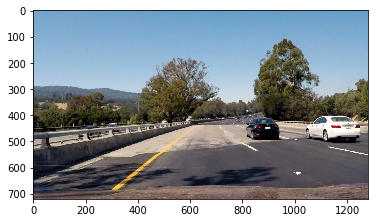

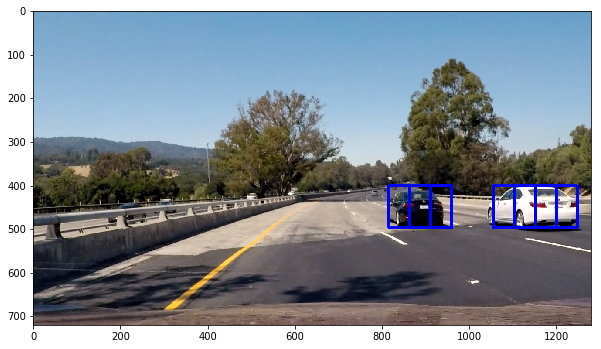

In [296]:
img = mpimg.imread(cwd+'/test_image.jpg')
plt.imshow(img)


# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    
    ctrans_tosearch_cs = convert_color(img_tosearch, color_space[0])
    ctrans_tosearch = convert_color(img_tosearch, color_space[1])
    
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        ctrans_tosearch_cs = cv2.resize(ctrans_tosearch_cs, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    rectangles = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch_cs[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                rectangles.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart))) 
                
    return rectangles

ystart = 400
ystop = 656
scale = 1.5
    
out_img = draw_boxes(img,find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

plt.figure(figsize=(10,10))
plt.imshow(out_img)
plt.show()

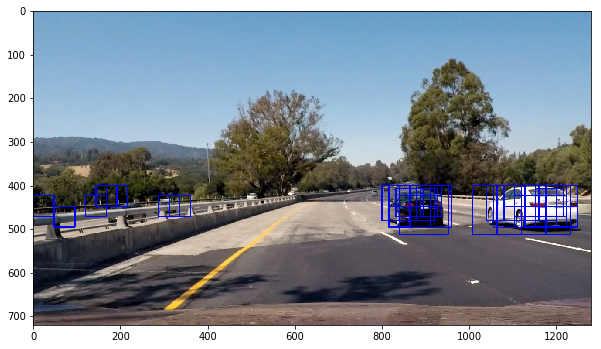

In [297]:
#Switch to using find_cars method still need to train clasiffier. Try using color and hog
rectangles = []

if(1):
    scale = 0.75
    ystart = 375
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    scale = 1.0
    ystart = 375
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.25
    ystart = 400
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.5
    ystart = 400
    ystop = 550
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.75
    ystart = 400
    ystop = 550
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 2.0
    ystart = 500
    ystop = 650
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 2.5
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))


rectangles = [item for sublist in rectangles for item in sublist] 
test_img_rects = draw_boxes(img, rectangles, thick=2)
plt.figure(figsize=(10,10))
plt.imshow(test_img_rects)
plt.show()

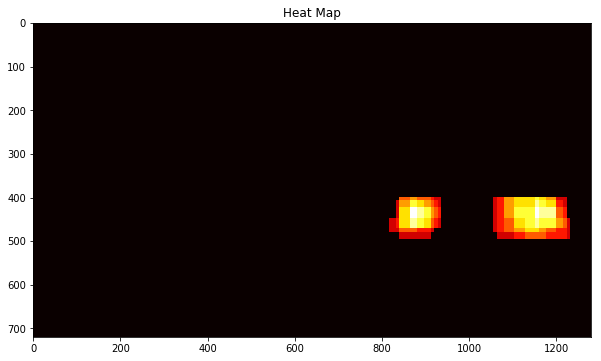

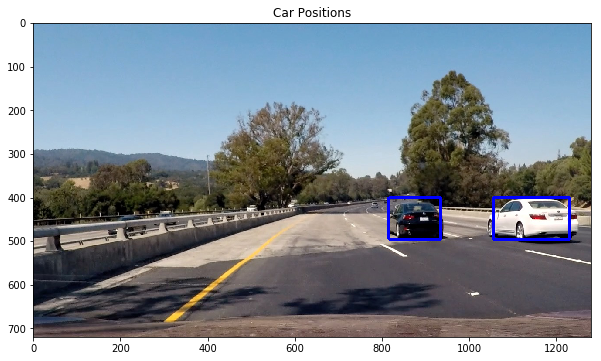

In [298]:
from scipy.ndimage.measurements import label

heat = np.zeros_like(img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,rectangles)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,2)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure(figsize=(10,10))
plt.title('Heat Map')
plt.imshow(heatmap, cmap='hot')
plt.show()

fig = plt.figure(figsize=(10,10))
plt.title('Car Positions')
plt.imshow(draw_img)
plt.show()

In [279]:
def process_frame(img):
    rectangles = []
    
    scale = 0.75
    ystart = 375
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    scale = 1.0
    ystart = 375
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.25
    ystart = 400
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.5
    ystart = 400
    ystop = 550
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.75
    ystart = 400
    ystop = 550
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 2.0
    ystart = 500
    ystop = 650
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 2.5
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    rectangles = [item for sublist in rectangles for item in sublist] 
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,rectangles)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return(draw_img)
    

In [280]:
test_out_file = 'test_video_out.mp4'
clip_test = VideoFileClip('project_video.mp4')
clip_test_out = clip_test.fl_image(process_frame)
%time clip_test_out.write_videofile(test_out_file, audio=False)

[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4







  0%|          | 0/1261 [00:00<?, ?it/s]




  0%|          | 1/1261 [00:00<12:25,  1.69it/s]




  0%|          | 2/1261 [00:01<12:30,  1.68it/s]




  0%|          | 3/1261 [00:01<12:36,  1.66it/s]




  0%|          | 4/1261 [00:02<12:33,  1.67it/s]




  0%|          | 5/1261 [00:02<12:30,  1.67it/s]




  0%|          | 6/1261 [00:03<12:29,  1.67it/s]




  1%|          | 7/1261 [00:04<12:28,  1.67it/s]




  1%|          | 8/1261 [00:04<12:29,  1.67it/s]




  1%|          | 9/1261 [00:05<12:28,  1.67it/s]




  1%|          | 10/1261 [00:05<12:26,  1.68it/s]




  1%|          | 11/1261 [00:06<12:25,  1.68it/s]




  1%|          | 12/1261 [00:07<12:23,  1.68it/s]




  1%|          | 13/1261 [00:07<12:23,  1.68it/s]




  1%|          | 14/1261 [00:08<12:22,  1.68it/s]




  1%|          | 15/1261 [00:08<12:21,  1.68it/s]




  1%|▏         | 16/1261 [00:09<12:20,  1.68it/s]




  1%|▏         | 17/1261 [00:10<12:20,  1.68it/s]




  1%|▏         | 18/1261 [00:10<12:19,  1

  9%|▉         | 118/1261 [01:10<11:24,  1.67it/s]




  9%|▉         | 119/1261 [01:11<11:24,  1.67it/s]




 10%|▉         | 120/1261 [01:11<11:23,  1.67it/s]




 10%|▉         | 121/1261 [01:12<11:22,  1.67it/s]




 10%|▉         | 122/1261 [01:13<11:21,  1.67it/s]




 10%|▉         | 123/1261 [01:13<11:21,  1.67it/s]




 10%|▉         | 124/1261 [01:14<11:20,  1.67it/s]




 10%|▉         | 125/1261 [01:14<11:20,  1.67it/s]




 10%|▉         | 126/1261 [01:15<11:19,  1.67it/s]




 10%|█         | 127/1261 [01:16<11:18,  1.67it/s]




 10%|█         | 128/1261 [01:16<11:18,  1.67it/s]




 10%|█         | 129/1261 [01:17<11:17,  1.67it/s]




 10%|█         | 130/1261 [01:17<11:17,  1.67it/s]




 10%|█         | 131/1261 [01:18<11:16,  1.67it/s]




 10%|█         | 132/1261 [01:19<11:16,  1.67it/s]




 11%|█         | 133/1261 [01:19<11:15,  1.67it/s]




 11%|█         | 134/1261 [01:20<11:14,  1.67it/s]




 11%|█         | 135/1261 [01:20<11:14,  1.67it/s]




 11%|█    

 19%|█▊        | 235/1261 [02:21<10:15,  1.67it/s]




 19%|█▊        | 236/1261 [02:21<10:15,  1.67it/s]




 19%|█▉        | 237/1261 [02:22<10:14,  1.67it/s]




 19%|█▉        | 238/1261 [02:22<10:13,  1.67it/s]




 19%|█▉        | 239/1261 [02:23<10:13,  1.67it/s]




 19%|█▉        | 240/1261 [02:24<10:12,  1.67it/s]




 19%|█▉        | 241/1261 [02:24<10:12,  1.67it/s]




 19%|█▉        | 242/1261 [02:25<10:11,  1.67it/s]




 19%|█▉        | 243/1261 [02:25<10:10,  1.67it/s]




 19%|█▉        | 244/1261 [02:26<10:10,  1.67it/s]




 19%|█▉        | 245/1261 [02:27<10:09,  1.67it/s]




 20%|█▉        | 246/1261 [02:27<10:09,  1.67it/s]




 20%|█▉        | 247/1261 [02:28<10:08,  1.67it/s]




 20%|█▉        | 248/1261 [02:28<10:08,  1.67it/s]




 20%|█▉        | 249/1261 [02:29<10:07,  1.67it/s]




 20%|█▉        | 250/1261 [02:30<10:06,  1.67it/s]




 20%|█▉        | 251/1261 [02:30<10:06,  1.67it/s]




 20%|█▉        | 252/1261 [02:31<10:05,  1.67it/s]




 20%|██   

 28%|██▊       | 352/1261 [03:34<09:13,  1.64it/s]




 28%|██▊       | 353/1261 [03:34<09:12,  1.64it/s]




 28%|██▊       | 354/1261 [03:35<09:12,  1.64it/s]




 28%|██▊       | 355/1261 [03:36<09:11,  1.64it/s]




 28%|██▊       | 356/1261 [03:36<09:11,  1.64it/s]




 28%|██▊       | 357/1261 [03:37<09:10,  1.64it/s]




 28%|██▊       | 358/1261 [03:38<09:10,  1.64it/s]




 28%|██▊       | 359/1261 [03:38<09:09,  1.64it/s]




 29%|██▊       | 360/1261 [03:39<09:08,  1.64it/s]




 29%|██▊       | 361/1261 [03:39<09:08,  1.64it/s]




 29%|██▊       | 362/1261 [03:40<09:07,  1.64it/s]




 29%|██▉       | 363/1261 [03:41<09:07,  1.64it/s]




 29%|██▉       | 364/1261 [03:41<09:06,  1.64it/s]




 29%|██▉       | 365/1261 [03:42<09:05,  1.64it/s]




 29%|██▉       | 366/1261 [03:43<09:05,  1.64it/s]




 29%|██▉       | 367/1261 [03:43<09:04,  1.64it/s]




 29%|██▉       | 368/1261 [03:44<09:04,  1.64it/s]




 29%|██▉       | 369/1261 [03:44<09:03,  1.64it/s]




 29%|██▉  

 37%|███▋      | 469/1261 [04:45<08:02,  1.64it/s]




 37%|███▋      | 470/1261 [04:46<08:01,  1.64it/s]




 37%|███▋      | 471/1261 [04:46<08:00,  1.64it/s]




 37%|███▋      | 472/1261 [04:47<08:00,  1.64it/s]




 38%|███▊      | 473/1261 [04:47<07:59,  1.64it/s]




 38%|███▊      | 474/1261 [04:48<07:58,  1.64it/s]




 38%|███▊      | 475/1261 [04:49<07:58,  1.64it/s]




 38%|███▊      | 476/1261 [04:49<07:57,  1.64it/s]




 38%|███▊      | 477/1261 [04:50<07:56,  1.64it/s]




 38%|███▊      | 478/1261 [04:50<07:56,  1.64it/s]




 38%|███▊      | 479/1261 [04:51<07:55,  1.64it/s]




 38%|███▊      | 480/1261 [04:51<07:55,  1.64it/s]




 38%|███▊      | 481/1261 [04:52<07:54,  1.64it/s]




 38%|███▊      | 482/1261 [04:53<07:53,  1.64it/s]




 38%|███▊      | 483/1261 [04:53<07:53,  1.64it/s]




 38%|███▊      | 484/1261 [04:54<07:52,  1.64it/s]




 38%|███▊      | 485/1261 [04:54<07:51,  1.64it/s]




 39%|███▊      | 486/1261 [04:55<07:51,  1.64it/s]




 39%|███▊ 

 46%|████▋     | 586/1261 [05:56<06:50,  1.64it/s]




 47%|████▋     | 587/1261 [05:57<06:50,  1.64it/s]




 47%|████▋     | 588/1261 [05:58<06:49,  1.64it/s]




 47%|████▋     | 589/1261 [05:58<06:49,  1.64it/s]




 47%|████▋     | 590/1261 [05:59<06:48,  1.64it/s]




 47%|████▋     | 591/1261 [05:59<06:47,  1.64it/s]




 47%|████▋     | 592/1261 [06:00<06:47,  1.64it/s]




 47%|████▋     | 593/1261 [06:01<06:46,  1.64it/s]




 47%|████▋     | 594/1261 [06:01<06:46,  1.64it/s]




 47%|████▋     | 595/1261 [06:02<06:45,  1.64it/s]




 47%|████▋     | 596/1261 [06:03<06:45,  1.64it/s]




 47%|████▋     | 597/1261 [06:03<06:44,  1.64it/s]




 47%|████▋     | 598/1261 [06:04<06:44,  1.64it/s]




 48%|████▊     | 599/1261 [06:05<06:43,  1.64it/s]




 48%|████▊     | 600/1261 [06:05<06:43,  1.64it/s]




 48%|████▊     | 601/1261 [06:06<06:42,  1.64it/s]




 48%|████▊     | 602/1261 [06:07<06:41,  1.64it/s]




 48%|████▊     | 603/1261 [06:07<06:41,  1.64it/s]




 48%|████▊

 56%|█████▌    | 703/1261 [07:08<05:39,  1.64it/s]




 56%|█████▌    | 704/1261 [07:08<05:39,  1.64it/s]




 56%|█████▌    | 705/1261 [07:09<05:38,  1.64it/s]




 56%|█████▌    | 706/1261 [07:10<05:38,  1.64it/s]




 56%|█████▌    | 707/1261 [07:10<05:37,  1.64it/s]




 56%|█████▌    | 708/1261 [07:11<05:36,  1.64it/s]




 56%|█████▌    | 709/1261 [07:11<05:36,  1.64it/s]




 56%|█████▋    | 710/1261 [07:12<05:35,  1.64it/s]




 56%|█████▋    | 711/1261 [07:13<05:35,  1.64it/s]




 56%|█████▋    | 712/1261 [07:13<05:34,  1.64it/s]




 57%|█████▋    | 713/1261 [07:14<05:33,  1.64it/s]




 57%|█████▋    | 714/1261 [07:15<05:33,  1.64it/s]




 57%|█████▋    | 715/1261 [07:15<05:32,  1.64it/s]




 57%|█████▋    | 716/1261 [07:16<05:32,  1.64it/s]




 57%|█████▋    | 717/1261 [07:16<05:31,  1.64it/s]




 57%|█████▋    | 718/1261 [07:17<05:30,  1.64it/s]




 57%|█████▋    | 719/1261 [07:18<05:30,  1.64it/s]




 57%|█████▋    | 720/1261 [07:18<05:29,  1.64it/s]




 57%|█████

 65%|██████▌   | 820/1261 [08:20<04:29,  1.64it/s]




 65%|██████▌   | 821/1261 [08:21<04:28,  1.64it/s]




 65%|██████▌   | 822/1261 [08:21<04:27,  1.64it/s]




 65%|██████▌   | 823/1261 [08:22<04:27,  1.64it/s]




 65%|██████▌   | 824/1261 [08:22<04:26,  1.64it/s]




 65%|██████▌   | 825/1261 [08:23<04:26,  1.64it/s]




 66%|██████▌   | 826/1261 [08:24<04:25,  1.64it/s]




 66%|██████▌   | 827/1261 [08:24<04:24,  1.64it/s]




 66%|██████▌   | 828/1261 [08:25<04:24,  1.64it/s]




 66%|██████▌   | 829/1261 [08:26<04:23,  1.64it/s]




 66%|██████▌   | 830/1261 [08:26<04:23,  1.64it/s]




 66%|██████▌   | 831/1261 [08:27<04:22,  1.64it/s]




 66%|██████▌   | 832/1261 [08:27<04:21,  1.64it/s]




 66%|██████▌   | 833/1261 [08:28<04:21,  1.64it/s]




 66%|██████▌   | 834/1261 [08:29<04:20,  1.64it/s]




 66%|██████▌   | 835/1261 [08:29<04:20,  1.64it/s]




 66%|██████▋   | 836/1261 [08:30<04:19,  1.64it/s]




 66%|██████▋   | 837/1261 [08:30<04:18,  1.64it/s]




 66%|█████

 74%|███████▍  | 937/1261 [09:31<03:17,  1.64it/s]




 74%|███████▍  | 938/1261 [09:31<03:16,  1.64it/s]




 74%|███████▍  | 939/1261 [09:32<03:16,  1.64it/s]




 75%|███████▍  | 940/1261 [09:32<03:15,  1.64it/s]




 75%|███████▍  | 941/1261 [09:33<03:15,  1.64it/s]




 75%|███████▍  | 942/1261 [09:34<03:14,  1.64it/s]




 75%|███████▍  | 943/1261 [09:34<03:13,  1.64it/s]




 75%|███████▍  | 944/1261 [09:35<03:13,  1.64it/s]




 75%|███████▍  | 945/1261 [09:35<03:12,  1.64it/s]




 75%|███████▌  | 946/1261 [09:36<03:11,  1.64it/s]




 75%|███████▌  | 947/1261 [09:37<03:11,  1.64it/s]




 75%|███████▌  | 948/1261 [09:37<03:10,  1.64it/s]




 75%|███████▌  | 949/1261 [09:38<03:10,  1.64it/s]




 75%|███████▌  | 950/1261 [09:38<03:09,  1.64it/s]




 75%|███████▌  | 951/1261 [09:39<03:08,  1.64it/s]




 75%|███████▌  | 952/1261 [09:40<03:08,  1.64it/s]




 76%|███████▌  | 953/1261 [09:40<03:07,  1.64it/s]




 76%|███████▌  | 954/1261 [09:41<03:07,  1.64it/s]




 76%|█████

 84%|████████▎ | 1053/1261 [10:41<02:06,  1.64it/s]




 84%|████████▎ | 1054/1261 [10:41<02:06,  1.64it/s]




 84%|████████▎ | 1055/1261 [10:42<02:05,  1.64it/s]




 84%|████████▎ | 1056/1261 [10:42<02:04,  1.64it/s]




 84%|████████▍ | 1057/1261 [10:43<02:04,  1.64it/s]




 84%|████████▍ | 1058/1261 [10:44<02:03,  1.64it/s]




 84%|████████▍ | 1059/1261 [10:44<02:02,  1.64it/s]




 84%|████████▍ | 1060/1261 [10:45<02:02,  1.64it/s]




 84%|████████▍ | 1061/1261 [10:45<02:01,  1.64it/s]




 84%|████████▍ | 1062/1261 [10:46<02:01,  1.64it/s]




 84%|████████▍ | 1063/1261 [10:47<02:00,  1.64it/s]




 84%|████████▍ | 1064/1261 [10:47<01:59,  1.64it/s]




 84%|████████▍ | 1065/1261 [10:48<01:59,  1.64it/s]




 85%|████████▍ | 1066/1261 [10:48<01:58,  1.64it/s]




 85%|████████▍ | 1067/1261 [10:49<01:58,  1.64it/s]




 85%|████████▍ | 1068/1261 [10:50<01:57,  1.64it/s]




 85%|████████▍ | 1069/1261 [10:50<01:56,  1.64it/s]




 85%|████████▍ | 1070/1261 [10:51<01:56,  1.64it

 93%|█████████▎| 1168/1261 [11:50<00:56,  1.64it/s]




 93%|█████████▎| 1169/1261 [11:50<00:55,  1.64it/s]




 93%|█████████▎| 1170/1261 [11:51<00:55,  1.64it/s]




 93%|█████████▎| 1171/1261 [11:51<00:54,  1.64it/s]




 93%|█████████▎| 1172/1261 [11:52<00:54,  1.64it/s]




 93%|█████████▎| 1173/1261 [11:53<00:53,  1.64it/s]




 93%|█████████▎| 1174/1261 [11:53<00:52,  1.64it/s]




 93%|█████████▎| 1175/1261 [11:54<00:52,  1.64it/s]




 93%|█████████▎| 1176/1261 [11:54<00:51,  1.64it/s]




 93%|█████████▎| 1177/1261 [11:55<00:51,  1.64it/s]




 93%|█████████▎| 1178/1261 [11:56<00:50,  1.64it/s]




 93%|█████████▎| 1179/1261 [11:56<00:49,  1.64it/s]




 94%|█████████▎| 1180/1261 [11:57<00:49,  1.65it/s]




 94%|█████████▎| 1181/1261 [11:57<00:48,  1.65it/s]




 94%|█████████▎| 1182/1261 [11:58<00:48,  1.65it/s]




 94%|█████████▍| 1183/1261 [11:59<00:47,  1.65it/s]




 94%|█████████▍| 1184/1261 [11:59<00:46,  1.65it/s]




 94%|█████████▍| 1185/1261 [12:00<00:46,  1.65it

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

CPU times: user 13min 42s, sys: 46.3 s, total: 14min 28s
Wall time: 12min 45s


In [272]:
class VehicleRectangles():
    def __init__(self):
        self.rectangles = []
        self.numAdded = []
        self.count = 0
        
    def add_rects(self,rectsToAdd):
        if(self.count >= 6 and len(rectsToAdd) >= 1):
            self.rectangles = self.rectangles[self.numAdded[0]:]
            self.numAdded = self.numAdded[1:]
            for i in rectsToAdd:
                self.rectangles.append(i)
            self.numAdded.append(len(rectsToAdd))
        else:
            if len(rectsToAdd) >= 1:
                self.count +=1
                for i in rectsToAdd:
                    self.rectangles.append(i)
                self.numAdded.append(len(rectsToAdd))

            
def process_frame_history(img):
    rectangles = []
    global VR
    
    scale = 0.75
    ystart = 375
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    
    scale = 1.0
    ystart = 375
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.25
    ystart = 400
    ystop = 500
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.5
    ystart = 400
    ystop = 550
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 1.75
    ystart = 400
    ystop = 550
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 2.0
    ystart = 500
    ystop = 650
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    scale = 2.5
    rectangles.append(find_cars(img, color_space, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    rectangles = [item for sublist in rectangles for item in sublist] 
    
    VR.add_rects(rectangles)
    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,VR.rectangles)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,int(1.5*VR.count)+1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return(draw_img)

In [273]:
VR = VehicleRectangles()

#test_out_file = 'test_video_out.mp4'
#clip_test = VideoFileClip('test_video.mp4')
test_out_file = 'project_video_out.mp4'
clip_test = VideoFileClip('project_video.mp4')
clip_test_out = clip_test.fl_image(process_frame_history)
%time clip_test_out.write_videofile(test_out_file, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4







  0%|          | 0/1261 [00:00<?, ?it/s]




  0%|          | 1/1261 [00:00<13:03,  1.61it/s]




  0%|          | 2/1261 [00:01<12:54,  1.63it/s]




  0%|          | 3/1261 [00:01<12:58,  1.62it/s]




  0%|          | 4/1261 [00:02<13:01,  1.61it/s]




  0%|          | 5/1261 [00:03<12:56,  1.62it/s]




  0%|          | 6/1261 [00:03<12:52,  1.63it/s]




  1%|          | 7/1261 [00:04<12:48,  1.63it/s]




  1%|          | 8/1261 [00:04<12:47,  1.63it/s]




  1%|          | 9/1261 [00:05<12:46,  1.63it/s]




  1%|          | 10/1261 [00:06<12:45,  1.64it/s]




  1%|          | 11/1261 [00:06<12:42,  1.64it/s]




  1%|          | 12/1261 [00:07<12:44,  1.63it/s]




  1%|          | 13/1261 [00:07<12:45,  1.63it/s]




  1%|          | 14/1261 [00:08<12:42,  1.64it/s]




  1%|          | 15/1261 [00:09<12:39,  1.64it/s]




  1%|▏         | 16/1261 [00:09<12:37,  1.64it/s]




  1%|▏         | 17/1261 [00:10<12:35,  1.65it/s]




  1%|▏         | 18/1261 [00:10<12:33,  1

  9%|▉         | 118/1261 [01:09<11:10,  1.70it/s]




  9%|▉         | 119/1261 [01:09<11:10,  1.70it/s]




 10%|▉         | 120/1261 [01:10<11:09,  1.70it/s]




 10%|▉         | 121/1261 [01:10<11:08,  1.70it/s]




 10%|▉         | 122/1261 [01:11<11:08,  1.70it/s]




 10%|▉         | 123/1261 [01:12<11:07,  1.70it/s]




 10%|▉         | 124/1261 [01:12<11:06,  1.70it/s]




 10%|▉         | 125/1261 [01:13<11:06,  1.70it/s]




 10%|▉         | 126/1261 [01:13<11:05,  1.70it/s]




 10%|█         | 127/1261 [01:14<11:05,  1.70it/s]




 10%|█         | 128/1261 [01:15<11:04,  1.70it/s]




 10%|█         | 129/1261 [01:15<11:03,  1.70it/s]




 10%|█         | 130/1261 [01:16<11:03,  1.71it/s]




 10%|█         | 131/1261 [01:16<11:02,  1.71it/s]




 10%|█         | 132/1261 [01:17<11:02,  1.71it/s]




 11%|█         | 133/1261 [01:17<11:01,  1.71it/s]




 11%|█         | 134/1261 [01:18<11:00,  1.71it/s]




 11%|█         | 135/1261 [01:19<11:00,  1.71it/s]




 11%|█    

 19%|█▊        | 235/1261 [02:18<10:04,  1.70it/s]




 19%|█▊        | 236/1261 [02:19<10:03,  1.70it/s]




 19%|█▉        | 237/1261 [02:19<10:03,  1.70it/s]




 19%|█▉        | 238/1261 [02:20<10:02,  1.70it/s]




 19%|█▉        | 239/1261 [02:20<10:02,  1.70it/s]




 19%|█▉        | 240/1261 [02:21<10:01,  1.70it/s]




 19%|█▉        | 241/1261 [02:22<10:01,  1.70it/s]




 19%|█▉        | 242/1261 [02:22<10:00,  1.70it/s]




 19%|█▉        | 243/1261 [02:23<09:59,  1.70it/s]




 19%|█▉        | 244/1261 [02:23<09:59,  1.70it/s]




 19%|█▉        | 245/1261 [02:24<09:58,  1.70it/s]




 20%|█▉        | 246/1261 [02:24<09:58,  1.70it/s]




 20%|█▉        | 247/1261 [02:25<09:57,  1.70it/s]




 20%|█▉        | 248/1261 [02:26<09:56,  1.70it/s]




 20%|█▉        | 249/1261 [02:26<09:56,  1.70it/s]




 20%|█▉        | 250/1261 [02:27<09:55,  1.70it/s]




 20%|█▉        | 251/1261 [02:27<09:55,  1.70it/s]




 20%|█▉        | 252/1261 [02:28<09:54,  1.70it/s]




 20%|██   

 28%|██▊       | 352/1261 [03:28<08:57,  1.69it/s]




 28%|██▊       | 353/1261 [03:28<08:56,  1.69it/s]




 28%|██▊       | 354/1261 [03:29<08:56,  1.69it/s]




 28%|██▊       | 355/1261 [03:29<08:55,  1.69it/s]




 28%|██▊       | 356/1261 [03:30<08:55,  1.69it/s]




 28%|██▊       | 357/1261 [03:31<08:54,  1.69it/s]




 28%|██▊       | 358/1261 [03:31<08:53,  1.69it/s]




 28%|██▊       | 359/1261 [03:32<08:53,  1.69it/s]




 29%|██▊       | 360/1261 [03:32<08:52,  1.69it/s]




 29%|██▊       | 361/1261 [03:33<08:52,  1.69it/s]




 29%|██▊       | 362/1261 [03:34<08:51,  1.69it/s]




 29%|██▉       | 363/1261 [03:34<08:50,  1.69it/s]




 29%|██▉       | 364/1261 [03:35<08:50,  1.69it/s]




 29%|██▉       | 365/1261 [03:35<08:49,  1.69it/s]




 29%|██▉       | 366/1261 [03:36<08:49,  1.69it/s]




 29%|██▉       | 367/1261 [03:36<08:48,  1.69it/s]




 29%|██▉       | 368/1261 [03:37<08:48,  1.69it/s]




 29%|██▉       | 369/1261 [03:38<08:47,  1.69it/s]




 29%|██▉  

 37%|███▋      | 469/1261 [04:37<07:48,  1.69it/s]




 37%|███▋      | 470/1261 [04:38<07:48,  1.69it/s]




 37%|███▋      | 471/1261 [04:38<07:47,  1.69it/s]




 37%|███▋      | 472/1261 [04:39<07:47,  1.69it/s]




 38%|███▊      | 473/1261 [04:40<07:46,  1.69it/s]




 38%|███▊      | 474/1261 [04:40<07:46,  1.69it/s]




 38%|███▊      | 475/1261 [04:41<07:45,  1.69it/s]




 38%|███▊      | 476/1261 [04:41<07:44,  1.69it/s]




 38%|███▊      | 477/1261 [04:42<07:44,  1.69it/s]




 38%|███▊      | 478/1261 [04:43<07:43,  1.69it/s]




 38%|███▊      | 479/1261 [04:43<07:43,  1.69it/s]




 38%|███▊      | 480/1261 [04:44<07:42,  1.69it/s]




 38%|███▊      | 481/1261 [04:44<07:41,  1.69it/s]




 38%|███▊      | 482/1261 [04:45<07:41,  1.69it/s]




 38%|███▊      | 483/1261 [04:45<07:40,  1.69it/s]




 38%|███▊      | 484/1261 [04:46<07:40,  1.69it/s]




 38%|███▊      | 485/1261 [04:47<07:39,  1.69it/s]




 39%|███▊      | 486/1261 [04:47<07:38,  1.69it/s]




 39%|███▊ 

 46%|████▋     | 586/1261 [05:47<06:39,  1.69it/s]




 47%|████▋     | 587/1261 [05:47<06:39,  1.69it/s]




 47%|████▋     | 588/1261 [05:48<06:38,  1.69it/s]




 47%|████▋     | 589/1261 [05:49<06:38,  1.69it/s]




 47%|████▋     | 590/1261 [05:49<06:37,  1.69it/s]




 47%|████▋     | 591/1261 [05:50<06:37,  1.69it/s]




 47%|████▋     | 592/1261 [05:50<06:36,  1.69it/s]




 47%|████▋     | 593/1261 [05:51<06:35,  1.69it/s]




 47%|████▋     | 594/1261 [05:52<06:35,  1.69it/s]




 47%|████▋     | 595/1261 [05:52<06:34,  1.69it/s]




 47%|████▋     | 596/1261 [05:53<06:34,  1.69it/s]




 47%|████▋     | 597/1261 [05:53<06:33,  1.69it/s]




 47%|████▋     | 598/1261 [05:54<06:32,  1.69it/s]




 48%|████▊     | 599/1261 [05:54<06:32,  1.69it/s]




 48%|████▊     | 600/1261 [05:55<06:31,  1.69it/s]




 48%|████▊     | 601/1261 [05:56<06:31,  1.69it/s]




 48%|████▊     | 602/1261 [05:56<06:30,  1.69it/s]




 48%|████▊     | 603/1261 [05:57<06:29,  1.69it/s]




 48%|████▊

 56%|█████▌    | 703/1261 [06:56<05:30,  1.69it/s]




 56%|█████▌    | 704/1261 [06:57<05:29,  1.69it/s]




 56%|█████▌    | 705/1261 [06:57<05:29,  1.69it/s]




 56%|█████▌    | 706/1261 [06:58<05:28,  1.69it/s]




 56%|█████▌    | 707/1261 [06:58<05:28,  1.69it/s]




 56%|█████▌    | 708/1261 [06:59<05:27,  1.69it/s]




 56%|█████▌    | 709/1261 [07:00<05:27,  1.69it/s]




 56%|█████▋    | 710/1261 [07:00<05:26,  1.69it/s]




 56%|█████▋    | 711/1261 [07:01<05:25,  1.69it/s]




 56%|█████▋    | 712/1261 [07:01<05:25,  1.69it/s]




 57%|█████▋    | 713/1261 [07:02<05:24,  1.69it/s]




 57%|█████▋    | 714/1261 [07:02<05:24,  1.69it/s]




 57%|█████▋    | 715/1261 [07:03<05:23,  1.69it/s]




 57%|█████▋    | 716/1261 [07:04<05:22,  1.69it/s]




 57%|█████▋    | 717/1261 [07:04<05:22,  1.69it/s]




 57%|█████▋    | 718/1261 [07:05<05:21,  1.69it/s]




 57%|█████▋    | 719/1261 [07:05<05:21,  1.69it/s]




 57%|█████▋    | 720/1261 [07:06<05:20,  1.69it/s]




 57%|█████

 65%|██████▌   | 820/1261 [08:06<04:21,  1.69it/s]




 65%|██████▌   | 821/1261 [08:06<04:20,  1.69it/s]




 65%|██████▌   | 822/1261 [08:07<04:20,  1.69it/s]




 65%|██████▌   | 823/1261 [08:08<04:19,  1.69it/s]




 65%|██████▌   | 824/1261 [08:08<04:19,  1.69it/s]




 65%|██████▌   | 825/1261 [08:09<04:18,  1.69it/s]




 66%|██████▌   | 826/1261 [08:09<04:18,  1.69it/s]




 66%|██████▌   | 827/1261 [08:10<04:17,  1.69it/s]




 66%|██████▌   | 828/1261 [08:11<04:16,  1.69it/s]




 66%|██████▌   | 829/1261 [08:11<04:16,  1.69it/s]




 66%|██████▌   | 830/1261 [08:12<04:15,  1.69it/s]




 66%|██████▌   | 831/1261 [08:12<04:15,  1.69it/s]




 66%|██████▌   | 832/1261 [08:13<04:14,  1.69it/s]




 66%|██████▌   | 833/1261 [08:14<04:13,  1.69it/s]




 66%|██████▌   | 834/1261 [08:14<04:13,  1.69it/s]




 66%|██████▌   | 835/1261 [08:15<04:12,  1.69it/s]




 66%|██████▋   | 836/1261 [08:15<04:12,  1.69it/s]




 66%|██████▋   | 837/1261 [08:16<04:11,  1.69it/s]




 66%|█████

 74%|███████▍  | 937/1261 [09:15<03:12,  1.69it/s]




 74%|███████▍  | 938/1261 [09:16<03:11,  1.69it/s]




 74%|███████▍  | 939/1261 [09:17<03:11,  1.69it/s]




 75%|███████▍  | 940/1261 [09:17<03:10,  1.69it/s]




 75%|███████▍  | 941/1261 [09:18<03:09,  1.69it/s]




 75%|███████▍  | 942/1261 [09:18<03:09,  1.69it/s]




 75%|███████▍  | 943/1261 [09:19<03:08,  1.69it/s]




 75%|███████▍  | 944/1261 [09:20<03:08,  1.69it/s]




 75%|███████▍  | 945/1261 [09:20<03:07,  1.69it/s]




 75%|███████▌  | 946/1261 [09:21<03:06,  1.69it/s]




 75%|███████▌  | 947/1261 [09:21<03:06,  1.69it/s]




 75%|███████▌  | 948/1261 [09:22<03:05,  1.69it/s]




 75%|███████▌  | 949/1261 [09:23<03:05,  1.69it/s]




 75%|███████▌  | 950/1261 [09:23<03:04,  1.69it/s]




 75%|███████▌  | 951/1261 [09:24<03:03,  1.69it/s]




 75%|███████▌  | 952/1261 [09:24<03:03,  1.69it/s]




 76%|███████▌  | 953/1261 [09:25<03:02,  1.69it/s]




 76%|███████▌  | 954/1261 [09:26<03:02,  1.69it/s]




 76%|█████

 84%|████████▎ | 1053/1261 [10:25<02:03,  1.68it/s]




 84%|████████▎ | 1054/1261 [10:26<02:03,  1.68it/s]




 84%|████████▎ | 1055/1261 [10:26<02:02,  1.68it/s]




 84%|████████▎ | 1056/1261 [10:27<02:01,  1.68it/s]




 84%|████████▍ | 1057/1261 [10:28<02:01,  1.68it/s]




 84%|████████▍ | 1058/1261 [10:28<02:00,  1.68it/s]




 84%|████████▍ | 1059/1261 [10:29<02:00,  1.68it/s]




 84%|████████▍ | 1060/1261 [10:29<01:59,  1.68it/s]




 84%|████████▍ | 1061/1261 [10:30<01:58,  1.68it/s]




 84%|████████▍ | 1062/1261 [10:31<01:58,  1.68it/s]




 84%|████████▍ | 1063/1261 [10:31<01:57,  1.68it/s]




 84%|████████▍ | 1064/1261 [10:32<01:57,  1.68it/s]




 84%|████████▍ | 1065/1261 [10:32<01:56,  1.68it/s]




 85%|████████▍ | 1066/1261 [10:33<01:55,  1.68it/s]




 85%|████████▍ | 1067/1261 [10:34<01:55,  1.68it/s]




 85%|████████▍ | 1068/1261 [10:34<01:54,  1.68it/s]




 85%|████████▍ | 1069/1261 [10:35<01:54,  1.68it/s]




 85%|████████▍ | 1070/1261 [10:35<01:53,  1.68it

 93%|█████████▎| 1168/1261 [11:33<00:55,  1.68it/s]




 93%|█████████▎| 1169/1261 [11:34<00:54,  1.68it/s]




 93%|█████████▎| 1170/1261 [11:35<00:54,  1.68it/s]




 93%|█████████▎| 1171/1261 [11:35<00:53,  1.68it/s]




 93%|█████████▎| 1172/1261 [11:36<00:52,  1.68it/s]




 93%|█████████▎| 1173/1261 [11:36<00:52,  1.68it/s]




 93%|█████████▎| 1174/1261 [11:37<00:51,  1.68it/s]




 93%|█████████▎| 1175/1261 [11:38<00:51,  1.68it/s]




 93%|█████████▎| 1176/1261 [11:38<00:50,  1.68it/s]




 93%|█████████▎| 1177/1261 [11:39<00:49,  1.68it/s]




 93%|█████████▎| 1178/1261 [11:39<00:49,  1.68it/s]




 93%|█████████▎| 1179/1261 [11:40<00:48,  1.68it/s]




 94%|█████████▎| 1180/1261 [11:41<00:48,  1.68it/s]




 94%|█████████▎| 1181/1261 [11:41<00:47,  1.68it/s]




 94%|█████████▎| 1182/1261 [11:42<00:46,  1.68it/s]




 94%|█████████▍| 1183/1261 [11:42<00:46,  1.68it/s]




 94%|█████████▍| 1184/1261 [11:43<00:45,  1.68it/s]




 94%|█████████▍| 1185/1261 [11:44<00:45,  1.68it

[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 

CPU times: user 13min 28s, sys: 45.3 s, total: 14min 13s
Wall time: 12min 29s
